# Exploratory Data Analysis for the TWC datasets from NGA and WMS
- An attempt for a step-by-step data cleaning process leading to an EDA datapipeline & additional ML workflow & Use case


# Dev Notes 

- Start thinking about writing code as classes | beyond notebooks, some form of an app to be deployed
- Write functions as pure functions, clojure
- Do a config block at the top | specify how one will run the notebook, spec file_paths
- Pass arguments to functions i.e. call a func and prompt user to put in file_path
- Patent for groundwater collection and processing | collect and spin to an HPC machine that processes at high speeds
- Read files into memory

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import re
import glob
from os import listdir
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
import seaborn as sns
%reload_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
# get the current working directory
print(os.getcwd())

/Users/badisa


In [3]:
# change the directory to where the files are

os.chdir("/Users/badisa/TWC_Datasets/")

In [4]:
def listDirs():
    """ get the list of all files and directories in the current working directory, TWC_Datasets """
    print("All files and dirs in the TWC_Datasets directory: \n", os.listdir())
listDirs()

All files and dirs in the TWC_Datasets directory: 
 ['.DS_Store', 'RIMS_boreholes_template.xlsx', 'mergedWaterQuality.xlsx', 'SITE_INFORA10A_fixed.csv', 'Miscellaneous', 'PythonDataCleaning.ipynb', 'Ramotswa_all.xlsx', 'Merged_files', '.gitattributes', 'NGA', 'merged_ramotswa.csv', '.git', 'RTBA_BOREHOLES', 'merged_WLWQ_df.csv', 'Ramotswa_Shape_files', 'mergedWaterQuality.csv']


# TO-DO !!!
call python | bash scripts inside the Jupyter notebook for handling TWC datasets

In [5]:
# do a bash-like script or python regex for listing all files in the directories, NGA, RTBA etc 
# ls -al | cd NGA/ | ls -al

In [6]:
# define funcs for listing files (by types) inside NGA dir

def findCSVfiles(path_to_dir, suffix = ".csv"):
    """ func for finding csv files in the NGA directory """
    path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"
    dir_list = os.listdir(path)
    return [file for file in dir_list if file.endswith(suffix)]

def findXLSXfiles(path_to_dir, suffix = ".xlsx"):
    """ func for finding xlsx files in the NGA directory """
    path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"
    dir_list = os.listdir(path)
    return [file for file in dir_list if file.endswith(suffix)]

def findXLSfiles(path_to_dir, suffix = ".xls"):
    """ func for finding xls files in the NGA directory"""
    path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"
    dir_list = os.listdir(path)
    return [file for file in dir_list if file.endswith(suffix)]

def findTXTfiles(path_to_dir, suffix = ".TXT"):
    """ func for finding TXT files in the specified directory """
    path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"
    dir_list = os.listdir(path)
    return [file for file in dir_list if file.endswith(suffix)]


In [7]:
help(findCSVfiles)

Help on function findCSVfiles in module __main__:

findCSVfiles(path_to_dir, suffix='.csv')
    func for finding csv files in the NGA directory



In [8]:
# call all files functions
def call_file_funcs():
    """ func that calls all the find files functions """
    """ prints all files from funcs above and displays all csv, xlsx and txt files """
    files_path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"
    return findCSVfiles(files_path), findXLSXfiles(files_path), findXLSfiles(files_path), findTXTfiles(files_path) 

call_file_funcs()

(['Ramotswa_data_2_20190904.csv',
  'A3N0513_WaterLevels.csv',
  'merged_site_info.csv',
  'A3N0521_WaterLevels.csv',
  'D4N2517_WaterLevels.csv',
  'A3N0514_WaterLevels.csv',
  'A1N0001_WaterLevels.csv',
  'Ramotswa_variables_inventory_20190904.csv',
  'A3N0015_WaterLevels.csv',
  'D4N2516_WaterLevels.csv',
  'D4N1658_WaterLevels.csv',
  'Cleaned_SITE_INFORA10A.csv',
  'A1N0002_WaterLevels.csv',
  'mergedWaterLevels.csv',
  'D4N1468_WaterLevels.csv',
  'Ramotswa_data_1_20190904.csv',
  'A3N0519_WaterLevels.csv',
  'D4N2515_WaterLevels.csv',
  'merged_RIMS_water_levels.csv',
  'merged_Ramotswa_study_area.csv',
  'A3N0516_WaterLevels.csv',
  'D4N1666_WaterLevels.csv',
  'A1N0003_WaterLevels.csv'],
 ['~$Quality Code Description.xlsx',
  'Quality Code Description.xlsx',
  'A1H001 Upper Eye Dinokana.xlsx',
  'A1H002 Lower Eye Dinokana.xlsx',
  'A1H003 Upper Eye Tweefontein.xlsx',
  'Ramotswa_study_area_plus_10km.xlsx',
  'A1H004 Lower Eye Tweefontein.xlsx',
  'A1H005 Skilpad Eye.xlsx',
  '

In [9]:
# print all files, not as a list of a list
files_path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"

def cat_files():
    """ func that prints out file names as a list, without apostrophes """
    CSVs = findCSVfiles(files_path)
    XLSXs = findXLSXfiles(files_path)
    XLSs = findXLSfiles(files_path)
    TXTs = findTXTfiles(files_path)

# check for a better way of chunking vars in the for loop, i.e. use a single for loop for all filenames
    for file in CSVs:
        print(file)

    for file2 in XLSXs:
        print(file2)
    
    for file3 in XLSs:
        print(file3)

    for file4 in TXTs:
        print(file4)
         
cat_files()


Ramotswa_data_2_20190904.csv
A3N0513_WaterLevels.csv
merged_site_info.csv
A3N0521_WaterLevels.csv
D4N2517_WaterLevels.csv
A3N0514_WaterLevels.csv
A1N0001_WaterLevels.csv
Ramotswa_variables_inventory_20190904.csv
A3N0015_WaterLevels.csv
D4N2516_WaterLevels.csv
D4N1658_WaterLevels.csv
Cleaned_SITE_INFORA10A.csv
A1N0002_WaterLevels.csv
mergedWaterLevels.csv
D4N1468_WaterLevels.csv
Ramotswa_data_1_20190904.csv
A3N0519_WaterLevels.csv
D4N2515_WaterLevels.csv
merged_RIMS_water_levels.csv
merged_Ramotswa_study_area.csv
A3N0516_WaterLevels.csv
D4N1666_WaterLevels.csv
A1N0003_WaterLevels.csv
~$Quality Code Description.xlsx
Quality Code Description.xlsx
A1H001 Upper Eye Dinokana.xlsx
A1H002 Lower Eye Dinokana.xlsx
A1H003 Upper Eye Tweefontein.xlsx
Ramotswa_study_area_plus_10km.xlsx
A1H004 Lower Eye Tweefontein.xlsx
A1H005 Skilpad Eye.xlsx
~$A1H001 Upper Eye Dinokana.xlsx
Quality codes.xls
Ramotswa variables inventory 20190904_CSV.TXT
Ramotswa data 1 20190904_CSV.TXT
Ramotswa data 2 20190904_CSV.

In [10]:
# check why this only returns one file !!!
def findCSV2(path_to_dir, suffix = ".csv"):
    """ func for"""
    path = "/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/"
    dir_list = os.listdir(path)
    for file in dir_list:
        if file.endswith(suffix):
            return file

In [11]:
# check | investigate this
findCSV2("/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/")

'Ramotswa_data_2_20190904.csv'

In [12]:
# merge spreadsheets and append, chunk water levels together, water_quality together etc
# Read in and merge water levels
cat_files()

Ramotswa_data_2_20190904.csv
A3N0513_WaterLevels.csv
merged_site_info.csv
A3N0521_WaterLevels.csv
D4N2517_WaterLevels.csv
A3N0514_WaterLevels.csv
A1N0001_WaterLevels.csv
Ramotswa_variables_inventory_20190904.csv
A3N0015_WaterLevels.csv
D4N2516_WaterLevels.csv
D4N1658_WaterLevels.csv
Cleaned_SITE_INFORA10A.csv
A1N0002_WaterLevels.csv
mergedWaterLevels.csv
D4N1468_WaterLevels.csv
Ramotswa_data_1_20190904.csv
A3N0519_WaterLevels.csv
D4N2515_WaterLevels.csv
merged_RIMS_water_levels.csv
merged_Ramotswa_study_area.csv
A3N0516_WaterLevels.csv
D4N1666_WaterLevels.csv
A1N0003_WaterLevels.csv
~$Quality Code Description.xlsx
Quality Code Description.xlsx
A1H001 Upper Eye Dinokana.xlsx
A1H002 Lower Eye Dinokana.xlsx
A1H003 Upper Eye Tweefontein.xlsx
Ramotswa_study_area_plus_10km.xlsx
A1H004 Lower Eye Tweefontein.xlsx
A1H005 Skilpad Eye.xlsx
~$A1H001 Upper Eye Dinokana.xlsx
Quality codes.xls
Ramotswa variables inventory 20190904_CSV.TXT
Ramotswa data 1 20190904_CSV.TXT
Ramotswa data 2 20190904_CSV.

* Note - use glob for files pattern matching

In [13]:
""" use glob func to match files with similar names, match all waterLevel files and sort them """
water_level_filenames = (glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/*_WaterLevels.csv'))
def match_WLF_patterns(file_path):
    """ method for matching files with similar names, match all waterLevel files and sort them """
    water_level_filenames = (glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/*_WaterLevels.csv'))
    return water_level_filenames
match_WLF_patterns("/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/")

['/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A3N0513_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A3N0521_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/D4N2517_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A3N0514_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1N0001_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A3N0015_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/D4N2516_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/D4N1658_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1N0002_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/D4N1468_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A3N0519_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/D4N2515_WaterLevels.csv',
 '/Users/badisa/TWC_Datasets

In [14]:

# create water levels dataframe
water_levels = pd.DataFrame()

# append each water_level file to the dataframe
for wl_file in water_level_filenames:
    wl_df = pd.read_csv(wl_file, parse_dates = True, date_parser = True)
    wl_df.rename(columns = lambda x: x.strip().lower(), inplace = True)
    water_levels = water_levels.append(wl_df, ignore_index = True, sort = False)

# Inspect the first 10 records
water_levels.head(-10)


station      date   time  water_level  quality  datatrans  \
0     A3N0513   19980904  12:00       -12.10       26          7   
1     A3N0513   19991215  12:00       -14.82       26          7   
2     A3N0513   20000215  12:00       -10.06       26          7   
3     A3N0513   20000315  12:00       -10.06       26          7   
4     A3N0513   20000316  12:00        -8.79       26          7   
...        ...       ...    ...          ...      ...        ...   
1070  A1N0003   19960615  12:00       -26.57       26          7   
1071  A1N0003   19960715  12:00       -28.93       26          7   
1072  A1N0003   19960815  12:00       -27.91       26          7   
1073  A1N0003   19960915  12:00       -27.00       26          7   
1074  A1N0003   19961015  12:00       -27.06       26          7   

                                                comment unnamed: 7  
0                                                   ...        NaN  
1                                                   ...        NaN  
2                                                   ...        NaN  
3                                                   ...        NaN  
4                                                   ...        NaN  
...                                                 ...        ...  
1070                                                ...        NaN  
1071                                                ...        NaN  
1072                                                ...        NaN  
1073                                                ...        NaN  
1074                                                ...        NaN  

[1075 rows x 8 columns]

In [15]:

print('current station IDs: \n {}'.format(water_levels ['station'].unique()))

current station IDs: 
 ['A3N0513 ' 'A3N0521 ' 'D4N2517 ' 'A3N0514 ' 'A1N0001 ' 'A3N0015 '
 'D4N2516 ' 'D4N1658 ' 'A1N0002 ' 'D4N1468 ' 'A3N0519 ' 'D4N2515 '
 'A3N0516 ' 'D4N1666 ' 'A1N0003 ']


In [16]:
# merged all water levels in cwd (NGA_and_WMS_databases) into mergedWaterLevels.csv file
water_levels.to_csv("/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/mergedWaterLevels.csv", index=False)

In [17]:
# inspect water levels info
water_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
station        1085 non-null object
date           1085 non-null int64
time           1085 non-null object
water_level    1085 non-null float64
quality        1085 non-null int64
datatrans      1085 non-null int64
comment        1085 non-null object
unnamed: 7     3 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 67.9+ KB


# Inspecting & Cleaning Water Levels

The idea is to enhance the datasets to conform to the RIMS standard. Minimally RIMS requires datasets with bh_id, country, latitude and longitude. On inspecting the merged_water_levels data, the following issues were identified, noted and rectified
* Spaces at the end of station names (alias for borehole ID) e.g. 'A1N0001 ' instead of 'A1N0001'
* Date field not captured in the required format, e.g. 19980904 instead of yyyy/mm/dd. Use datetime module and convert date to yyy/mm/dd.
* Quality and datatrans captured as codes (e.g. 26). It will be desirable to add code descriptions so we understand what code 26 means using  'Quality Code Description.xlsx' and 'Quality codes.xls'. Use map function to convert code number to description of code.
* There is a 'unnamed: 7 column', perhaps drop the column and/or merge with comments column.
* Water level entries captured as negative (e.g -28.93), change water level to swl as per RIMS??
* Get latitudes and longitudes for each borehole ID | station
* Provide source and contact details for each record | envisaged need for tracing where the data came from
* Rename columns according to rims. For example Station name to borehole id (bh_id) as in RIMS
* Decide which columns are needed or relevant, Drop unecessary columns: water_level, datatrans ??



In [18]:
# use Pandas to desribe the water_levels
water_levels.describe()

date  water_level      quality  datatrans
count  1.085000e+03  1085.000000  1085.000000     1085.0
mean   1.993612e+07   -25.674045    26.201843        7.0
std    1.113206e+05    11.012457     5.891766        0.0
min    1.977012e+07   -82.400000     1.000000        7.0
25%    1.984120e+07   -34.200000    26.000000        7.0
50%    1.992052e+07   -26.180000    26.000000        7.0
75%    2.000112e+07   -17.660000    26.000000        7.0
max    2.019063e+07     0.000000    93.000000        7.0

# Note: made a copy of water levels

In [19]:
# format station names, remove spaces at the end of station names
cleaned_water_levels = water_levels.copy()
def format_station_names():
    """ func formats st8n names, removes spaces in the station names, 'A3N0513 ' -> 'A3N0513' """
    print("\n station names before formatting: \n {}".format(water_levels['station'].unique()))
    cleaned_water_levels['station'] = water_levels['station'].str.replace(' ', '')
    print("\n station names after formatting: \n {}".format(cleaned_water_levels ['station'].unique()))
format_station_names()


 station names before formatting: 
 ['A3N0513 ' 'A3N0521 ' 'D4N2517 ' 'A3N0514 ' 'A1N0001 ' 'A3N0015 '
 'D4N2516 ' 'D4N1658 ' 'A1N0002 ' 'D4N1468 ' 'A3N0519 ' 'D4N2515 '
 'A3N0516 ' 'D4N1666 ' 'A1N0003 ']

 station names after formatting: 
 ['A3N0513' 'A3N0521' 'D4N2517' 'A3N0514' 'A1N0001' 'A3N0015' 'D4N2516'
 'D4N1658' 'A1N0002' 'D4N1468' 'A3N0519' 'D4N2515' 'A3N0516' 'D4N1666'
 'A1N0003']


In [20]:
# convert water quality code to a descriptive name
def conv_wq_code():
    """ convert quality code to a meaningful code i.e. 93:'Dry borehole' """
print("\n Water Quality codes before converting: \n {}".format(cleaned_water_levels['quality'].unique()))
cleaned_water_levels['quality'] = cleaned_water_levels['quality'].map({26: 'Audited Gauge Plate Readings / dip level readings', 93: 'Dry borehole', 1: 'Good continuous data'})
print("\n Water Quality codes after converting: \n {}".format(cleaned_water_levels['quality'].unique()))
conv_wq_code()


 Water Quality codes before converting: 
 [26 93  1]

 Water Quality codes after converting: 
 ['Audited Gauge Plate Readings / dip level readings' 'Dry borehole'
 'Good continuous data']


In [21]:
# convert datatrans to a descriptive meaning
print("\n Data trans code before converting: \n {}".format(cleaned_water_levels['datatrans'].unique()))
cleaned_water_levels['datatrans'] = cleaned_water_levels['datatrans'].map({7: 'Point data, no interpolaton - Monthly readings, hand measurements',})
print("\n Data trans converted to a meaning: \n {}".format(cleaned_water_levels['datatrans'].unique()))


 Data trans code before converting: 
 [7]

 Data trans converted to a meaning: 
 ['Point data, no interpolaton - Monthly readings, hand measurements']


# TO-DO
* check the need for the comment and unnamed: 7 columns
* whats the use of comment??

In [22]:
# concatenate comment and unnamed columns
cleaned_water_levels = cleaned_water_levels.replace(np.NaN, ' ')
# combine 'comment' and 'unnamed: 7' into one column
water_levels ['comment'] = water_levels ['comment'] + water_levels ['unnamed: 7']
cleaned_water_levels

station      date   time  water_level  \
0     A3N0513  19980904  12:00       -12.10   
1     A3N0513  19991215  12:00       -14.82   
2     A3N0513  20000215  12:00       -10.06   
3     A3N0513  20000315  12:00       -10.06   
4     A3N0513  20000316  12:00        -8.79   
...       ...       ...    ...          ...   
1080  A1N0003  19970415  12:00       -27.37   
1081  A1N0003  20000430  12:00       -11.57   
1082  A1N0003  20000510  13:00       -16.60   
1083  A1N0003  20000531  12:00       -26.62   
1084  A1N0003  20000630  12:00       -21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                                comment unnamed: 7  
0                                                   ...             
1                                                   ...             
2                                                   ...             
3                                                   ...             
4                                                   ...             
...                                                 ...        ...  
1080                                                ...             
1081                                                ...             
1082                                                ...             
1083                                                ...             
1084                                                ...             

[1085 rows x 8 columns]



# Issues
* If you run the format_date func twice it adds new hyphens on the date "1998--0-9-04
* TO-DO  check python | pandas inbuilt func for converting date formats to yyyy-mm-dd in an elegant way 
* to_datetime writes all dates to 1970-01-01

In [23]:
# convert date string into the format yyyy-mm-dd

def format_date():
    """ func converts date field in the format yyyy-mm-dd """
    cleaned_water_levels ['date'] = cleaned_water_levels['date'].astype(str)
    cleaned_water_levels ['year'] = cleaned_water_levels ['date'].str[:4]
    cleaned_water_levels ['month'] = cleaned_water_levels ['date'].str[4:6]
    cleaned_water_levels ['day'] = cleaned_water_levels['date'].str[6:]
    cleaned_water_levels ['new_date'] = cleaned_water_levels ['year'] + "-" + cleaned_water_levels ['month'] + "-" + cleaned_water_levels ['day']
    # instead of putting new date column, replace newdate col with col named date
    cleaned_water_levels ['date'] = cleaned_water_levels ['new_date']
    # drop additional fields, year month, new_date
    cleaned_water_levels.drop(["year","month","year","new_date"] , axis=1)
    return cleaned_water_levels

In [24]:
# call func format_date to return the waterlevels df with the required date format
format_date()

station        date   time  water_level  \
0     A3N0513  1998-09-04  12:00       -12.10   
1     A3N0513  1999-12-15  12:00       -14.82   
2     A3N0513  2000-02-15  12:00       -10.06   
3     A3N0513  2000-03-15  12:00       -10.06   
4     A3N0513  2000-03-16  12:00        -8.79   
...       ...         ...    ...          ...   
1080  A1N0003  1997-04-15  12:00       -27.37   
1081  A1N0003  2000-04-30  12:00       -11.57   
1082  A1N0003  2000-05-10  13:00       -16.60   
1083  A1N0003  2000-05-31  12:00       -26.62   
1084  A1N0003  2000-06-30  12:00       -21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                                comment unnamed: 7  year  \
0                                                   ...             1998   
1                                                   ...             1999   
2                                                   ...             2000   
3                                                   ...             2000   
4                                                   ...             2000   
...                                                 ...        ...   ...   
1080                                                ...             1997   
1081                                                ...             2000   
1082                                                ...             2000   
1083                                                ...             2000   
1084                                                ...             2000   

     month day    new_date  
0       09  04  1998-09-04  
1       12  15  1999-12-15  
2       02  15  2000-02-15  
3       03  15  2000-03-15  
4       03  16  2000-03-16  
...    ...  ..         ...  
1080    04  15  1997-04-15  
1081    04  30  2000-04-30  
1082    05  10  2000-05-10  
1083    05  31  2000-05-31  
1084    06  30  2000-06-30  

[1085 rows x 12 columns]

# Issue
* func outputs the right date format, but the actual date is incorrect, defaults all dates to 1970-01-01

In [25]:
# use to_datetime to convert date
"""
def date_to_rims_format():
    func returns date in RIMS format
    water_levels['date'] = pd.to_datetime(water_levels['date']).dt.strftime('%Y-%m-%d')
    return water_levels
date_to_rims_format()

"""

"\ndef date_to_rims_format():\n    func returns date in RIMS format\n    water_levels['date'] = pd.to_datetime(water_levels['date']).dt.strftime('%Y-%m-%d')\n    return water_levels\ndate_to_rims_format()\n\n"

In [26]:
# remove additional fields, year, month, day, new_date
cleaned_water_levels.drop(["year","month","day","new_date"] , axis=1)

station        date   time  water_level  \
0     A3N0513  1998-09-04  12:00       -12.10   
1     A3N0513  1999-12-15  12:00       -14.82   
2     A3N0513  2000-02-15  12:00       -10.06   
3     A3N0513  2000-03-15  12:00       -10.06   
4     A3N0513  2000-03-16  12:00        -8.79   
...       ...         ...    ...          ...   
1080  A1N0003  1997-04-15  12:00       -27.37   
1081  A1N0003  2000-04-30  12:00       -11.57   
1082  A1N0003  2000-05-10  13:00       -16.60   
1083  A1N0003  2000-05-31  12:00       -26.62   
1084  A1N0003  2000-06-30  12:00       -21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                                comment unnamed: 7  
0                                                   ...             
1                                                   ...             
2                                                   ...             
3                                                   ...             
4                                                   ...             
...                                                 ...        ...  
1080                                                ...             
1081                                                ...             
1082                                                ...             
1083                                                ...             
1084                                                ...             

[1085 rows x 8 columns]

In [27]:
# convert water levels to absolute values
#water_levels['water_level'].abs()
def wl_to_abs():
    """ converts water levels to absolute values """
    cleaned_water_levels['water_level'] = cleaned_water_levels['water_level'].abs()
    return cleaned_water_levels
wl_to_abs()

station        date   time  water_level  \
0     A3N0513  1998-09-04  12:00        12.10   
1     A3N0513  1999-12-15  12:00        14.82   
2     A3N0513  2000-02-15  12:00        10.06   
3     A3N0513  2000-03-15  12:00        10.06   
4     A3N0513  2000-03-16  12:00         8.79   
...       ...         ...    ...          ...   
1080  A1N0003  1997-04-15  12:00        27.37   
1081  A1N0003  2000-04-30  12:00        11.57   
1082  A1N0003  2000-05-10  13:00        16.60   
1083  A1N0003  2000-05-31  12:00        26.62   
1084  A1N0003  2000-06-30  12:00        21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                                comment unnamed: 7  year  \
0                                                   ...             1998   
1                                                   ...             1999   
2                                                   ...             2000   
3                                                   ...             2000   
4                                                   ...             2000   
...                                                 ...        ...   ...   
1080                                                ...             1997   
1081                                                ...             2000   
1082                                                ...             2000   
1083                                                ...             2000   
1084                                                ...             2000   

     month day    new_date  
0       09  04  1998-09-04  
1       12  15  1999-12-15  
2       02  15  2000-02-15  
3       03  15  2000-03-15  
4       03  16  2000-03-16  
...    ...  ..         ...  
1080    04  15  1997-04-15  
1081    04  30  2000-04-30  
1082    05  10  2000-05-10  
1083    05  31  2000-05-31  
1084    06  30  2000-06-30  

[1085 rows x 12 columns]

In [28]:
# Insert file name to the datasets
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A1N0001'), 'file_name'] = 'A1N0001_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A1N0002'), 'file_name'] = 'A1N0002_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A1N0003'), 'file_name'] = 'A1N0003_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A3N0015'), 'file_name'] = 'A3N0015_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A3N0513'), 'file_name'] = 'A3N0513_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A3N0514'), 'file_name'] = 'A3N0514_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A3N0516'), 'file_name'] = 'A3N0516_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A3N0519'), 'file_name'] = 'A3N0519_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('A3N0521'), 'file_name'] = 'A3N0521_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('D4N1468'), 'file_name'] = 'D4N1468_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('D4N1658'), 'file_name'] = 'D4N1658_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('D4N1666'), 'file_name'] = 'D4N1666_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('D4N2515'), 'file_name'] = 'D4N2515_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('D4N2516'), 'file_name'] = 'D4N2516_WaterLevels.csv'
cleaned_water_levels.loc[cleaned_water_levels['station'].str.contains('D4N2517'), 'file_name'] = 'D4N2517_WaterLevels.csv'

In [29]:
cleaned_water_levels

station        date   time  water_level  \
0     A3N0513  1998-09-04  12:00        12.10   
1     A3N0513  1999-12-15  12:00        14.82   
2     A3N0513  2000-02-15  12:00        10.06   
3     A3N0513  2000-03-15  12:00        10.06   
4     A3N0513  2000-03-16  12:00         8.79   
...       ...         ...    ...          ...   
1080  A1N0003  1997-04-15  12:00        27.37   
1081  A1N0003  2000-04-30  12:00        11.57   
1082  A1N0003  2000-05-10  13:00        16.60   
1083  A1N0003  2000-05-31  12:00        26.62   
1084  A1N0003  2000-06-30  12:00        21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                                comment unnamed: 7  year  \
0                                                   ...             1998   
1                                                   ...             1999   
2                                                   ...             2000   
3                                                   ...             2000   
4                                                   ...             2000   
...                                                 ...        ...   ...   
1080                                                ...             1997   
1081                                                ...             2000   
1082                                                ...             2000   
1083                                                ...             2000   
1084                                                ...             2000   

     month day    new_date                file_name  
0       09  04  1998-09-04  A3N0513_WaterLevels.csv  
1       12  15  1999-12-15  A3N0513_WaterLevels.csv  
2       02  15  2000-02-15  A3N0513_WaterLevels.csv  
3       03  15  2000-03-15  A3N0513_WaterLevels.csv  
4       03  16  2000-03-16  A3N0513_WaterLevels.csv  
...    ...  ..         ...                      ...  
1080    04  15  1997-04-15  A1N0003_WaterLevels.csv  
1081    04  30  2000-04-30  A1N0003_WaterLevels.csv  
1082    05  10  2000-05-10  A1N0003_WaterLevels.csv  
1083    05  31  2000-05-31  A1N0003_WaterLevels.csv  
1084    06  30  2000-06-30  A1N0003_WaterLevels.csv  

[1085 rows x 13 columns]

# Append to RIMS structure
* RIMS template takes bh_iD, country, latitude, longitude, swl_m, swl_date, comment_water_level, data owner, contact_person, email and filename

# Noted
* RIMS_water_levels gets assigned values from a copy of water levels. If we assign values to RIMS_water_levels cols directly from original water_levels cols | dataframe, mapping coordinates on RIMS_water_levels complains bitterly and doesnt map!

* renamed the dataframe columns, removed additional dates and arranged quality, next to datatrans 
 

In [30]:
# create a RIMS water level dataframe
RIMS_water_levels = pd.DataFrame({'bh_id':[], 'swl_date':[], 'time':[], 'country':[], 'latitude':[], \
                                  'longitude':[], 'swl_m':[], 'quality':[], 'datatrans':[],  \
                                  'comment_water_level':[], 'data_owner':[], 'contact_person':[],'email':[], \
                                  'file_name':[]})

RIMS_water_levels ['bh_id'] = cleaned_water_levels['station']
RIMS_water_levels['swl_date'] = cleaned_water_levels['date']
RIMS_water_levels ['time'] = cleaned_water_levels['time']
RIMS_water_levels ['country'] = 'South Africa'
RIMS_water_levels ['swl_m'] = cleaned_water_levels['water_level'] 
RIMS_water_levels ['quality'] = cleaned_water_levels['quality']
RIMS_water_levels ['datatrans'] = cleaned_water_levels['datatrans']
RIMS_water_levels['comment_water_level'] = cleaned_water_levels['comment']
RIMS_water_levels['data_owner'] = "Department of Water and Sanitation South Africa"
RIMS_water_levels['contact_person'] = "Ramusiya, Fhedzisani"
RIMS_water_levels['email'] = "RamusiyaF@dws.gov.za"
RIMS_water_levels['file_name'] = cleaned_water_levels['file_name']



In [31]:
cleaned_water_levels['station'].unique()

array(['A3N0513', 'A3N0521', 'D4N2517', 'A3N0514', 'A1N0001', 'A3N0015',
       'D4N2516', 'D4N1658', 'A1N0002', 'D4N1468', 'A3N0519', 'D4N2515',
       'A3N0516', 'D4N1666', 'A1N0003'], dtype=object)

In [32]:
RIMS_water_levels

bh_id    swl_date   time       country  latitude  longitude  swl_m  \
0     A3N0513  1998-09-04  12:00  South Africa       NaN        NaN  12.10   
1     A3N0513  1999-12-15  12:00  South Africa       NaN        NaN  14.82   
2     A3N0513  2000-02-15  12:00  South Africa       NaN        NaN  10.06   
3     A3N0513  2000-03-15  12:00  South Africa       NaN        NaN  10.06   
4     A3N0513  2000-03-16  12:00  South Africa       NaN        NaN   8.79   
...       ...         ...    ...           ...       ...        ...    ...   
1080  A1N0003  1997-04-15  12:00  South Africa       NaN        NaN  27.37   
1081  A1N0003  2000-04-30  12:00  South Africa       NaN        NaN  11.57   
1082  A1N0003  2000-05-10  13:00  South Africa       NaN        NaN  16.60   
1083  A1N0003  2000-05-31  12:00  South Africa       NaN        NaN  26.62   
1084  A1N0003  2000-06-30  12:00  South Africa       NaN        NaN  21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                    comment_water_level  \
0                                                   ...   
1                                                   ...   
2                                                   ...   
3                                                   ...   
4                                                   ...   
...                                                 ...   
1080                                                ...   
1081                                                ...   
1082                                                ...   
1083                                                ...   
1084                                                ...   

                                           data_owner        contact_person  \
0     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
...                                               ...                   ...   
1080  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1081  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1082  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1083  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1084  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani

# Issues
* Coordinates file has multiple separators: , and ; 
* E.g. Monitoring,Crocodile (West) and Marico,(None),Unknown,Ngaka Modiri Molema,Ramotshere Moiloa,Unknown,Unknown,Unknown,,,,,,,,,,,,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
* Noted error (Passed header names mismatches usecols) when trying to read csv with usecols=['#STATION', 'LATITUDE', 'LONGITUDE']
* Workaround: Python script for reading all lines inside the SITE_INFORA10A.csv and separate with , instead of ;


In [33]:
# regex

import re

txt = "The,rain,in,Spain"
x = re.sub(",", ":", txt)
x

'The:rain:in:Spain'

# Issue loading SITE_INFORA10A file

* use a regex to clean the file
* python script | build a function and import it on Jupyter notebook
* TO-DO: Create a Regex func for cleaning thw files, regex will be faster and  avoid creating another file 
* NOTE: Cleaned (delimiter set to comma) the SITE_INFORA10A.csv and renamed to SITE_INFORA10A_fixed.csv

In [34]:
# Get coordinates (Lat & Longs) of stations
# rename the col to lower case
# drop duplicates

bh_coordinates = pd.read_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/SITE_INFORA10A_fixed.csv', usecols=['#STATION','LATITUDE', 'LONGITUDE'])
bh_coordinates.rename(columns = {'#STATION': 'bh_id', 'LATITUDE': 'latitude', 'LONGITUDE': 'longitude'}, inplace = True)
bh_coordinates.drop_duplicates(inplace = True)

bh_coordinates.head()

bh_id   latitude  longitude
0  A1N0001 -25.549722  25.927500
1  A1N0002 -25.550278  25.915278
2  A1N0003 -25.520583  25.919634
3   A3H012 -25.552222  25.997167
4  A3N0015 -25.614167  25.925556

In [35]:
# check unique boreholes ID in coordinates file
# see if boreholes ID in bh_coordinates are unique to water levels

print("\n station names in water levels: \n", RIMS_water_levels['bh_id'].unique())
print("\n station names in bh coordinates: \n", bh_coordinates['bh_id'].unique())


 station names in water levels: 
 ['A3N0513' 'A3N0521' 'D4N2517' 'A3N0514' 'A1N0001' 'A3N0015' 'D4N2516'
 'D4N1658' 'A1N0002' 'D4N1468' 'A3N0519' 'D4N2515' 'A3N0516' 'D4N1666'
 'A1N0003']

 station names in bh coordinates: 
 ['A1N0001' 'A1N0002' 'A1N0003' 'A3H012' 'A3N0015' 'A3N0513' 'A3N0514'
 'A3N0516' 'A3N0519' 'A3N0521' 'D4N1468' 'D4N1658' 'D4N1666' 'D4N2515'
 'D4N2516' 'D4N2517']


In [36]:
"""
pandas has an options system that lets you customize some aspects of its behaviour, display-related 
options being those the user is most likely to adjust.

"""
pd.options.mode.chained_assignment = None

coords = bh_coordinates[['bh_id','latitude','longitude']]
rims_bhid = list(RIMS_water_levels['bh_id'].unique())

# check if coordinates isin rims BH_ID
coord_rims = coords [coords ['bh_id'].isin(rims_bhid) == True]
coord_rims.drop_duplicates(inplace = True)
coord_rims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 15
Data columns (total 3 columns):
bh_id        15 non-null object
latitude     15 non-null float64
longitude    15 non-null float64
dtypes: float64(2), object(1)
memory usage: 480.0+ bytes


In [37]:
# for each borehole, add coordinates to the RIMS_water_levels dataframe
# define a var for merging coordinates with RIMS_water_levels
# merge using 'on = bh_id'

merged_RIMS_water_levels = RIMS_water_levels.merge(coord_rims, on = 'bh_id')
merged_RIMS_water_levels.info()

# rename coordinates cols (latitude_y and longitude_y) to desired names and 
# add bh coordinates to the RIMS_water_levels dataframe

def clean_coordinates():
    """method renames the lat_y and longi_y to lat and long, drops lat_x & lat_y"""
    merged_RIMS_water_levels.drop(['latitude_x', 'longitude_x'], axis=1, inplace = True )
    merged_RIMS_water_levels.rename(columns = {'latitude_y':'latitude', 'longitude_y':'longitude'}, inplace=True)
    return merged_RIMS_water_levels

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
bh_id                  1085 non-null object
swl_date               1085 non-null object
time                   1085 non-null object
country                1085 non-null object
latitude_x             0 non-null float64
longitude_x            0 non-null float64
swl_m                  1085 non-null float64
quality                1085 non-null object
datatrans              1085 non-null object
comment_water_level    1085 non-null object
data_owner             1085 non-null object
contact_person         1085 non-null object
email                  1085 non-null object
file_name              1085 non-null object
latitude_y             1085 non-null float64
longitude_y            1085 non-null float64
dtypes: float64(5), object(11)
memory usage: 144.1+ KB


In [38]:
# call clean_coordinates()

clean_coordinates()

bh_id    swl_date   time       country  swl_m  \
0     A3N0513  1998-09-04  12:00  South Africa  12.10   
1     A3N0513  1999-12-15  12:00  South Africa  14.82   
2     A3N0513  2000-02-15  12:00  South Africa  10.06   
3     A3N0513  2000-03-15  12:00  South Africa  10.06   
4     A3N0513  2000-03-16  12:00  South Africa   8.79   
...       ...         ...    ...           ...    ...   
1080  A1N0003  1997-04-15  12:00  South Africa  27.37   
1081  A1N0003  2000-04-30  12:00  South Africa  11.57   
1082  A1N0003  2000-05-10  13:00  South Africa  16.60   
1083  A1N0003  2000-05-31  12:00  South Africa  26.62   
1084  A1N0003  2000-06-30  12:00  South Africa  21.38   

                                                quality  \
0     Audited Gauge Plate Readings / dip level readings   
1     Audited Gauge Plate Readings / dip level readings   
2     Audited Gauge Plate Readings / dip level readings   
3     Audited Gauge Plate Readings / dip level readings   
4     Audited Gauge Plate Readings / dip level readings   
...                                                 ...   
1080  Audited Gauge Plate Readings / dip level readings   
1081  Audited Gauge Plate Readings / dip level readings   
1082  Audited Gauge Plate Readings / dip level readings   
1083  Audited Gauge Plate Readings / dip level readings   
1084  Audited Gauge Plate Readings / dip level readings   

                                              datatrans  \
0     Point data, no interpolaton - Monthly readings...   
1     Point data, no interpolaton - Monthly readings...   
2     Point data, no interpolaton - Monthly readings...   
3     Point data, no interpolaton - Monthly readings...   
4     Point data, no interpolaton - Monthly readings...   
...                                                 ...   
1080  Point data, no interpolaton - Monthly readings...   
1081  Point data, no interpolaton - Monthly readings...   
1082  Point data, no interpolaton - Monthly readings...   
1083  Point data, no interpolaton - Monthly readings...   
1084  Point data, no interpolaton - Monthly readings...   

                                    comment_water_level  \
0                                                   ...   
1                                                   ...   
2                                                   ...   
3                                                   ...   
4                                                   ...   
...                                                 ...   
1080                                                ...   
1081                                                ...   
1082                                                ...   
1083                                                ...   
1084                                                ...   

                                           data_owner        contact_person  \
0     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4     Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
...                                               ...                   ...   
1080  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1081  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1082  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1083  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1084  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                     email                file_name   latitude  longitude  
0     RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.564470  25.868310  
1     RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.564470  25.868310  
2     RamusiyaF@dws

# Noted!
* Upon merging coordinates with RIMS_water_levels using on = bh_id, new cols are created
* latitude and longitude gets renamed to latitude_y and longitude_y respectively
* additional cols latitude_x and longitude_x

In [39]:
# values counts for bh_id
merged_RIMS_water_levels.bh_id.value_counts()

A3N0015    293
A1N0001    275
A1N0003    217
D4N1468     92
A1N0002     45
D4N2517     34
D4N2516     26
A3N0516     24
A3N0514     19
D4N2515     18
A3N0513     14
A3N0521     12
D4N1658      8
A3N0519      6
D4N1666      2
Name: bh_id, dtype: int64

# Final water levels DF

In [40]:
# save final water levs as csv
merged_RIMS_water_levels.to_csv("/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/merged_RIMS_water_levels.csv", index=False)

In [41]:
merged_RIMS_water_levels.head(2)

bh_id    swl_date   time       country  swl_m  \
0  A3N0513  1998-09-04  12:00  South Africa  12.10   
1  A3N0513  1999-12-15  12:00  South Africa  14.82   

                                             quality  \
0  Audited Gauge Plate Readings / dip level readings   
1  Audited Gauge Plate Readings / dip level readings   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name  latitude  longitude  
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831

# Plotting Water levels

In [42]:
A3N0015 = merged_RIMS_water_levels[merged_RIMS_water_levels['bh_id'] == 'A3N0015']

Text(0, 0.5, 'Static Water Level')

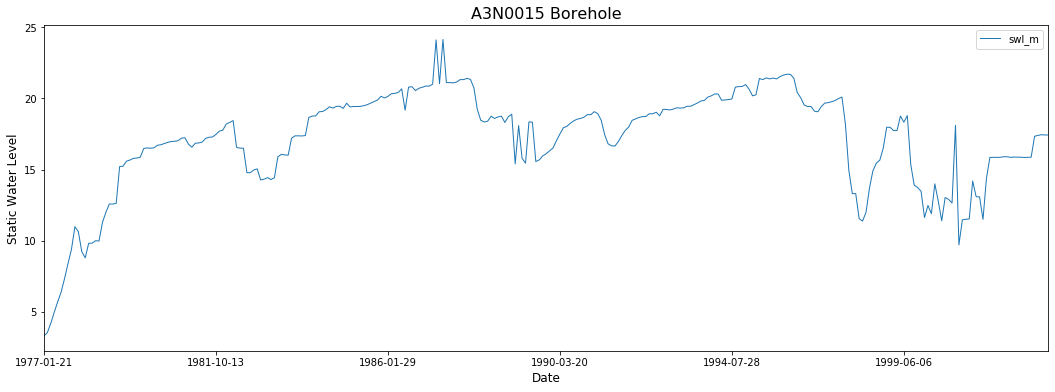

In [43]:
A3N0015.plot.line(x='swl_date', y='swl_m', figsize=(18,6), lw = 1)

plt.title('A3N0015 Borehole', fontsize=16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Static Water Level', fontsize = 12)

# To-DO

Plot multiple plots for each borehole ID 

# Merging water quality files



In [44]:

water_quality_filenames = sorted(glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/*[eye]*.xlsx'))
water_quality_files = water_quality_filenames[:5]

def merge_water_quality():
    """ func takes path to water quality files and merges all WQ files """
    """ use glob func to match all water quality files inside NGA dir"""
    #TODO: construct a proper file pattern matching for Water Quality files
    # look for filenames containing chars "eye", pick the first 5 (those for water quality)
    #water_quality_files = water_quality_filenames[:5]
    return water_quality_files

merge_water_quality()

['/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1H001 Upper Eye Dinokana.xlsx',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1H002 Lower Eye Dinokana.xlsx',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1H003 Upper Eye Tweefontein.xlsx',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1H004 Lower Eye Tweefontein.xlsx',
 '/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1H005 Skilpad Eye.xlsx']

In [45]:
# create water quality dataframe, wq_df means water quality dataframe
# files have different columns, rename cols to the same col_names
# merge all water quality files into one water quality file

merged_water_quality = pd.DataFrame()
for f in water_quality_files:
    wq_df = pd.read_excel(f, header = None, parse_dates = True)
    wq_df ['name'] = wq_df.iloc[0,1][0:6]
    wq_df = wq_df.iloc[4:, :]
    wq_df.columns = ['date_time','mean_discharge_cumecs', 'w_quality', 'name'] # cumecs ~ Cubic metres per second measure for water discharge
    merged_water_quality = merged_water_quality.append(wq_df, ignore_index = True)
    
# see last 20 records in the dataframe   
merged_water_quality.head(-20)


date_time mean_discharge_cumecs w_quality    name
0      1960-05-10 00:00:00                   NaN       255  A1H001
1      1960-05-11 00:00:00                 0.095        26  A1H001
2      1960-05-12 00:00:00                 0.095        26  A1H001
3      1960-05-13 00:00:00                 0.095        26  A1H001
4      1960-05-14 00:00:00                 0.095        26  A1H001
...                    ...                   ...       ...     ...
68356  1999-03-11 00:00:00                     0         1  A1H005
68357  1999-03-12 00:00:00                     0         1  A1H005
68358  1999-03-13 00:00:00                     0         1  A1H005
68359  1999-03-14 00:00:00                     0         1  A1H005
68360  1999-03-15 00:00:00                     0         1  A1H005

[68361 rows x 4 columns]

In [46]:
# save merged WQ files to an xlsx file called mergedWaterQuality.xlsx
merged_water_quality.to_excel("mergedWaterQuality.xlsx", index = False)
merged_water_quality.to_csv("mergedWaterQuality.csv", index = False)

In [47]:
merged_water_quality.head()

date_time mean_discharge_cumecs w_quality    name
0  1960-05-10 00:00:00                   NaN       255  A1H001
1  1960-05-11 00:00:00                 0.095        26  A1H001
2  1960-05-12 00:00:00                 0.095        26  A1H001
3  1960-05-13 00:00:00                 0.095        26  A1H001
4  1960-05-14 00:00:00                 0.095        26  A1H001

In [48]:
merged_water_quality['name'].unique()

array(['A1H001', 'Mean', 'A1H003', 'A1H004', 'A1H005'], dtype=object)

# Noted
* There is no overlap between water levels and water quality IDs
* water quality IDs and water levels are not equal

In [49]:
merged_RIMS_water_levels['bh_id'].unique()

array(['A3N0513', 'A3N0521', 'D4N2517', 'A3N0514', 'A1N0001', 'A3N0015',
       'D4N2516', 'D4N1658', 'A1N0002', 'D4N1468', 'A3N0519', 'D4N2515',
       'A3N0516', 'D4N1666', 'A1N0003'], dtype=object)

In [50]:
merged_water_quality['name'].unique()

array(['A1H001', 'Mean', 'A1H003', 'A1H004', 'A1H005'], dtype=object)

In [51]:
# check if cols are the same in the waterlevels and water quality dataframes
merged_RIMS_water_levels['bh_id'].equals(merged_water_quality['name'])

False

# Notes
* renamed 'name' to bh_id for uniformity with water levels column naming
* renamed date_time on water_quality df to separate fields, date and time

In [52]:
# rename water quality 'name' field to bh_id

merged_water_quality.rename(columns={'name': 'bh_id', 'date_time': 'date'}, inplace = True)
merged_water_quality

date mean_discharge_cumecs w_quality   bh_id
0      1960-05-10 00:00:00                   NaN       255  A1H001
1      1960-05-11 00:00:00                 0.095        26  A1H001
2      1960-05-12 00:00:00                 0.095        26  A1H001
3      1960-05-13 00:00:00                 0.095        26  A1H001
4      1960-05-14 00:00:00                 0.095        26  A1H001
...                    ...                   ...       ...     ...
68376  1999-03-31 00:00:00                     0         1  A1H005
68377  1999-04-01 00:00:00                     0         1  A1H005
68378  1999-04-02 00:00:00                     0         1  A1H005
68379  1999-04-03 00:00:00                     0         1  A1H005
68380  1999-04-04 00:00:00                     0         1  A1H005

[68381 rows x 4 columns]

In [53]:
# merged_water_quality['date'] = merged_water_quality['date'].dt.strftime('%Y-%m-%d')
def wq_date_time():
    """ func for formatting water_quality dates"""
    merged_water_quality ['date'] = merged_water_quality['date'].astype(str)
    merged_water_quality ['new_date'] = merged_water_quality ['date'].str[:10]
    merged_water_quality ['time'] = merged_water_quality ['date'].str[11:]
    merged_water_quality['date'] = merged_water_quality['new_date']
    #merged_water_quality = merged_water_quality.drop('new_date', axis = 1)
    return merged_water_quality    

In [54]:
wq_date_time()

date mean_discharge_cumecs w_quality   bh_id    new_date  \
0      1960-05-10                   NaN       255  A1H001  1960-05-10   
1      1960-05-11                 0.095        26  A1H001  1960-05-11   
2      1960-05-12                 0.095        26  A1H001  1960-05-12   
3      1960-05-13                 0.095        26  A1H001  1960-05-13   
4      1960-05-14                 0.095        26  A1H001  1960-05-14   
...           ...                   ...       ...     ...         ...   
68376  1999-03-31                     0         1  A1H005  1999-03-31   
68377  1999-04-01                     0         1  A1H005  1999-04-01   
68378  1999-04-02                     0         1  A1H005  1999-04-02   
68379  1999-04-03                     0         1  A1H005  1999-04-03   
68380  1999-04-04                     0         1  A1H005  1999-04-04   

           time  
0      00:00:00  
1      00:00:00  
2      00:00:00  
3      00:00:00  
4      00:00:00  
...         ...  
68376  00:00:00  
68377  00:00:00  
68378  00:00:00  
68379  00:00:00  
68380  00:00:00  

[68381 rows x 6 columns]

In [55]:
# drop new-date
merged_water_quality = merged_water_quality.drop('new_date', axis = 1)

In [56]:
merged_water_quality

date mean_discharge_cumecs w_quality   bh_id      time
0      1960-05-10                   NaN       255  A1H001  00:00:00
1      1960-05-11                 0.095        26  A1H001  00:00:00
2      1960-05-12                 0.095        26  A1H001  00:00:00
3      1960-05-13                 0.095        26  A1H001  00:00:00
4      1960-05-14                 0.095        26  A1H001  00:00:00
...           ...                   ...       ...     ...       ...
68376  1999-03-31                     0         1  A1H005  00:00:00
68377  1999-04-01                     0         1  A1H005  00:00:00
68378  1999-04-02                     0         1  A1H005  00:00:00
68379  1999-04-03                     0         1  A1H005  00:00:00
68380  1999-04-04                     0         1  A1H005  00:00:00

[68381 rows x 5 columns]

In [57]:
# assess first and last dates on WQ dataframe
print(merged_water_quality['date'].sort_values().min())
print(merged_water_quality['date'].sort_values().max())

1960-05-10
2018-06-04


In [58]:
# value counts
merged_water_quality['mean_discharge_cumecs'].value_counts()

0.004    2709
0.000    2462
0.001    1939
0.003    1926
0.011    1901
         ... 
0.263       1
0.308       1
0.290       1
0.327       1
0.272       1
Name: mean_discharge_cumecs, Length: 271, dtype: int64

In [59]:
# Unique water quality codes
merged_water_quality['w_quality'].unique()

array([255, 26, 170, 1, 64, 2, 151, 47, 44, 60], dtype=object)

In [60]:
# map water quality code to meaningful description
# TO-DO look for an automated map, inside file
merged_water_quality['quality_desc'] = merged_water_quality['w_quality'].map({
    255: 'Missing data', 26: 'Audited Gauge Plate Readings / dip level readings',
170: 'Period of No Record (PNR)', 1: 'Good continuous data', 64: 'Audited Estimate',
2: 'Good edited data', 151: 'Data Missing', 47: 'Edited and checked\044 still unaudited',
44: 'Checked\044 still unaudited', 60: 'Above Rating'   
})

merged_water_quality

date mean_discharge_cumecs w_quality   bh_id      time  \
0      1960-05-10                   NaN       255  A1H001  00:00:00   
1      1960-05-11                 0.095        26  A1H001  00:00:00   
2      1960-05-12                 0.095        26  A1H001  00:00:00   
3      1960-05-13                 0.095        26  A1H001  00:00:00   
4      1960-05-14                 0.095        26  A1H001  00:00:00   
...           ...                   ...       ...     ...       ...   
68376  1999-03-31                     0         1  A1H005  00:00:00   
68377  1999-04-01                     0         1  A1H005  00:00:00   
68378  1999-04-02                     0         1  A1H005  00:00:00   
68379  1999-04-03                     0         1  A1H005  00:00:00   
68380  1999-04-04                     0         1  A1H005  00:00:00   

                                            quality_desc  
0                                           Missing data  
1      Audited Gauge Plate Readings / dip level readings  
2      Audited Gauge Plate Readings / dip level readings  
3      Audited Gauge Plate Readings / dip level readings  
4      Audited Gauge Plate Readings / dip level readings  
...                                                  ...  
68376                               Good continuous data  
68377                               Good continuous data  
68378                               Good continuous data  
68379                               Good continuous data  
68380                               Good continuous data  

[68381 rows x 6 columns]

In [61]:
merged_water_quality['quality_desc'].unique()

array(['Missing data',
       'Audited Gauge Plate Readings / dip level readings',
       'Period of No Record (PNR)', 'Good continuous data',
       'Audited Estimate', 'Good edited data', 'Data Missing',
       'Edited and checked$ still unaudited', 'Checked$ still unaudited',
       'Above Rating'], dtype=object)

In [62]:
# Insert data source details i.e. data owner, contact, email and file name
merged_water_quality['data_owner'] = "Department of Water and Sanitation South Africa"
merged_water_quality['contact_person'] = "Ramusiya, Fhedzisani"
merged_water_quality['email'] = "RamusiyaF@dws.gov.za"
merged_water_quality.loc[merged_water_quality['bh_id'].str.contains('A1H001'), 'file_name'] = 'A1H001 Upper Eye Dinokana.xlsx'
merged_water_quality.loc[merged_water_quality['bh_id'].str.contains('A1H002'), 'file_name'] = 'A1H002 Lower Eye Dinokana.xlsx'
merged_water_quality.loc[merged_water_quality['bh_id'].str.contains('A1H003'), 'file_name'] = 'A1H003 Upper Eye Tweefontein.xlsx'
merged_water_quality.loc[merged_water_quality['bh_id'].str.contains('A1H004'), 'file_name'] = 'A1H004 Lower Eye Tweefontein.xlsx'
merged_water_quality.loc[merged_water_quality['bh_id'].str.contains('A1H005'), 'file_name'] = 'A1H005 Skilpad Eye.xlsx'


# Final water quality DF

In [63]:
merged_water_quality.head()

date mean_discharge_cumecs w_quality   bh_id      time  \
0  1960-05-10                   NaN       255  A1H001  00:00:00   
1  1960-05-11                 0.095        26  A1H001  00:00:00   
2  1960-05-12                 0.095        26  A1H001  00:00:00   
3  1960-05-13                 0.095        26  A1H001  00:00:00   
4  1960-05-14                 0.095        26  A1H001  00:00:00   

                                        quality_desc  \
0                                       Missing data   
1  Audited Gauge Plate Readings / dip level readings   
2  Audited Gauge Plate Readings / dip level readings   
3  Audited Gauge Plate Readings / dip level readings   
4  Audited Gauge Plate Readings / dip level readings   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                       file_name  
0  RamusiyaF@dws.gov.za  A1H001 Upper Eye Dinokana.xlsx  
1  RamusiyaF@dws.gov.za  A1H001 Upper Eye Dinokana.xlsx  
2  RamusiyaF@dws.gov.za  A1H001 Upper Eye Dinokana.xlsx  
3  RamusiyaF@dws.gov.za  A1H001 Upper Eye Dinokana.xlsx  
4  RamusiyaF@dws.gov.za  A1H001 Upper Eye Dinokana.xlsx

# Stacking together dataframes with different columns
* simple concat is not good enough, Horizontal stacking is inaccurate!

# Play with pandas left outer joins
* Perform pandas left outer join on two DFs, merged_RIMS_water_levels & water_quality
* a left join uses join keys to combine two DataFrames. Unlike an inner join, a left join 
* will return all of the rows from the left DataFrame, even those rows whose join key(s) do \
* not have values in the right DataFrame. Rows in the left DataFrame that are missing values \
* for the join key(s) in the right DataFrame will simply have null (i.e., NaN or None) values for
* those columns in the resulting joined DataFrame.

In [64]:
# concatenate two dataframes

merged_WLWQ_df = pd.concat([merged_RIMS_water_levels,merged_water_quality],sort=False)

merged_WLWQ_df.head()

bh_id    swl_date   time       country  swl_m  \
0  A3N0513  1998-09-04  12:00  South Africa  12.10   
1  A3N0513  1999-12-15  12:00  South Africa  14.82   
2  A3N0513  2000-02-15  12:00  South Africa  10.06   
3  A3N0513  2000-03-15  12:00  South Africa  10.06   
4  A3N0513  2000-03-16  12:00  South Africa   8.79   

                                             quality  \
0  Audited Gauge Plate Readings / dip level readings   
1  Audited Gauge Plate Readings / dip level readings   
2  Audited Gauge Plate Readings / dip level readings   
3  Audited Gauge Plate Readings / dip level readings   
4  Audited Gauge Plate Readings / dip level readings   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   
2  Point data, no interpolaton - Monthly readings...   
3  Point data, no interpolaton - Monthly readings...   
4  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name  latitude  longitude date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
2  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
3  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
4  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   

  mean_discharge_cumecs w_quality quality_desc  
0                   NaN       NaN          NaN  
1                   NaN       NaN          NaN  
2                   NaN       NaN          NaN  
3                   NaN       NaN          NaN  
4                   NaN       NaN          NaN

In [65]:
# inspect columns
merged_WLWQ_df.columns

Index(['bh_id', 'swl_date', 'time', 'country', 'swl_m', 'quality', 'datatrans',
       'comment_water_level', 'data_owner', 'contact_person', 'email',
       'file_name', 'latitude', 'longitude', 'date', 'mean_discharge_cumecs',
       'w_quality', 'quality_desc'],
      dtype='object')

In [66]:
# clean columns

merged_WLWQ_df.rename(columns={'time_x': 'time', 'data_owner_x':'data_owner', 'data_owner_y':'data_owner', \
                              'contact_person_x':'contact_person','contact_person_y':'contact_person', \
                              'email_x': 'email','email_y': 'email','file_name_x':'file_name', 'file_name_y': \
                              'file_name', 'time_y':'time','quality_desc_x':'quality_desc', 'quality_desc_y':'quality_desc'},\
                     inplace= True)
merged_WLWQ_df.head()

bh_id    swl_date   time       country  swl_m  \
0  A3N0513  1998-09-04  12:00  South Africa  12.10   
1  A3N0513  1999-12-15  12:00  South Africa  14.82   
2  A3N0513  2000-02-15  12:00  South Africa  10.06   
3  A3N0513  2000-03-15  12:00  South Africa  10.06   
4  A3N0513  2000-03-16  12:00  South Africa   8.79   

                                             quality  \
0  Audited Gauge Plate Readings / dip level readings   
1  Audited Gauge Plate Readings / dip level readings   
2  Audited Gauge Plate Readings / dip level readings   
3  Audited Gauge Plate Readings / dip level readings   
4  Audited Gauge Plate Readings / dip level readings   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   
2  Point data, no interpolaton - Monthly readings...   
3  Point data, no interpolaton - Monthly readings...   
4  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name  latitude  longitude date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
2  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
3  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   
4  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  NaN   

  mean_discharge_cumecs w_quality quality_desc  
0                   NaN       NaN          NaN  
1                   NaN       NaN          NaN  
2                   NaN       NaN          NaN  
3                   NaN       NaN          NaN  
4                   NaN       NaN          NaN

In [67]:
# fill unmatched values with 9999 instead of NaN
merged_WLWQ_df = merged_WLWQ_df.replace(np.nan,'9999')
merged_WLWQ_df.head()

bh_id    swl_date   time       country  swl_m  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1   
1  A3N0513  1999-12-15  12:00  South Africa  14.82   
2  A3N0513  2000-02-15  12:00  South Africa  10.06   
3  A3N0513  2000-03-15  12:00  South Africa  10.06   
4  A3N0513  2000-03-16  12:00  South Africa   8.79   

                                             quality  \
0  Audited Gauge Plate Readings / dip level readings   
1  Audited Gauge Plate Readings / dip level readings   
2  Audited Gauge Plate Readings / dip level readings   
3  Audited Gauge Plate Readings / dip level readings   
4  Audited Gauge Plate Readings / dip level readings   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   
2  Point data, no interpolaton - Monthly readings...   
3  Point data, no interpolaton - Monthly readings...   
4  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
2  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
3  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
4  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality quality_desc  
0                  9999      9999         9999  
1                  9999      9999         9999  
2                  9999      9999         9999  
3                  9999      9999         9999  
4                  9999      9999         9999

In [68]:
# bh_IDs from water quality merged
merged_WLWQ_df['bh_id'].unique()

array(['A3N0513', 'A3N0521', 'D4N2517', 'A3N0514', 'A1N0001', 'A3N0015',
       'D4N2516', 'D4N1658', 'A1N0002', 'D4N1468', 'A3N0519', 'D4N2515',
       'A3N0516', 'D4N1666', 'A1N0003', 'A1H001', 'Mean', 'A1H003',
       'A1H004', 'A1H005'], dtype=object)

In [69]:
# check for mean discharge cumecs > 0 | =0.095
# TO_DO allow search on the dataframe e.g. show mean_cumecs > 1
merged_WLWQ_df['w_quality'].where(merged_WLWQ_df['mean_discharge_cumecs'] == 0.095)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
68376    NaN
68377    NaN
68378    NaN
68379    NaN
68380    NaN
Name: w_quality, Length: 69466, dtype: object

In [70]:
# final merged dataframe combining the two dataframes | merged_RIMS_water_levels, merged_water_quality
# save to a csv
merged_WLWQ_df.to_csv("merged_WLWQ_df.csv", index=False)


In [71]:
ls -al

total 48960
drwxr-xr-x@ 18 badisa  staff       576 Feb 26 15:10 ./
drwxr-xr-x@ 58 badisa  staff      1856 Feb 28 09:26 ../
-rw-r--r--   1 badisa  staff     14340 Feb 26 15:57 .DS_Store
drwxr-xr-x  15 badisa  staff       480 Feb 28 08:57 .git/
-rw-r--r--   1 badisa  staff        84 Feb  7 11:02 .gitattributes
drwxr-xr-x  18 badisa  staff       576 Feb 28 08:56 Merged_files/
drwxr-xr-x   7 badisa  staff       224 Feb 18 11:58 Miscellaneous/
drwxr-xr-x@  6 badisa  staff       192 Feb 11 14:18 NGA/
-rw-r--r--   1 badisa  staff     35031 Jan 30 11:15 PythonDataCleaning.ipynb
-rwxr-xr-x@  1 badisa  staff     31816 Feb  7 11:04 RIMS_boreholes_template.xlsx*
drwxr-xr-x@  5 badisa  staff       160 Feb  7 11:04 RTBA_BOREHOLES/
drwxr-xr-x  20 badisa  staff       640 Feb 26 15:57 Ramotswa_Shape_files/
-rwxr-xr-x   1 badisa  staff   1871185 Feb  7 11:04 Ramotswa_all.xlsx*
-rw-r--r--@  1 badisa  staff      8437 Feb 14 16:01 SITE_INFORA10A_fixed.csv
-rw-r--r--   1 badisa  staff   2343665 Feb 28 09:26

In [72]:
cat merged_WLWQ_df.csv


bh_id,swl_date,time,country,swl_m,quality,datatrans,comment_water_level,data_owner,contact_person,email,file_name,latitude,longitude,date,mean_discharge_cumecs,w_quality,quality_desc
A3N0513,1998-09-04,12:00,South Africa,12.1,Audited Gauge Plate Readings / dip level readings,"Point data, no interpolaton - Monthly readings, hand measurements",                                                                                                    ,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A3N0513_WaterLevels.csv,-25.56447,25.86831,9999,9999,9999,9999
A3N0513,1999-12-15,12:00,South Africa,14.82,Audited Gauge Plate Readings / dip level readings,"Point data, no interpolaton - Monthly readings, hand measurements",                                                                                                    ,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A3N0513_WaterLevels.csv,-25.56447,25.86831,99

D4N1658,2000-03-15,12:00,South Africa,38.34,Good continuous data,"Point data, no interpolaton - Monthly readings, hand measurements",                                                                                                    ,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,D4N1658_WaterLevels.csv,-25.51083333,25.89583333,9999,9999,9999,9999
D4N1658,2000-03-16,12:00,South Africa,38.16,Good continuous data,"Point data, no interpolaton - Monthly readings, hand measurements",                                                                                                    ,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,D4N1658_WaterLevels.csv,-25.51083333,25.89583333,9999,9999,9999,9999
D4N1658,2000-05-02,12:00,South Africa,38.07,Good continuous data,"Point data, no interpolaton - Monthly readings, hand measurements",                                                                             

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-03-16,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-03-17,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-03-18,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-03-19,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H0

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-08-26,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-08-27,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-08-28,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1961-08-29,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H0

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1962-10-17,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1962-10-18,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1962-10-19,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1962-10-20,0.086,26,Audited Gauge Plate Readings / dip level readings
A1H0

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1965-07-14,0.067,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1965-07-15,0.067,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1965-07-16,0.067,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1965-07-17,0.067,26,Audited Gauge Plate Readings / dip level readings
A1H0

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1968-04-25,0.078,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1968-04-26,0.079,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1968-04-27,0.081,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1968-04-28,0.082,26,Audited Gauge Plate Readings / dip level readings
A1H0

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1970-12-12,0.118,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1970-12-13,0.118,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1970-12-14,0.118,26,Audited Gauge Plate Readings / dip level readings
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1970-12-15,0.119,26,Audited Gauge Plate Readings / dip level readings
A1H0

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1974-03-11,0.086,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1974-03-12,0.086,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1974-03-13,0.086,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1974-03-14,0.086,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",Ramusiy

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1978-03-29,0.246,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1978-03-30,0.246,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1978-03-31,0.246,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1978-04-01,0.247,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",Ramusiy

A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1984-01-21,0.149,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1984-01-22,0.149,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1984-01-23,0.149,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",RamusiyaF@dws.gov.za,A1H001 Upper Eye Dinokana.xlsx,9999,9999,1984-01-24,0.149,1,Good continuous data
A1H001,9999,00:00:00,9999,9999,9999,9999,9999,Department of Water and Sanitation South Africa,"Ramusiya, Fhedzisani",Ramusiy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Investigating Ramotswa datasets
* EDA on the Ramotswa data


In [73]:
# read in the csv files
ramotswa_1_df = pd.read_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/Ramotswa_data_1_20190904.csv', header = 0, encoding = 'unicode_escape')
ramotswa_2_df = pd.read_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/Ramotswa_data_2_20190904.csv', header = 0, encoding = 'unicode_escape')

In [74]:
# Have a look at the data 
ramotswa_1_df.head()

Monitoring Point ID                              Monitoring Point Name  \
0                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
1                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
2                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
3                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
4                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   

    Latitude  Longitude Located on Feature Name Located on Type  \
0 -25.193581  25.801222                     NaN             NaN   
1 -25.193581  25.801222                     NaN             NaN   
2 -25.193581  25.801222                     NaN             NaN   
3 -25.193581  25.801222                     NaN             NaN   
4 -25.193581  25.801222                     NaN             NaN   

  Drainage Region Name  Feature Reference Code Monitoring Active  \
0                 A10B                     NaN                No   
1                 A10B                     NaN                No   
2                 A10B                     NaN                No   
3                 A10B                     NaN                No   
4                 A10B                     NaN                No   

  Sample Start Date Sample Start Time  Sample End Date  Sample End Time  \
0        1999-10-25          13:00:00              NaN              NaN   
1        1999-11-16          15:30:00              NaN              NaN   
2        1999-12-01          10:00:00              NaN              NaN   
3        2000-04-17          10:00:00              NaN              NaN   
4        2000-04-17          10:00:00              NaN              NaN   

   Time Interval  Sample Start Depth  Sample End Depth  Depth Interval  \
0            NaN                 0.0               NaN             NaN   
1            NaN                 0.0               NaN             NaN   
2            NaN                 NaN               NaN             NaN   
3            NaN                 NaN               NaN             NaN   
4            0.0                 NaN               NaN             NaN   

  Preservative Action Type  \
0        HGCL2      Sample   
1        HGCL2      Sample   
2        HGCL2      Sample   
3        HGCL2      Sample   
4        HGCL2      Sample   

   ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Result  \
0                                              4.208                  
1                                              0.974                  
2                                              4.756                  
3                                              2.526                  
4                                                NaN                  

   ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Detection Limit  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

   ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Greater Than  \
0                                                NaN                        
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        

   CORR-Diss-Water (CORROSIVITY INDEX) (null) Result  \
0                                              2.340   
1                                              0.304   
2                                              6.588   
3                                              0.172   


In [75]:
# read in Ramotswa 2

ramotswa_2_df.head()

Monitoring Point ID                              Monitoring Point Name  \
0                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
1                84961      2525DB00395 TWEEFONTEIN UPPER (A1G003) - WR70   
2                84962      2525DB00394 TWEEFONTEIN LOWER (A1H004) - WR59   
3                88621    ZQMBM40 MALMANIELOOP LOWER EYE AT PAARDENVALLEI   
4                88621    ZQMBM40 MALMANIELOOP LOWER EYE AT PAARDENVALLEI   

    Latitude  Longitude                        Located on Feature Name  \
0 -25.193581  25.801222                                            NaN   
1 -25.545400  25.940800  2525DB00395 TWEEFONTEIN UPPER (A1H003) - WR70   
2 -25.544100  25.945600  2525DB00394 TWEEFONTEIN LOWER (A1H004) - WR59   
3 -25.633333  25.995833                                            NaN   
4 -25.633333  25.995833                                            NaN   

  Located on Type Drainage Region Name  Feature Reference Code  \
0             NaN                 A10B                     NaN   
1      Spring/Eye                 A10A                     NaN   
2      Spring/Eye                 A10A                     NaN   
3             NaN                 A31D                     NaN   
4             NaN                 A31D                     NaN   

  Monitoring Active Sample Start Date Sample Start Time  Sample End Date  \
0                No        2000-05-30          08:00:00              NaN   
1                No        2007-11-17          10:00:00              NaN   
2                No        2007-11-17          10:00:00              NaN   
3                No        1994-05-31          14:30:00              NaN   
4                No        1994-05-31          14:30:00              NaN   

   Sample End Time  Time Interval  Sample Start Depth  Sample End Depth  \
0              NaN            NaN                 NaN               NaN   
1              NaN            NaN                 NaN               NaN   
2              NaN            NaN                 NaN               NaN   
3              NaN            NaN                 0.0               NaN   
4              NaN            NaN                 0.0               NaN   

   Depth Interval Preservative  Action Type  \
0             NaN         NONE       Sample   
1             NaN         NONE       Sample   
2             NaN         NONE       Sample   
3             NaN          NaN  Observation   
4             NaN        HGCL2       Sample   

   Al-Diss-Water (ALUMINIUM) (mg/L) Result  \
0                                    0.030   
1                                    0.010   
2                                    0.001   
3                                      NaN   
4                                      NaN   

   Al-Diss-Water (ALUMINIUM) (mg/L) Detection Limit  \
0                                             0.059   
1                                             0.002   
2                                             0.002   
3                                               NaN   
4                                               NaN   

   Al-Diss-Water (ALUMINIUM) (mg/L) Greater Than  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   As-Diss-Water (ARSENIC) (mg/L) Result  \
0                                  0.050   
1                                  0.002   
2                                  0.071   
3                                    NaN   
4                                    NaN   

   As-Diss-Water (ARSENIC) (mg/L) Detection Limit  \
0                                           0.100   
1                                           0.004   
2                                           0.004   
3                                             NaN   
4                                             NaN   

  

# Cleaning Ramotswa 1 & 2 files

* Extract variable result column
* Rename columns
* File names
* Check units with RIMS
* Check names with RIMS
* Check water levels (negative sign, strip)
* Fill in quality description and datatrans: use code above to fill in

    

In [76]:
rams1 = ramotswa_1_df.copy()

In [77]:
rams1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Columns: 109 entries, Monitoring Point ID to N-Tot-Calc-Water (TOTAL NITROGEN CALCULATED) (mg/L) Greater Than
dtypes: float64(99), int64(1), object(9)
memory usage: 1.7+ MB


In [78]:
# enumerate all cols in rams1

for i,v in enumerate (rams1.columns):
    print(i,v)

0 Monitoring Point ID
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Result
20 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Detection Limit
21 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Greater Than
22 CORR-Diss-Water (CORROSIVITY INDEX) (null) Result
23 CORR-Diss-Water (CORROSIVITY INDEX) (null) Detection Limit
24 CORR-Diss-Water (CORROSIVITY INDEX) (null) Greater Than
25 Ca-Diss-Water (CALCIUM) (mg/L) Result
26 Ca-Diss-Water (CALCIUM) (mg/L) Detection Limit
27 Ca-Diss-Water (CALCIUM) (mg/L) Greater Than
28 Cl-Diss-Water (CHLORIDE) (mg/L) Result
29 Cl-Diss-Water (CHLORIDE) (mg/L) Detection Limit
30 Cl-Di

In [79]:
# use np.r_ to build array efficiently
"""
 numpy.r_ = <numpy.lib.index_tricks.RClass object at 0x1b5e390>

    Translates slice objects to concatenation along the first axis.

    This is a simple way to build up arrays quickly. There are two use cases.

        If the index expression contains comma separated arrays, then stack them along their first axis.
        If the index expression contains slice notation or scalars then create a 1-D array with a range indicated by the slice notation.

"""
cleaned_rams1 = ramotswa_1_df.iloc[:, np.r_[:19, 19,22,25,28,31,34,37,40,43,46,49,52,\
                               55,58,61,64,67,70,73,76,79,82,85,88,91,94,97,100,103,106]]
cleaned_rams1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 49 columns):
Monitoring Point ID                                                       2041 non-null int64
Monitoring Point Name                                                     2041 non-null object
Latitude                                                                  2041 non-null float64
Longitude                                                                 2041 non-null float64
Located on Feature Name                                                   1988 non-null object
Located on Type                                                           1988 non-null object
Drainage Region Name                                                      2041 non-null object
Feature Reference Code                                                    0 non-null float64
Monitoring Active                                                         2041 non-null object
Sample Start Date                      

In [80]:
# rename col Monitoring Point ID

cleaned_rams1.rename(columns = {'Monitoring Point ID':'ID Monitoring Point'}, inplace = True)

In [81]:
for i,v in enumerate (cleaned_rams1.columns):
    print(i,v)

0 ID Monitoring Point
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Result
20 CORR-Diss-Water (CORROSIVITY INDEX) (null) Result
21 Ca-Diss-Water (CALCIUM) (mg/L) Result
22 Cl-Diss-Water (CHLORIDE) (mg/L) Result
23 DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result
24 EC-Phys-Water (ELECTRICAL CONDUCTIVITY) (mS/m) Result
25 F-Diss-Water (FLUORIDE) (mg/L) Result
26 HARD-Mg-Calc-Water (HARDNESS MAGNESIUM CALCULATED) (mg/L) Result
27 HARD-Tot-Water (HARDNESS AS CACO3 CALCULATED) (mg/L) Result
28 K-Diss-Water (POTASSIUM) (mg/L) Result
29 KJEL N-Tot-Water (KJELDAHL NITROGEN) (mg/L) Result
30 LANGL-Index-Water (LANGLIER INDEX) (null) Res

In [82]:
# inspect cols
cleaned_rams1.columns

Index(['ID Monitoring Point', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Depth',
       'Depth Interval', 'Preservative', 'Action Type',
       'ASAR-Diss-Water (ADJUSTED SODIUM ADSORPTION RATIO) (null) Result',
       'CORR-Diss-Water (CORROSIVITY INDEX) (null) Result',
       'Ca-Diss-Water (CALCIUM) (mg/L) Result',
       'Cl-Diss-Water (CHLORIDE) (mg/L) Result',
       'DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result',
       'EC-Phys-Water (ELECTRICAL CONDUCTIVITY) (mS/m) Result',
       'F-Diss-Water (FLUORIDE) (mg/L) Result',
       'HARD-Mg-Calc-Water (HARDNESS MAGNESIUM CALCULATED) (mg/L) Result',
       'HARD-Tot-Water (HARDNESS AS CACO3 CALCULATED) (mg/L) Result',
       'K-Diss-Water (POTASSI

In [83]:
# rename cols in cleaned_rams1 df
# shorter cols name does it

cleaned_rams1.rename(columns = lambda x : str(x)[:15], inplace = True)

cleaned_rams1.rename(columns = {
    
'ID Monitoring P': 'Monitoring Point ID', 'Monitoring Poin': 'Monitoring Point Name',
'Located on Feat': 'Located on Feature Name', 'Drainage Region': 'Drainage Region Name',
'Feature Referen': 'Feature Reference Code', 'Monitoring Acti': 'Monitoring Active',
'Sample Start Da':'Sample Start Date', 'Sample Start Ti':'Sample Start Time', 'Sample Start De':'Sample Start Depth',
'ASAR-Diss-Water': 'ASAR', 'CORR-Diss-Water': 'CORR', 'Ca-Diss-Water (': 'Ca',
'Cl-Diss-Water (': 'Cl', 'DMS-Tot-Water (': 'DMS', 'EC-Phys-Water (': 'EC',
'F-Diss-Water (F': 'F', 'HARD-Mg-Calc-Wa': 'HARD-Mg-Calc', 'HARD-Tot-Water': 'HARD-Tot',
'K-Diss-Water (P': 'K', 'KJEL N-Tot-Wate': 'KJEL N-Tot', 'LANGL-Index-Wat': 'LANGL-Index',
'Mg-Diss-Water (': 'Mg', 'NH3(25)-Union-D': 'NH3(25)-Union', 'NH4-N-Diss-Wate': 'NH4-N',
'NO3+NO2-N-Diss-': 'NO3+NO2-N', 'Na-Diss-Water (': 'Na', 'P-Tot-Water (TO': 'P-Tot', 'PO4-P-Diss-Wate': 'PO4-P',
'RYZNAR-Index-Wa': 'RYZNAR-Index', 'SAR-Diss-Water ':  'SAR', 'SO4-Diss-Water ':  'SO4', 'Si-Diss-Water (': 'Si',
'TAL-Diss-Water ':  'TAL', 'pH-Diss-Water (': 'pH', 'pHs-Calc-Water ': 'pHs-Calc',
'NO2-N-Diss-Wate': 'NO2-N', 'N-Tot-Calc-Wate': 'N-Tot-Calc'  

}, inplace = True)

cleaned_rams1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 49 columns):
Monitoring Point ID        2041 non-null int64
Monitoring Point Name      2041 non-null object
Latitude                   2041 non-null float64
Longitude                  2041 non-null float64
Located on Feature Name    1988 non-null object
Located on Type            1988 non-null object
Drainage Region Name       2041 non-null object
Feature Reference Code     0 non-null float64
Monitoring Active          2041 non-null object
Sample Start Date          2041 non-null object
Sample Start Time          2041 non-null object
Sample End Date            0 non-null float64
Sample End Time            0 non-null float64
Time Interval              419 non-null float64
Sample Start Depth         1629 non-null float64
Sample End Dept            0 non-null float64
Depth Interval             0 non-null float64
Preservative               2041 non-null object
Action Type                2041 non-n

# Noted
* saved the file_name with an underscore

In [84]:
# insert data source details i.e. data owner, contact, email, and filename into cleaned_rams1 df

cleaned_rams1['dataowner'] = "Department of Water and Sanitation South Africa"
cleaned_rams1['contact_person'] = "Ramusiya, Fhedzisani"
cleaned_rams1['email'] = "RamusiyaF@dws.gov.za"
cleaned_rams1['file_name'] = "Ramotswa_data_1_20190904.csv"

# Dig on Monitoring Point IDs 

* where do monitoring point IDs come from??

Notes

* for monitoring point name: e.g "ZQMBM45 TWEEFONTEIN UPPER EYE AT TWEEFONTEIN"
* ZQMBM45 is a ZQM number, a WQ monitoring point, 
* TWEEFONTEIN, farm, literal name for the NGA number  
* UPPER EYE AT TWEEFONTEIN, likely a spring

In [85]:
# see first few records

cleaned_rams1.head()

Monitoring Point ID                              Monitoring Point Name  \
0                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
1                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
2                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
3                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
4                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   

    Latitude  Longitude Located on Feature Name Located on Type  \
0 -25.193581  25.801222                     NaN             NaN   
1 -25.193581  25.801222                     NaN             NaN   
2 -25.193581  25.801222                     NaN             NaN   
3 -25.193581  25.801222                     NaN             NaN   
4 -25.193581  25.801222                     NaN             NaN   

  Drainage Region Name  Feature Reference Code Monitoring Active  \
0                 A10B                     NaN                No   
1                 A10B                     NaN                No   
2                 A10B                     NaN                No   
3                 A10B                     NaN                No   
4                 A10B                     NaN                No   

  Sample Start Date Sample Start Time  Sample End Date  Sample End Time  \
0        1999-10-25          13:00:00              NaN              NaN   
1        1999-11-16          15:30:00              NaN              NaN   
2        1999-12-01          10:00:00              NaN              NaN   
3        2000-04-17          10:00:00              NaN              NaN   
4        2000-04-17          10:00:00              NaN              NaN   

   Time Interval  Sample Start Depth  Sample End Dept  Depth Interval  \
0            NaN                 0.0              NaN             NaN   
1            NaN                 0.0              NaN             NaN   
2            NaN                 NaN              NaN             NaN   
3            NaN                 NaN              NaN             NaN   
4            0.0                 NaN              NaN             NaN   

  Preservative Action Type   ASAR   CORR      Ca       Cl      DMS    EC  \
0        HGCL2      Sample  4.208  2.340  50.686   77.766  567.955  79.5   
1        HGCL2      Sample  0.974  0.304  27.282   11.498  215.043  30.2   
2        HGCL2      Sample  4.756  6.588  51.389  200.265  580.858  99.4   
3        HGCL2      Sample  2.526  0.172  84.458   24.134  626.274  76.1   
4        HGCL2      Sample    NaN    NaN     NaN      NaN      NaN   NaN   

       F  HARD-Mg-Calc  HARD-Tot-Water        K  KJEL N-Tot  LANGL-Index  \
0  0.185        67.767          207.021  15.852         NaN        0.101   
1  0.246        31.141          105.097   2.766         NaN       -0.007   
2  1.095        82.070          225.755   1.448         NaN       -0.217   
3  0.468        80.623          306.619   7.208         NaN        1.361   
4    NaN           NaN              NaN     NaN         NaN          NaN   

       Mg  NH3(25)-Union  NH4-N  NO3+NO2-N       Na  P-Tot  PO4-P  \
0  19.535          0.003  0.082      6.053   76.524    NaN  1.918   
1   8.977          0.020  0.400      0.020   14.524    NaN  0.017   
2  23.658          0.002  0.052      8.772  106.756    NaN  0.072   
3  23.241          0.003  0.020      3.002   41.436    NaN  0.022   
4     NaN            NaN    NaN        NaN      NaN    NaN    NaN   

   RYZNAR-Index    SAR      SO4  SO4Ion/MajAnion  SO4Ion/TotAnion      Si  \
0         7.586  2.314  153.867              NaN              NaN   6.226   
1         7.946  0.617   16.217              NaN              NaN   5.637   
2         8.207  3.092   87.868              NaN              NaN  22.531   
3         5.645  1.030   22.619              NaN              NaN  20.332   
4           NaN    NaN      NaN             0.06              NaN     NaN   

       TAL     pH  pHs-Calc  NO2-N  N-Tot-Calc

In [86]:
# clean Ramotswa 2 df
cleaned_rams2 = ramotswa_2_df.copy()

In [87]:
for i,v in enumerate(cleaned_rams2.columns):
    print(i,v)

0 Monitoring Point ID
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 Al-Diss-Water (ALUMINIUM) (mg/L) Result
20 Al-Diss-Water (ALUMINIUM) (mg/L) Detection Limit
21 Al-Diss-Water (ALUMINIUM) (mg/L) Greater Than
22 As-Diss-Water (ARSENIC) (mg/L) Result
23 As-Diss-Water (ARSENIC) (mg/L) Detection Limit
24 As-Diss-Water (ARSENIC) (mg/L) Greater Than
25 B-Diss-Water (BORON) (mg/L) Result
26 B-Diss-Water (BORON) (mg/L) Detection Limit
27 B-Diss-Water (BORON) (mg/L) Greater Than
28 Ba-Diss-Water (BARIUM) (mg/L) Result
29 Ba-Diss-Water (BARIUM) (mg/L) Detection Limit
30 Ba-Diss-Water (BARIUM) (mg/L) Greater Than
31 COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result
32 COD (CHEMICAL OXYGEN DEMAND) (mg/L) D

In [88]:
cleaned_rams2 = ramotswa_2_df.iloc[:, np.r_[:19, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91]]
cleaned_rams2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 44 columns):
Monitoring Point ID                                                                   630 non-null int64
Monitoring Point Name                                                                 630 non-null object
Latitude                                                                              630 non-null float64
Longitude                                                                             630 non-null float64
Located on Feature Name                                                               615 non-null object
Located on Type                                                                       615 non-null object
Drainage Region Name                                                                  630 non-null object
Feature Reference Code                                                                0 non-null float64
Monitoring Active                              

In [89]:
# see cols
cleaned_rams2.columns

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Depth',
       'Depth Interval', 'Preservative', 'Action Type',
       'Al-Diss-Water (ALUMINIUM) (mg/L) Result',
       'As-Diss-Water (ARSENIC) (mg/L) Result',
       'B-Diss-Water (BORON) (mg/L) Result',
       'Ba-Diss-Water (BARIUM) (mg/L) Result',
       'COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result',
       'Cd-Diss-Water (CADMIUM) (mg/L) Result',
       'Cr-Diss-Water (CHROMIUM) (mg/L) Result',
       'Cu-Diss-Water (COPPER) (mg/L) Result',
       'Fe-Diss-Water (IRON) (mg/L) Result',
       'Mn-Diss-Water (MANGANESE) (mg/L) Result',
       'Mo-Diss-Water (MOLYBDENUM) (mg/L) Result',
       'Ni-Diss-Water (NICKEL) (mg/L) Result',


In [90]:
cleaned_rams2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 44 columns):
Monitoring Point ID                                                                   630 non-null int64
Monitoring Point Name                                                                 630 non-null object
Latitude                                                                              630 non-null float64
Longitude                                                                             630 non-null float64
Located on Feature Name                                                               615 non-null object
Located on Type                                                                       615 non-null object
Drainage Region Name                                                                  630 non-null object
Feature Reference Code                                                                0 non-null float64
Monitoring Active                              

In [91]:
#cleaned_rams2.rename(columns = {'Monitoring Point ID': 'ID Monitoring Point'}, inplace = True)

In [92]:
for i,v in enumerate(cleaned_rams2):
    print(i,v)

0 Monitoring Point ID
1 Monitoring Point Name
2 Latitude
3 Longitude
4 Located on Feature Name
5 Located on Type
6 Drainage Region Name
7 Feature Reference Code
8 Monitoring Active
9 Sample Start Date
10 Sample Start Time
11 Sample End Date
12 Sample End Time
13 Time Interval
14 Sample Start Depth
15 Sample End Depth
16 Depth Interval
17 Preservative
18 Action Type
19 Al-Diss-Water (ALUMINIUM) (mg/L) Result
20 As-Diss-Water (ARSENIC) (mg/L) Result
21 B-Diss-Water (BORON) (mg/L) Result
22 Ba-Diss-Water (BARIUM) (mg/L) Result
23 COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result
24 Cd-Diss-Water (CADMIUM) (mg/L) Result
25 Cr-Diss-Water (CHROMIUM) (mg/L) Result
26 Cu-Diss-Water (COPPER) (mg/L) Result
27 Fe-Diss-Water (IRON) (mg/L) Result
28 Mn-Diss-Water (MANGANESE) (mg/L) Result
29 Mo-Diss-Water (MOLYBDENUM) (mg/L) Result
30 Ni-Diss-Water (NICKEL) (mg/L) Result
31 Pb-Diss-Water (LEAD) (mg/L) Result
32 Sr-Diss-Water (STRONTIUM) (mg/L) Result
33 V-Diss-Water (VANADIUM) (mg/L) Result
34 Zn-Diss-Wat

In [93]:
# shorten long column names
cleaned_rams2.rename(columns={

'ID Monitoring Point': 'Monitoring Point ID',
'Al-Diss-Water (ALUMINIUM) (mg/L) Result':'Al-Diss-Water',
'As-Diss-Water (ARSENIC) (mg/L) Result':'As-Diss-Water',
'B-Diss-Water (BORON) (mg/L) Result':'B-Diss-Water',
'Ba-Diss-Water (BARIUM) (mg/L) Result':'Ba-Diss-Water',
'COD (CHEMICAL OXYGEN DEMAND) (mg/L) Result':'COD',
'Cd-Diss-Water (CADMIUM) (mg/L) Result':'Cd-Diss-Water',
'Cr-Diss-Water (CHROMIUM) (mg/L) Result':'Cr-Diss-Water',
'Cu-Diss-Water (COPPER) (mg/L) Result':'Cu-Diss-Water',
'Fe-Diss-Water (IRON) (mg/L) Result':'Fe-Diss-Water',
'Mn-Diss-Water (MANGANESE) (mg/L) Result':'Mn-Diss-Water',
'Mo-Diss-Water (MOLYBDENUM) (mg/L) Result':'Mo-Diss-Water',
'Ni-Diss-Water (NICKEL) (mg/L) Result':'Ni-Diss-Water',
'Pb-Diss-Water (LEAD) (mg/L) Result':'Pb-Diss-Water',
'Sr-Diss-Water (STRONTIUM) (mg/L) Result':'Sr-Diss-Water',
'V-Diss-Water (VANADIUM) (mg/L) Result':'V-Diss-Water',
'Zn-Diss-Water (ZINC) (mg/L) Result':'Zn-Diss-Water',
'E.COLI-Susp-Water (ESCHERICHIA COLI) (cfu/100mL) Result':'E.COLI-Susp-Water',
'E.COLI-SuspMPN-Water (ESCHERICHIA COLI BY MPN METHOD) (MPN/100mL) Result':'E.COLI-SuspMPN',
'Eh-Phys-Water (REDOX POTENTIAL) (mV) Result':'Eh-Phys-Water',
'Hydrogen-3-Water (TRITIUM ATOM RATIO WITH RESPECT TO HYDROGEN (3H/1H)) (TU) Result':'Hydrogen-3-Water',
'O-Abs-Water (OXYGEN ABSORBED) (mg/L) Result':'O-Abs-Water',
'O-Diss-Water (OXYGEN DISSOLVED) (mg/L) Result':'O-Diss-Water',
'SOLIDS-Susp-Water (TOTAL SUSPENDED SOLIDS) (mg/L) Result':'SOLIDS-Susp-Water',
'TC-SuspMPN-Water (TOTAL COLIFORM COUNT BY MPN METHOD) (MPN/100mL) Result':'TC-SuspMPN-Water',
'TEMP-Phys-Water (TEMPERATURE) (°C) Result': 'TEMP-Phys-Water'

}, inplace=True)

In [94]:
cleaned_rams2.columns

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Depth',
       'Depth Interval', 'Preservative', 'Action Type', 'Al-Diss-Water',
       'As-Diss-Water', 'B-Diss-Water', 'Ba-Diss-Water', 'COD',
       'Cd-Diss-Water', 'Cr-Diss-Water', 'Cu-Diss-Water', 'Fe-Diss-Water',
       'Mn-Diss-Water', 'Mo-Diss-Water', 'Ni-Diss-Water', 'Pb-Diss-Water',
       'Sr-Diss-Water', 'V-Diss-Water', 'Zn-Diss-Water', 'E.COLI-Susp-Water',
       'E.COLI-SuspMPN', 'Eh-Phys-Water', 'Hydrogen-3-Water', 'O-Abs-Water',
       'O-Diss-Water', 'SOLIDS-Susp-Water', 'TC-SuspMPN-Water',
       'TEMP-Phys-Water'],
      dtype='object')

In [95]:
# insert data source details i.e. data owner, contact, email, and filename into cleaned_rams2 df

cleaned_rams2['dataowner'] = "Department of Water and Sanitation South Africa"
cleaned_rams2['contact_person'] = "Ramusiya, Fhedzisani"
cleaned_rams2['email'] = "RamusiyaF@dws.gov.za"
cleaned_rams2['file_name'] = "Ramotswa_data_2_20190904.csv"

In [96]:
cleaned_rams2.head()

Monitoring Point ID                              Monitoring Point Name  \
0                84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
1                84961      2525DB00395 TWEEFONTEIN UPPER (A1G003) - WR70   
2                84962      2525DB00394 TWEEFONTEIN LOWER (A1H004) - WR59   
3                88621    ZQMBM40 MALMANIELOOP LOWER EYE AT PAARDENVALLEI   
4                88621    ZQMBM40 MALMANIELOOP LOWER EYE AT PAARDENVALLEI   

    Latitude  Longitude                        Located on Feature Name  \
0 -25.193581  25.801222                                            NaN   
1 -25.545400  25.940800  2525DB00395 TWEEFONTEIN UPPER (A1H003) - WR70   
2 -25.544100  25.945600  2525DB00394 TWEEFONTEIN LOWER (A1H004) - WR59   
3 -25.633333  25.995833                                            NaN   
4 -25.633333  25.995833                                            NaN   

  Located on Type Drainage Region Name  Feature Reference Code  \
0             NaN                 A10B                     NaN   
1      Spring/Eye                 A10A                     NaN   
2      Spring/Eye                 A10A                     NaN   
3             NaN                 A31D                     NaN   
4             NaN                 A31D                     NaN   

  Monitoring Active Sample Start Date Sample Start Time  Sample End Date  \
0                No        2000-05-30          08:00:00              NaN   
1                No        2007-11-17          10:00:00              NaN   
2                No        2007-11-17          10:00:00              NaN   
3                No        1994-05-31          14:30:00              NaN   
4                No        1994-05-31          14:30:00              NaN   

   Sample End Time  Time Interval  Sample Start Depth  Sample End Depth  \
0              NaN            NaN                 NaN               NaN   
1              NaN            NaN                 NaN               NaN   
2              NaN            NaN                 NaN               NaN   
3              NaN            NaN                 0.0               NaN   
4              NaN            NaN                 0.0               NaN   

   Depth Interval Preservative  Action Type  Al-Diss-Water  As-Diss-Water  \
0             NaN         NONE       Sample          0.030          0.050   
1             NaN         NONE       Sample          0.010          0.002   
2             NaN         NONE       Sample          0.001          0.071   
3             NaN          NaN  Observation            NaN            NaN   
4             NaN        HGCL2       Sample            NaN            NaN   

   B-Diss-Water  Ba-Diss-Water  COD  Cd-Diss-Water  Cr-Diss-Water  \
0         0.082          0.044  NaN          0.003          0.003   
1         0.009          0.011  NaN          0.001          0.001   
2         0.009          0.005  NaN          0.001          0.001   
3           NaN            NaN  NaN            NaN            NaN   
4           NaN            NaN  NaN            NaN            NaN   

   Cu-Diss-Water  Fe-Diss-Water  Mn-Diss-Water  Mo-Diss-Water  Ni-Diss-Water  \
0          0.010          0.064          0.002          0.006          0.005   
1          0.002          0.006          0.003          0.009          0.006   
2          0.003          0.006          0.001          0.009          0.006   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   Pb-Diss-Water  Sr-Diss-Water  V-Diss-Water  Zn-Diss-Water  \
0          0.027          0.480         0.003          0.003   
1          0.002          0.016         0.001          0.003   
2          0.002          0.018         0.001          0.002   
3            NaN            NaN           NaN            NaN   
4            NaN            NaN           NaN            NaN   

   E.COLI-Susp-Water  E.COLI-SuspMPN  Eh-Phys-

# Identify join keys 

* To identify appropriate join keys we first need to know which field(s) are shared between the files (DataFrames)

Noted
* The 2 ramotswa DFs don't have equal columns
* rams 1 has 53 columns while rams 2 has 48 columns
* Columns on rams 1 and not in rams 2 include: ASAR, CORR, CA, AL-DISS-Water

In [97]:
# Ramotswa 1 columns
cleaned_rams1.columns

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Dept',
       'Depth Interval', 'Preservative', 'Action Type', 'ASAR', 'CORR', 'Ca',
       'Cl', 'DMS', 'EC', 'F', 'HARD-Mg-Calc', 'HARD-Tot-Water ', 'K',
       'KJEL N-Tot', 'LANGL-Index', 'Mg', 'NH3(25)-Union', 'NH4-N',
       'NO3+NO2-N', 'Na', 'P-Tot', 'PO4-P', 'RYZNAR-Index', 'SAR', 'SO4',
       'SO4Ion/MajAnion', 'SO4Ion/TotAnion', 'Si', 'TAL', 'pH', 'pHs-Calc',
       'NO2-N', 'N-Tot-Calc', 'dataowner', 'contact_person', 'email',
       'file_name'],
      dtype='object')

In [98]:
# Ramotswa 2 columns
cleaned_rams2.columns

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Depth',
       'Depth Interval', 'Preservative', 'Action Type', 'Al-Diss-Water',
       'As-Diss-Water', 'B-Diss-Water', 'Ba-Diss-Water', 'COD',
       'Cd-Diss-Water', 'Cr-Diss-Water', 'Cu-Diss-Water', 'Fe-Diss-Water',
       'Mn-Diss-Water', 'Mo-Diss-Water', 'Ni-Diss-Water', 'Pb-Diss-Water',
       'Sr-Diss-Water', 'V-Diss-Water', 'Zn-Diss-Water', 'E.COLI-Susp-Water',
       'E.COLI-SuspMPN', 'Eh-Phys-Water', 'Hydrogen-3-Water', 'O-Abs-Water',
       'O-Diss-Water', 'SOLIDS-Susp-Water', 'TC-SuspMPN-Water',
       'TEMP-Phys-Water', 'dataowner', 'contact_person', 'email', 'file_name'],
      dtype='object')

In [99]:
# check if the dataframes are equal
cleaned_rams2.equals(cleaned_rams1)

False

In [100]:
# count number of rows per DF before merging
print('cleaned_rams1 has: {} rows'.format(cleaned_rams1.shape))
print('cleaned_rams2 has: {} rows'.format(cleaned_rams2.shape))

cleaned_rams1 has: (2041, 53) rows
cleaned_rams2 has: (630, 48) rows


In [101]:
# merge the two Ramotswa DFs
# use an outer join

# get common cols in rams1 and rams2
common_cols = cleaned_rams1.columns.intersection(cleaned_rams2.columns)
common_cols

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Depth Interval', 'Preservative',
       'Action Type', 'dataowner', 'contact_person', 'email', 'file_name'],
      dtype='object')

In [102]:
# merged_ramotswa2 = pd.merge(cleaned_rams1, cleaned_rams2, on = , how = 'outer', sort= False)
# merged_ramotswa3 = pd.merge(left=cleaned_rams1, right=cleaned_rams2, how = 'inner', \
#                          left_on = 'Monitoring Point ID', right_on = 'Monitoring Point ID')
# merged_ramotswa3

# stack dataframes together vertically
merged_ramotswa = pd.concat([cleaned_rams1, cleaned_rams2],axis=0, ignore_index=True, sort=False)
merged_ramotswa

Monitoring Point ID                              Monitoring Point Name  \
0                   84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
1                   84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
2                   84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
3                   84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
4                   84958  A1E001 MOILWAS 900 JO (GOPANE) EVAPORATION STA...   
...                   ...                                                ...   
2666           1000259988                2525DB00369 STINKHOUTBOOM - G045368   
2667           1000259989                   2624DB00233 SPITSKOP A - G043991   
2668           1000260071                                  PV20#RF PARDEVLEI   
2669           1000260782        2525BC00074 MOILWA PTN SKILPADHEK - NWG0034   
2670           1000260784  2525BC00075 MOILWA PTN SKILPADHEK - NWG0035 MO...   

       Latitude  Longitude                      Located on Feature Name  \
0    -25.193581  25.801222                                          NaN   
1    -25.193581  25.801222                                          NaN   
2    -25.193581  25.801222                                          NaN   
3    -25.193581  25.801222                                          NaN   
4    -25.193581  25.801222                                          NaN   
...         ...        ...                                          ...   
2666 -25.536360  25.902330          2525DB00369 STINKHOUTBOOM - G045368   
2667 -25.536360  25.902330          2525DB00369 STINKHOUTBOOM - G045368   
2668 -25.622340  25.975370                                          NaN   
2669 -25.284700  25.706110  2525BC00074 MOILWA PTN SKILPADHEK - NWG0034   
2670 -25.284800  25.705890  2525BC00075 MOILWA PTN SKILPADHEK - NWG0035   

     Located on Type Drainage Region Name  Feature Reference Code  \
0                NaN                 A10B                     NaN   
1                NaN                 A10B                     NaN   
2                NaN                 A10B                     NaN   
3                NaN                 A10B                     NaN   
4                NaN                 A10B                     NaN   
...              ...                  ...                     ...   
2666        Borehole                 A31C                     NaN   
2667        Borehole                 C32A                     NaN   
2668             NaN                 A31D                     NaN   
2669        Borehole                 A10A                     NaN   
2670        Borehole                 A71L                     NaN   

     Monitoring Active Sample Start Date Sample Start Time  Sample End Date  \
0                   No        1999-10-25          13:00:00              NaN   
1                   No        1999-11-16          15:30:00              NaN   
2                   No        1999-12-01          10:00:00              NaN   
3                   No        2000-04-17          10:00:00              NaN   
4                   No        2000-04-17          10:00:00              NaN   
...                ...               ...               ...              ...   
2666                No        2007-09-18          10:00:00              NaN   
2667                No        2007-09-19          10:00:00              NaN   
2668                No               NaN               NaN              NaN   
2669                No        2008-07-17          11:45:00              NaN   
2670                No        2008-07-17          12:35:00              NaN   

      Sample End Time  Time Interval  Sample Start Depth  Sample End Dept  \
0                 NaN            NaN                 0.0              NaN   
1                 NaN            NaN                 0.0              NaN   
2                 NaN            NaN                 NaN              NaN   
3                 NaN            NaN                 NaN  

In [103]:
# Display merged Ramotswa files info
merged_ramotswa.columns


Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Dept',
       'Depth Interval', 'Preservative', 'Action Type', 'ASAR', 'CORR', 'Ca',
       'Cl', 'DMS', 'EC', 'F', 'HARD-Mg-Calc', 'HARD-Tot-Water ', 'K',
       'KJEL N-Tot', 'LANGL-Index', 'Mg', 'NH3(25)-Union', 'NH4-N',
       'NO3+NO2-N', 'Na', 'P-Tot', 'PO4-P', 'RYZNAR-Index', 'SAR', 'SO4',
       'SO4Ion/MajAnion', 'SO4Ion/TotAnion', 'Si', 'TAL', 'pH', 'pHs-Calc',
       'NO2-N', 'N-Tot-Calc', 'dataowner', 'contact_person', 'email',
       'file_name', 'Sample End Depth', 'Al-Diss-Water', 'As-Diss-Water',
       'B-Diss-Water', 'Ba-Diss-Water', 'COD', 'Cd-Diss-Water',
       'Cr-Diss-Water', 'Cu-Diss-Water', 'Fe-Diss-Water', 'Mn-

# Tidy up csv 

* Noted: Pandas outer joins appends _x to cols

* After merging two DFs, columns are renamed with _x

In [104]:
# strip ' ' in column names i.e. 'HARD-Tot-Water '
"""
merged_ramotswa['HARD-Tot-Water '] = merged_ramotswa['HARD-Tot-Water '].astype(str)
merged_ramotswa['HARD-Tot-Water '] = merged_ramotswa['HARD-Tot-Water '].str.replace(' ', '')

"""
merged_ramotswa.rename(columns={'HARD-Tot-Water ': 'HARD-Tot-Water'}, inplace = True)

In [105]:
merged_ramotswa.columns

Index(['Monitoring Point ID', 'Monitoring Point Name', 'Latitude', 'Longitude',
       'Located on Feature Name', 'Located on Type', 'Drainage Region Name',
       'Feature Reference Code', 'Monitoring Active', 'Sample Start Date',
       'Sample Start Time', 'Sample End Date', 'Sample End Time',
       'Time Interval', 'Sample Start Depth', 'Sample End Dept',
       'Depth Interval', 'Preservative', 'Action Type', 'ASAR', 'CORR', 'Ca',
       'Cl', 'DMS', 'EC', 'F', 'HARD-Mg-Calc', 'HARD-Tot-Water', 'K',
       'KJEL N-Tot', 'LANGL-Index', 'Mg', 'NH3(25)-Union', 'NH4-N',
       'NO3+NO2-N', 'Na', 'P-Tot', 'PO4-P', 'RYZNAR-Index', 'SAR', 'SO4',
       'SO4Ion/MajAnion', 'SO4Ion/TotAnion', 'Si', 'TAL', 'pH', 'pHs-Calc',
       'NO2-N', 'N-Tot-Calc', 'dataowner', 'contact_person', 'email',
       'file_name', 'Sample End Depth', 'Al-Diss-Water', 'As-Diss-Water',
       'B-Diss-Water', 'Ba-Diss-Water', 'COD', 'Cd-Diss-Water',
       'Cr-Diss-Water', 'Cu-Diss-Water', 'Fe-Diss-Water', 'Mn-D

In [106]:
# use regex to rename cols 
# iterate through the cols list and strip _x 

a = merged_ramotswa.columns

for fname in a:
    x = re.sub("_x","",fname)
    print(x)

Monitoring Point ID
Monitoring Point Name
Latitude
Longitude
Located on Feature Name
Located on Type
Drainage Region Name
Feature Reference Code
Monitoring Active
Sample Start Date
Sample Start Time
Sample End Date
Sample End Time
Time Interval
Sample Start Depth
Sample End Dept
Depth Interval
Preservative
Action Type
ASAR
CORR
Ca
Cl
DMS
EC
F
HARD-Mg-Calc
HARD-Tot-Water
K
KJEL N-Tot
LANGL-Index
Mg
NH3(25)-Union
NH4-N
NO3+NO2-N
Na
P-Tot
PO4-P
RYZNAR-Index
SAR
SO4
SO4Ion/MajAnion
SO4Ion/TotAnion
Si
TAL
pH
pHs-Calc
NO2-N
N-Tot-Calc
dataowner
contact_person
email
file_name
Sample End Depth
Al-Diss-Water
As-Diss-Water
B-Diss-Water
Ba-Diss-Water
COD
Cd-Diss-Water
Cr-Diss-Water
Cu-Diss-Water
Fe-Diss-Water
Mn-Diss-Water
Mo-Diss-Water
Ni-Diss-Water
Pb-Diss-Water
Sr-Diss-Water
V-Diss-Water
Zn-Diss-Water
E.COLI-Susp-Water
E.COLI-SuspMPN
Eh-Phys-Water
Hydrogen-3-Water
O-Abs-Water
O-Diss-Water
SOLIDS-Susp-Water
TC-SuspMPN-Water
TEMP-Phys-Water


In [107]:
# regex example

import re

txt = "The,rain,in,Spain"
x = re.sub(",", ":", txt)
x

'The:rain:in:Spain'

In [108]:
# save to a csv
merged_ramotswa.to_csv('merged_ramotswa.csv', index=False)

# Tidying Ramotswa Inventory files

* This file contains the data extracted as requested, contains some monitoting variables


In [109]:
# read in the data
ramotswa_inventory = pd.read_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/Ramotswa_variables_inventory_20190904.csv',\
                                 header=0, encoding = 'unicode_escape')
ramotswa_inventory

Monitoring Point ID        Monitoring Point Name   Latitude  Longitude  \
0                  101022  TWEEFONTEIN (DUP NAME 6700) -25.541667      25.95   
1                  101022  TWEEFONTEIN (DUP NAME 6700) -25.541667      25.95   
2                  101022  TWEEFONTEIN (DUP NAME 6700) -25.541667      25.95   
3                  101022  TWEEFONTEIN (DUP NAME 6700) -25.541667      25.95   
4                  101022  TWEEFONTEIN (DUP NAME 6700) -25.541667      25.95   
...                   ...                          ...        ...        ...   
3294               161703                      DELANGE -25.166667      25.75   
3295               161703                      DELANGE -25.166667      25.75   
3296               161703                      DELANGE -25.166667      25.75   
3297               161703                      DELANGE -25.166667      25.75   
3298               161703                      DELANGE -25.166667      25.75   

                                Located on Feature Name Located on Type  \
0                                                   NaN             NaN   
1                                                   NaN             NaN   
2                                                   NaN             NaN   
3                                                   NaN             NaN   
4                                                   NaN             NaN   
...                                                 ...             ...   
3294  DELANGE                                       ...        Borehole   
3295  DELANGE                                       ...        Borehole   
3296  DELANGE                                       ...        Borehole   
3297  DELANGE                                       ...        Borehole   
3298  DELANGE                                       ...        Borehole   

     Drainage Region Name  Feature Reference Code Monitoring Active  \
0                    A10A                     NaN                No   
1                    A10A                     NaN                No   
2                    A10A                     NaN                No   
3                    A10A                     NaN                No   
4                    A10A                     NaN                No   
...                   ...                     ...               ...   
3294                 Y10A                     NaN                No   
3295                 Y10A                     NaN                No   
3296                 Y10A                     NaN                No   
3297                 Y10A                     NaN                No   
3298                 Y10A                     NaN                No   

     Monitoring Variable Measuring Unit  Number of Analyses First Analyses  \
0        ASAR-Diss-Water            NaN                   1     1990-05-15   
1        CORR-Diss-Water            NaN                   1     1990-05-15   
2          Ca-Diss-Water           mg/L                   1     1990-05-15   
3          Cl-Diss-Water           mg/L                   1     1990-05-15   
4          DMS-Tot-Water           mg/L                   1     1990-05-15   
...                  ...            ...                 ...            ...   
3294      SO4-Diss-Water           mg/L                   1     1982-02-13   
3295       Si-Diss-Water           mg/L                   1     1982-02-13   
3296      TAL-Diss-Water           mg/L                   1     1982-02-13   
3297       pH-Diss-Water       pH units                   1     1982-02-13   
3298      pHs-Calc-Water            NaN                   1     1982-02-13   

     Last Analyses  
0       1990-05-15  
1       1990-05-15  
2       1990-05-15  
3       1990-05-15  
4       1990-05-15  
...            ...  
3294    1982-02-13  
3295    1982-02-13  
3296    1982-02-13  
3297    1982-02-13  
3298    1982-02-13  

[3299 rows x 14 columns]

In [110]:
# see the info
ramotswa_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 14 columns):
Monitoring Point ID        3299 non-null int64
Monitoring Point Name      3299 non-null object
Latitude                   3299 non-null float64
Longitude                  3299 non-null float64
Located on Feature Name    2924 non-null object
Located on Type            2924 non-null object
Drainage Region Name       3299 non-null object
Feature Reference Code     0 non-null float64
Monitoring Active          3299 non-null object
Monitoring Variable        3299 non-null object
Measuring Unit             2517 non-null object
Number of Analyses         3299 non-null int64
First Analyses             3299 non-null object
Last Analyses              3299 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 361.0+ KB


In [111]:
# describe data
ramotswa_inventory.describe()

Monitoring Point ID     Latitude    Longitude  Feature Reference Code  \
count         3.299000e+03  3299.000000  3299.000000                     0.0   
mean          9.283619e+07   -25.505758    25.940906                     NaN   
std           2.876153e+08     0.166150     0.085894                     NaN   
min           8.495800e+04   -25.647222    25.705890                     NaN   
25%           9.981900e+04   -25.593333    25.894444                     NaN   
50%           1.507150e+05   -25.545000    25.948889                     NaN   
75%           1.669010e+05   -25.515278    26.006111                     NaN   
max           1.000261e+09   -24.788056    26.079722                     NaN   

       Number of Analyses  
count         3299.000000  
mean             8.900273  
std             24.638073  
min              1.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max            180.000000

In [112]:
# investigate unique IDs
ramotswa_inventory['Monitoring Point ID'].unique()

array([    101022,     101553, 1000004210,      95419,     150694,
           150695,     150696,     150702,     150703,     150704,
           150705, 1000260782,     189482,      84961,      84962,
            88622,      88626,     101555,     101556,     101764,
           101765,     101766,     101767,     101768,      84958,
           100306,     174644,      90075,      90076,      99815,
            99816,      95416,      95417,     150717,     150725,
           150739,     150740,     150741,     150742,     150743,
           150748,     150749,     150750,     150751,     150786,
           150796,     150797,     166760,     166827,     166901,
           166915, 1000259988,     193665,      90300,      90302,
            88621,      88627,      99819,     100311,     100312,
           100313, 1000260071,      89822,      89892,      95418,
            95448,      97094,      97095,     150697,     150698,
           150699,     150706,     150707,     150708,     150

In [113]:
# check value counts for each ID
ramotswa_inventory['Monitoring Point ID'].value_counts()

89822         44
101556        42
90109         42
90075         42
101764        42
101555        42
84962         41
84958         41
1000004210    41
1000259989    41
1000259984    41
84961         41
189482        41
1000260784    41
90076         40
1000260782    40
90309         32
1000259988    29
194662        28
90300         28
101765        27
101766        27
90308         27
90302         27
101767        27
900190139     26
88621         26
194666        26
194672        26
194674        26
1000260071    26
194664        26
90298         26
900190112     26
188254        26
177753        26
175532        25
88622         25
88626         25
174644        25
97094         25
101768        25
101553        25
97095         25
89892         25
150747        24
150709        24
150711        24
95416         24
150713        24
95418         24
150715        24
150717        24
95448         24
150741        24
150719        24
150721        24
150743        24
167390        

In [114]:
# assess Measuring units
ramotswa_inventory['Measuring Unit'].unique()


array([nan, 'mg/L', 'mS/m', 'pH units', '°C', 'cfu/100mL', 'MPN/100mL',
       'mV', 'TU'], dtype=object)

In [115]:
ramotswa_inventory['Measuring Unit'].nunique()

8

In [116]:
# assess monitoring variables
ramotswa_inventory['Monitoring Variable'].unique()

array(['ASAR-Diss-Water', 'CORR-Diss-Water', 'Ca-Diss-Water',
       'Cl-Diss-Water', 'DMS-Tot-Water', 'EC-Phys-Water', 'F-Diss-Water',
       'HARD-Mg-Calc-Water', 'HARD-Tot-Water', 'K-Diss-Water',
       'LANGL-Index-Water', 'Mg-Diss-Water', 'NH3(25)-Union-Diss-W',
       'NH4-N-Diss-Water', 'NO3+NO2-N-Diss-Water', 'Na-Diss-Water',
       'PO4-P-Diss-Water', 'RYZNAR-Index-Water', 'SAR-Diss-Water',
       'SO4-Diss-Water', 'Si-Diss-Water', 'TAL-Diss-Water',
       'pH-Diss-Water', 'pHs-Calc-Water', 'TEMP-Phys-Water',
       'Al-Diss-Water', 'As-Diss-Water', 'B-Diss-Water', 'Ba-Diss-Water',
       'Cd-Diss-Water', 'Cr-Diss-Water', 'Cu-Diss-Water', 'Fe-Diss-Water',
       'Mn-Diss-Water', 'Mo-Diss-Water', 'Ni-Diss-Water', 'Pb-Diss-Water',
       'SO4Ion/MajAnions-Wat', 'SO4Ion/TotAnions-Wat', 'Sr-Diss-Water',
       'V-Diss-Water', 'Zn-Diss-Water', 'COD', 'E.COLI-Susp-Water',
       'NO2-N-Diss-Water', 'O-Abs-Water', 'SOLIDS-Susp-Water',
       'TC-SuspMPN-Water', 'KJEL N-Tot-Water', 'N

In [117]:
ramotswa_inventory['Monitoring Variable'].nunique()

55

# Cleaning the inventory files

Noted: 

* Missing values for Located on Feature Name, Located on Type and Measuring Unit.
* Columns Feature Reference Code has no data
* Units of measurements not standard



In [118]:
# read in cleaned site_INFORA10A file
# basic information of sites, rename and convert to lower case
site_info = pd.read_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/Cleaned_SITE_INFORA10A.csv')

site_info.head()


station                         stname             shortname mapname  zone  \
0  A1N0001                    Tweefontein              BOMOLOPO     NaN     0   
1  A1N0002                    Tweefontein              BOMOLOPO     NaN     0   
2  A1N0003                  Stinkhoutboom              BOMOLOPO     NaN     0   
3   A3H012  Klaarstroom-Eye @ Klaarstroom  Klaarstroom-Eye @ Kl  2525DB     0   
4  A3N0015                   Doornfontein              BOMOLOPO     NaN     0   

   easting  northing  grdatum   latitude  longitude  \
0        0         0  Unknown -25.549722  25.927500   
1        0         0  Unknown -25.550278  25.915278   
2        0         0  Unknown -25.520583  25.919634   
3        0         0  Unknown -25.552222  25.997167   
4        0         0  Unknown -25.614167  25.925556   

                               lldatum   posacc  elev elevdatum  elevacc  \
0                           Cape Datum  Unknown  1420   Unknown  Unknown   
1                           Cape Datum  Unknown  1420   Unknown  Unknown   
2  World Geodetic Sys84 (Hartbeeshoek)  Unknown  1440   Unknown  Unknown   
3  World Geodetic Sys84 (Hartbeeshoek)  Unknown     0   Unknown  Unknown   
4                           Cape Datum  Unknown  1410   Unknown  Unknown   

   local_map  timezone  qquarter  quarter  section  township  range  \
0        NaN         0       NaN      NaN        0       NaN    NaN   
1        NaN         0       NaN      NaN        0       NaN    NaN   
2        NaN         0       NaN      NaN        0       NaN    NaN   
3        NaN         0       NaN      NaN        0       NaN    NaN   
4        NaN         0       NaN      NaN        0       NaN    NaN   

      meridian active  owner    commence       cease                  stntype  \
0  Unspecified      F      0  21/01/1977  27/09/2011              Groundwater   
1  Unspecified      F      0  21/01/1977  27/09/2011              Groundwater   
2  Unspecified      F      0  18/02/1977  30/06/2000              Groundwater   
3  Unspecified      F      0  24/06/1960  31/05/1978  Spring / Eye / Fountain   
4  Unspecified      F      0  21/01/1977  15/01/2005              Groundwater   

            region                    orgcode      barcode  \
0  GW - North West    Dept Water - North West  2525DB00005   
1  GW - North West    Dept Water - North West  2525DB00004   
2  GW - North West    Dept Water - North West  2525DB00006   
3          Gauteng  Dept Water and Sanitation          NaN   
4  GW - North West    Dept Water - North West  2525DB00002   

  quaternary drainage region  site survey / registration number    province  \
0                       A10A                                NaN  North West   
1                       A31C                                NaN  North West   
2                       A10A                                NaN  North West   
3                       A31D                                NaN  North West   
4                       A31C                                NaN  North West   

       wma calibration type (structure / flow rating method)  \
0  Limpopo           Flow Calibration not applicable / no DT   
1  Limpopo           Flow Calibration not applicable / no DT   
2  Limpopo           Flow Calibration not applicable / no DT   
3  Limpopo           Flow Calibration not applicable / no DT   
4  Limpopo           Flow Calibration not applicable / no DT   

                site description station classification data collected  \
0  Ground Water Level Monitoring          Not specified              L   
1  Ground Water Level Monitoring          Not specified              L   
2  Ground Water Level Monitoring          Not specified              U   
3            Eye with no control          Not specified              U   
4  Ground Water Level Monitoring          Not specified              L   

  flood calculations water quality monitoring  monitoring frequency  \
0            Unknown                  Unknown  Quarterly Monitori

In [119]:
site_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 50 columns):
station                                              16 non-null object
stname                                               16 non-null object
shortname                                            12 non-null object
mapname                                              8 non-null object
zone                                                 16 non-null int64
easting                                              16 non-null int64
northing                                             16 non-null int64
grdatum                                              16 non-null object
latitude                                             16 non-null float64
longitude                                            16 non-null float64
lldatum                                              16 non-null object
posacc                                               16 non-null object
elev                               

In [120]:
# convert commence column to rims date format
site_info['commence'] = pd.to_datetime(site_info['commence'])
site_info['commence'] = site_info['commence'].dt.strftime('%Y-%m-%d')

# convert date format for cease column
site_info['cease'] = pd.to_datetime(site_info['cease'])
site_info['cease'] = site_info['cease'].dt.strftime('%Y-%m-%d')


site_info.head()

station                         stname             shortname mapname  zone  \
0  A1N0001                    Tweefontein              BOMOLOPO     NaN     0   
1  A1N0002                    Tweefontein              BOMOLOPO     NaN     0   
2  A1N0003                  Stinkhoutboom              BOMOLOPO     NaN     0   
3   A3H012  Klaarstroom-Eye @ Klaarstroom  Klaarstroom-Eye @ Kl  2525DB     0   
4  A3N0015                   Doornfontein              BOMOLOPO     NaN     0   

   easting  northing  grdatum   latitude  longitude  \
0        0         0  Unknown -25.549722  25.927500   
1        0         0  Unknown -25.550278  25.915278   
2        0         0  Unknown -25.520583  25.919634   
3        0         0  Unknown -25.552222  25.997167   
4        0         0  Unknown -25.614167  25.925556   

                               lldatum   posacc  elev elevdatum  elevacc  \
0                           Cape Datum  Unknown  1420   Unknown  Unknown   
1                           Cape Datum  Unknown  1420   Unknown  Unknown   
2  World Geodetic Sys84 (Hartbeeshoek)  Unknown  1440   Unknown  Unknown   
3  World Geodetic Sys84 (Hartbeeshoek)  Unknown     0   Unknown  Unknown   
4                           Cape Datum  Unknown  1410   Unknown  Unknown   

   local_map  timezone  qquarter  quarter  section  township  range  \
0        NaN         0       NaN      NaN        0       NaN    NaN   
1        NaN         0       NaN      NaN        0       NaN    NaN   
2        NaN         0       NaN      NaN        0       NaN    NaN   
3        NaN         0       NaN      NaN        0       NaN    NaN   
4        NaN         0       NaN      NaN        0       NaN    NaN   

      meridian active  owner    commence       cease                  stntype  \
0  Unspecified      F      0  1977-01-21  2011-09-27              Groundwater   
1  Unspecified      F      0  1977-01-21  2011-09-27              Groundwater   
2  Unspecified      F      0  1977-02-18  2000-06-30              Groundwater   
3  Unspecified      F      0  1960-06-24  1978-05-31  Spring / Eye / Fountain   
4  Unspecified      F      0  1977-01-21  2005-01-15              Groundwater   

            region                    orgcode      barcode  \
0  GW - North West    Dept Water - North West  2525DB00005   
1  GW - North West    Dept Water - North West  2525DB00004   
2  GW - North West    Dept Water - North West  2525DB00006   
3          Gauteng  Dept Water and Sanitation          NaN   
4  GW - North West    Dept Water - North West  2525DB00002   

  quaternary drainage region  site survey / registration number    province  \
0                       A10A                                NaN  North West   
1                       A31C                                NaN  North West   
2                       A10A                                NaN  North West   
3                       A31D                                NaN  North West   
4                       A31C                                NaN  North West   

       wma calibration type (structure / flow rating method)  \
0  Limpopo           Flow Calibration not applicable / no DT   
1  Limpopo           Flow Calibration not applicable / no DT   
2  Limpopo           Flow Calibration not applicable / no DT   
3  Limpopo           Flow Calibration not applicable / no DT   
4  Limpopo           Flow Calibration not applicable / no DT   

                site description station classification data collected  \
0  Ground Water Level Monitoring          Not specified              L   
1  Ground Water Level Monitoring          Not specified              L   
2  Ground Water Level Monitoring          Not specified              U   
3            Eye with no control          Not specified              U   
4  Ground Water Level Monitoring          Not specified              L   

  flood calculations water quality monitoring  monitoring frequency  \
0            Unknown                  Unknown  Quarterly Monitori

In [121]:
# save sites info to csv file
site_info.to_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/merged_site_info.csv', index = False)

# Assessing Ramotswa study area plus 10km
* find out about the study area


In [122]:
# read in Ramotswa study area 10km file
ramotswa_study_area = pd.read_excel('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/\
Ramotswa_study_area_plus_10km.xlsx', header=0)

In [123]:
ramotswa_study_area.head()

FEAT_ID                                         DESCRIPTIO    LOC_TYPE  \
0   101764  Moilos 37 JO on Dinokana Upper Eye at Dinokana...  Spring/Eye   
1    90309      Paardenvallei 67 JO on Malmanieloop Lower Eye  Spring/Eye   
2    90308      Paardenvallei 67 JO on Malmanieloop Upper Eye  Spring/Eye   
3   101765            Dinokana Lower Eye at Dinokana (at Dam)  Spring/Eye   
4   101768             Skilpad Eye at Moilwas (at Stock-Yard)  Spring/Eye   

                                            LOC_NAME QAT_WMS  MON_IND    N  \
0  DINOKANA UPPER EYE AT DINOKANA (AT PUMP STATIO...    A10A        1  192   
1            A3H022Q01 MALMANIELOOP AT PAARDENVALLEI    A31D        1  135   
2  A3H021Q01 MALMANIELOOP UPPER EYE AT PAARDENVALLEI    A31D        1  120   
3                SKILPAD EYE AT MOILWAS (FLOOD) (A1)    A10A        1  119   
4        SKILPAD EYE AT MOILWAS (AT STOCK-YARD) (A1)    A10A        1  101   

    FIRSTDATE    LASTDATE    STATION QUATERNARY  CATID    CMAP  MAR  CURVE  \
0  1971-09-26  2018-05-30     A1H001       A10A    274  558.04  9.5      8   
1  1979-12-19  2018-05-30     A3H022       A31D    207  565.75  7.6      9   
2  1971-09-29  2018-05-30     A3H021       A31D    207  565.75  7.6      9   
3  1977-07-28  2009-02-23  A1H002Q01       A10A    274  558.04  9.5      8   
4  1971-09-26  1996-11-06  A1H005Q01       A10A    274  558.04  9.5      8   

  HYDROZ  MAR4Q TERTIARY  TERT_ID  MAR3Q  SCND_ID SECONDARY   MAR2Q  PRIM_ID  \
0      W   5.30      A10       26  15.09       16        A1   15.09        1   
1      N   5.35      A31       35  94.41       12        A3  138.05        1   
2      N   5.35      A31       35  94.41       12        A3  138.05        1   
3      W   5.30      A10       26  15.09       16        A1   15.09        1   
4      W   5.30      A10       26  15.09       16        A1   15.09        1   

  PRIMARY    MAR1Q  QUAT_CODE     KM_2 PRGMS  LONGITUDE   LATITUDE  optional  \
0       A  2386.34    1010001  557.757  NCWQ   25.85331 -25.457000         1   
1       A  2386.34    1030104  703.850  NCWQ   25.99542 -25.631530         1   
2       A  2386.34    1030104  703.850  NCWQ   25.99131 -25.633140         1   
3       A  2386.34    1010001  557.757  NCWQ   25.86210 -25.444400         1   
4       A  2386.34    1010001  557.757  NCWQ   25.76000 -25.331111         1   

   WMANUM                      WMANAME  WMA2NUM WMA2NAME  PR     PR_name  \
0       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
1       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
2       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
3       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
4       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   

    PR_type  SQ4HASH  VegterID                               VegterNM  
0  Province      915         9  Western Bankeveld and Marico Bushveld  
1  Province      964        10                             Karst Belt  
2  Province      964        10                             Karst Belt  
3  Province      915         9  Western Bankeveld and Marico Bushveld  
4  Province      838         9  Western Bankeveld and Marico Bushveld

In [124]:
# ramotswa study area info
ramotswa_study_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 42 columns):
FEAT_ID       126 non-null int64
DESCRIPTIO    126 non-null object
LOC_TYPE      126 non-null object
LOC_NAME      112 non-null object
QAT_WMS       126 non-null object
MON_IND       126 non-null int64
N             126 non-null int64
FIRSTDATE     126 non-null object
LASTDATE      126 non-null object
STATION       35 non-null object
QUATERNARY    126 non-null object
CATID         126 non-null int64
CMAP          126 non-null float64
MAR           126 non-null float64
CURVE         126 non-null int64
HYDROZ        125 non-null object
MAR4Q         126 non-null float64
TERTIARY      126 non-null object
TERT_ID       126 non-null int64
MAR3Q         126 non-null float64
SCND_ID       126 non-null int64
SECONDARY     126 non-null object
MAR2Q         126 non-null float64
PRIM_ID       126 non-null int64
PRIMARY       126 non-null object
MAR1Q         126 non-null float64
QUAT_CODE     

In [125]:
# lower case column values : ramotswa_study area 
# Map the lowering function to all column names
ramotswa_study_area.columns = ramotswa_study_area.columns.str.lower()

ramotswa_study_area.head()

feat_id                                         descriptio    loc_type  \
0   101764  Moilos 37 JO on Dinokana Upper Eye at Dinokana...  Spring/Eye   
1    90309      Paardenvallei 67 JO on Malmanieloop Lower Eye  Spring/Eye   
2    90308      Paardenvallei 67 JO on Malmanieloop Upper Eye  Spring/Eye   
3   101765            Dinokana Lower Eye at Dinokana (at Dam)  Spring/Eye   
4   101768             Skilpad Eye at Moilwas (at Stock-Yard)  Spring/Eye   

                                            loc_name qat_wms  mon_ind    n  \
0  DINOKANA UPPER EYE AT DINOKANA (AT PUMP STATIO...    A10A        1  192   
1            A3H022Q01 MALMANIELOOP AT PAARDENVALLEI    A31D        1  135   
2  A3H021Q01 MALMANIELOOP UPPER EYE AT PAARDENVALLEI    A31D        1  120   
3                SKILPAD EYE AT MOILWAS (FLOOD) (A1)    A10A        1  119   
4        SKILPAD EYE AT MOILWAS (AT STOCK-YARD) (A1)    A10A        1  101   

    firstdate    lastdate    station quaternary  catid    cmap  mar  curve  \
0  1971-09-26  2018-05-30     A1H001       A10A    274  558.04  9.5      8   
1  1979-12-19  2018-05-30     A3H022       A31D    207  565.75  7.6      9   
2  1971-09-29  2018-05-30     A3H021       A31D    207  565.75  7.6      9   
3  1977-07-28  2009-02-23  A1H002Q01       A10A    274  558.04  9.5      8   
4  1971-09-26  1996-11-06  A1H005Q01       A10A    274  558.04  9.5      8   

  hydroz  mar4q tertiary  tert_id  mar3q  scnd_id secondary   mar2q  prim_id  \
0      W   5.30      A10       26  15.09       16        A1   15.09        1   
1      N   5.35      A31       35  94.41       12        A3  138.05        1   
2      N   5.35      A31       35  94.41       12        A3  138.05        1   
3      W   5.30      A10       26  15.09       16        A1   15.09        1   
4      W   5.30      A10       26  15.09       16        A1   15.09        1   

  primary    mar1q  quat_code     km_2 prgms  longitude   latitude  optional  \
0       A  2386.34    1010001  557.757  NCWQ   25.85331 -25.457000         1   
1       A  2386.34    1030104  703.850  NCWQ   25.99542 -25.631530         1   
2       A  2386.34    1030104  703.850  NCWQ   25.99131 -25.633140         1   
3       A  2386.34    1010001  557.757  NCWQ   25.86210 -25.444400         1   
4       A  2386.34    1010001  557.757  NCWQ   25.76000 -25.331111         1   

   wmanum                      wmaname  wma2num wma2name  pr     pr_name  \
0       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
1       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
2       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
3       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
4       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   

    pr_type  sq4hash  vegterid                               vegternm  
0  Province      915         9  Western Bankeveld and Marico Bushveld  
1  Province      964        10                             Karst Belt  
2  Province      964        10                             Karst Belt  
3  Province      915         9  Western Bankeveld and Marico Bushveld  
4  Province      838         9  Western Bankeveld and Marico Bushveld

In [126]:
ramotswa_study_area.rename({'descriptio': 'description'},axis=1, inplace = True)

In [127]:
ramotswa_study_area.head()

feat_id                                        description    loc_type  \
0   101764  Moilos 37 JO on Dinokana Upper Eye at Dinokana...  Spring/Eye   
1    90309      Paardenvallei 67 JO on Malmanieloop Lower Eye  Spring/Eye   
2    90308      Paardenvallei 67 JO on Malmanieloop Upper Eye  Spring/Eye   
3   101765            Dinokana Lower Eye at Dinokana (at Dam)  Spring/Eye   
4   101768             Skilpad Eye at Moilwas (at Stock-Yard)  Spring/Eye   

                                            loc_name qat_wms  mon_ind    n  \
0  DINOKANA UPPER EYE AT DINOKANA (AT PUMP STATIO...    A10A        1  192   
1            A3H022Q01 MALMANIELOOP AT PAARDENVALLEI    A31D        1  135   
2  A3H021Q01 MALMANIELOOP UPPER EYE AT PAARDENVALLEI    A31D        1  120   
3                SKILPAD EYE AT MOILWAS (FLOOD) (A1)    A10A        1  119   
4        SKILPAD EYE AT MOILWAS (AT STOCK-YARD) (A1)    A10A        1  101   

    firstdate    lastdate    station quaternary  catid    cmap  mar  curve  \
0  1971-09-26  2018-05-30     A1H001       A10A    274  558.04  9.5      8   
1  1979-12-19  2018-05-30     A3H022       A31D    207  565.75  7.6      9   
2  1971-09-29  2018-05-30     A3H021       A31D    207  565.75  7.6      9   
3  1977-07-28  2009-02-23  A1H002Q01       A10A    274  558.04  9.5      8   
4  1971-09-26  1996-11-06  A1H005Q01       A10A    274  558.04  9.5      8   

  hydroz  mar4q tertiary  tert_id  mar3q  scnd_id secondary   mar2q  prim_id  \
0      W   5.30      A10       26  15.09       16        A1   15.09        1   
1      N   5.35      A31       35  94.41       12        A3  138.05        1   
2      N   5.35      A31       35  94.41       12        A3  138.05        1   
3      W   5.30      A10       26  15.09       16        A1   15.09        1   
4      W   5.30      A10       26  15.09       16        A1   15.09        1   

  primary    mar1q  quat_code     km_2 prgms  longitude   latitude  optional  \
0       A  2386.34    1010001  557.757  NCWQ   25.85331 -25.457000         1   
1       A  2386.34    1030104  703.850  NCWQ   25.99542 -25.631530         1   
2       A  2386.34    1030104  703.850  NCWQ   25.99131 -25.633140         1   
3       A  2386.34    1010001  557.757  NCWQ   25.86210 -25.444400         1   
4       A  2386.34    1010001  557.757  NCWQ   25.76000 -25.331111         1   

   wmanum                      wmaname  wma2num wma2name  pr     pr_name  \
0       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
1       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
2       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
3       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   
4       3  Crocodile (West) and Marico        1  Limpopo  NW  North West   

    pr_type  sq4hash  vegterid                               vegternm  
0  Province      915         9  Western Bankeveld and Marico Bushveld  
1  Province      964        10                             Karst Belt  
2  Province      964        10                             Karst Belt  
3  Province      915         9  Western Bankeveld and Marico Bushveld  
4  Province      838         9  Western Bankeveld and Marico Bushveld

In [128]:
# save to a csv file
ramotswa_study_area.to_csv('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/merged_Ramotswa_study_area.csv', index = False)

# EDA on NGA_Data_for_the_area_13_09_2019

* Assess abstraction, basic_wbw, casings, depthdiameter, discharge, equipments_wbw fieldmeasurements, lithology,
* water_strikes, water_levels, yield test etc.


* The info is Basically collected at construction phase (borehole construction)

1. Basic borehole information
    * Lithology
    * Borehole diameter
    * Borehole casing
    * Depth of borehole

2. Testing and/or monitoring phase
    * Equipment
    * Discharge
    * Water levels
    * Water strikes
    * Yield tests
    * Field measurements
    
* TO_DO: shorten file paths, use relative paths

In [129]:
# change dir to where NGA data for the area files are 
os.chdir("/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019/")

In [130]:
# look for csv files to work with
def find_csvs(path_to_dir, suffix = ".csv" ):
    filenames = listdir(path_to_dir)
    return sorted([filename for filename in filenames if filename.endswith(suffix)])
find_csvs('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019')

['Abstraction_wbw_2019912_93856_DataExport_1.csv',
 'Basic_wbw_2019912_93716_DataExport_1.csv',
 'Casings_wbw_2019912_94828_DataExport_1.csv',
 'DepthDiam_wbw_2019912_94753_DataExport_1.csv',
 'Discharge_wbw_2019912_9413_DataExport_1.csv',
 'Equipment_wbw_2019912_94934_DataExport_1.csv',
 'FieldMeasurements_wbw_2019912_9470_DataExport_1.csv',
 'Lithology_wbw_2019912_95245_DataExport_1.csv',
 'OtherNumbers_wbw_2019912_94720_DataExport_1.csv',
 'WaterLevels_wbw_2019912_93751_DataExport_1.csv',
 'WaterStrike_wbw_2019912_9517_DataExport_1.csv',
 'Yieldtest_wbw_2019912_95158_DataExport_1.csv',
 'master_df.csv',
 'mergedWaterQuality.csv',
 'merged_WLWQ_df.csv',
 'merged_ramotswa.csv',
 'nga_dataset.csv',
 'prosperLoanData.csv']

In [131]:
# read in all files
# use glob func to match all NGA data for the area files and sort them """
"""

nga_data_fnames = sorted(glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019/*.csv'))
def match_nga_patterns(file_path):
    method for matching all NGA data files and sort them 
    #nga_data_fnames = (glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019/*.csv'))
    return nga_data_fnames

match_nga_patterns('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019')

"""

"\n\nnga_data_fnames = sorted(glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019/*.csv'))\ndef match_nga_patterns(file_path):\n    method for matching all NGA data files and sort them \n    #nga_data_fnames = (glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019/*.csv'))\n    return nga_data_fnames\n\nmatch_nga_patterns('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019')\n\n"

In [132]:
# loop through each file and add data source details
all_nga_files = list()

def merge_nga_files():
    """merge all nga data for the area files"""
    for file in os.listdir():
        if file.endswith('.csv'):
            nga_area_df = pd.read_csv(file)
            # add source details to each file 
            nga_area_df['file_name'] = file
            nga_area_df['data_owner'] = "Department of Water and Sanitation South Africa"
            nga_area_df['contact_person'] = "Ramusiya, Fhedzisani"
            nga_area_df['email'] = "RamusiyaF@dws.gov.za"
            all_nga_files.append(nga_area_df)

merge_nga_files()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,1,2,9,15,17,18,20,21,29,32,33,34,36,37,38,39,42,62,63,65,79,80,81,96,97,102,105,106,107,108,110,116,118,121,122,123,124,125,126,128,129,130,131,132,138,139,141,142,143,144,145,146,147,148,149,150,151,152,153,154,156,157,158,159,160,164,169,171,174,175,176,177,178,179,180,181,182,183,184,194,195,196,197,198,199,201,203,204,206,208,209,211) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (1,3,5,6,7) have mixed types. Specify dtype option on import o

In [133]:
# see head of the dataset
nga_dataset = pd.concat(all_nga_files, axis = 0, ignore_index = True, sort = False)
nga_dataset.head()

GeositeInfo_DataOwner GeositeInfo_Identifier GeositeInfo_GeositeType  \
0  Dept Water - Pretoria            2526CA00494                Borehole   
1  Dept Water - Pretoria                 039905                Borehole   
2  Dept Water - Pretoria            2526CA00495                Borehole   
3  Dept Water - Pretoria            2525DB00031                Borehole   
4  Dept Water - Pretoria                 039906                Borehole   

   GeositeInfo_Latitude  GeositeInfo_Longitude  Casing_CasingColumnNumber  \
0             -25.56581               26.03837                        NaN   
1             -25.56532               26.02356                        1.0   
2             -25.56523               26.03843                        1.0   
3             -25.56503               25.99131                        NaN   
4             -25.56449               26.02662                        1.0   

   Casing_CasingCollarHeight  Casing_DepthToTop  Casing_DepthToBottom  \
0                        NaN                NaN                   NaN   
1                        0.0                0.0                  12.0   
2                        0.0                0.0                  12.0   
3                        NaN                NaN                   NaN   
4                        0.0                0.0                  34.0   

  Casing_CasingMaterial  Casing_Diameter  \
0                   NaN              NaN   
1                   NaN              NaN   
2                   NaN              NaN   
3                   NaN              NaN   
4                   NaN              NaN   

                                    file_name  \
0  Casings_wbw_2019912_94828_DataExport_1.csv   
1  Casings_wbw_2019912_94828_DataExport_1.csv   
2  Casings_wbw_2019912_94828_DataExport_1.csv   
3  Casings_wbw_2019912_94828_DataExport_1.csv   
4  Casings_wbw_2019912_94828_DataExport_1.csv   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email ListingKey  ListingNumber ListingCreationDate  \
0  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
1  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
2  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
3  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
4  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   

  CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
0         NaN   NaN        NaN        NaN          NaN           NaN   
1         NaN   NaN        NaN        NaN          NaN           NaN   
2         NaN   NaN        NaN        NaN          NaN           NaN   
3         NaN   NaN        NaN        NaN          NaN           NaN   
4         NaN   NaN        NaN        NaN          NaN           NaN   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0          NaN                      NaN            NaN              NaN   
1          NaN                      NaN            NaN              NaN   
2          NaN                      NaN            NaN              NaN   
3          NaN                      NaN            NaN              NaN   
4          NaN                      NaN            NaN              NaN   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      NaN                   NaN           NaN   
1                      NaN                   NaN           NaN   
2                      NaN                   NaN           NaN   
3                      NaN                   N

In [134]:
# save to csv file
#nga_dataset.to_csv('/Users/badisa/TWC_Datasets/Merged_files/nga_dataset.csv', index= False)

In [135]:
# dataset info
nga_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490040 entries, 0 to 490039
Columns: 315 entries, GeositeInfo_DataOwner to name
dtypes: float64(187), object(128)
memory usage: 1.2+ GB


In [136]:
# GeositeInfo_Identifier value counts
nga_dataset.GeositeInfo_Identifier.value_counts()

2525DB00005    1122
2526CA00660     922
2525DB00004     580
2525DB00006     470
2526CA00351     302
               ... 
2525DB00052      24
2525DB00132      24
2525DB00054      24
2525DB00024      24
08-72018         24
Name: GeositeInfo_Identifier, Length: 1587, dtype: int64

In [137]:
# yield test unique
nga_dataset['YieldTest_DischargeRate'].unique()[:3]

array([nan, '0.300 l/s', '0.590 l/s'], dtype=object)

In [138]:
# assess Discharge Rate
nga_dataset ['DischargeRate_DischargeRate'].unique()[:3]

array([nan, '3.750 l/s', '0.650 l/s'], dtype=object)

In [139]:
# assess Depth Diameter
nga_dataset['DepthDiameter_Diameter'].unique()[:3]

array([nan, '165 mm (6.5)"', '152 mm (6.0)"'], dtype=object)

# Tidy up dataframe

    strip Geosites from column names
    strip l/s from YieldTest_DischargeRate column values
    strip l/s from DischargeRate_DischargeRate column values
    DepthDiameter_Diameter, 122 mm (5.0)". Replace np.nan with -9999
    Letters, makes small and camal case first letter
    Group text values, label missing unknown.
    Group numeric values, label missing -9999



In [140]:
pd.set_option('display.max_columns', 132)

In [141]:
# make a new df, copy of nga dataset and rename cols
# making a copy helps when renaming cols, avoids renaming conflicts
clean_nga_dataset = nga_dataset.copy()
col_names = list(nga_dataset.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
clean_nga_dataset = clean_nga_dataset.rename(columns = dictionary)
clean_nga_dataset = clean_nga_dataset.drop_duplicates()
clean_nga_dataset = clean_nga_dataset.rename(columns = {'identifier':'bh_id',
                                                'geositetype':'bh_type',
                                                'referencedatum':'geod_datum',
                                                'waterlevel_waterlevelstatus':'comment_waterlevel',
                                                'waterlevel_measurementdateandtime':'swl_date',
                                                'waterlevel_waterlevel':'swl_m',
                                                'waterlevel_reportinginstitution':'gwl_dbase'})

In [142]:
clean_nga_dataset.head()

dataowner        bh_id   bh_type  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494  Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905  Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495  Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031  Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906  Borehole -25.56449   26.02662   

   casing_casingcolumnnumber  casing_casingcollarheight  casing_depthtotop  \
0                        NaN                        NaN                NaN   
1                        1.0                        0.0                0.0   
2                        1.0                        0.0                0.0   
3                        NaN                        NaN                NaN   
4                        1.0                        0.0                0.0   

   casing_depthtobottom casing_casingmaterial  casing_diameter  \
0                   NaN                   NaN              NaN   
1                  12.0                   NaN              NaN   
2                  12.0                   NaN              NaN   
3                   NaN                   NaN              NaN   
4                  34.0                   NaN              NaN   

                                    file_name  \
0  Casings_wbw_2019912_94828_DataExport_1.csv   
1  Casings_wbw_2019912_94828_DataExport_1.csv   
2  Casings_wbw_2019912_94828_DataExport_1.csv   
3  Casings_wbw_2019912_94828_DataExport_1.csv   
4  Casings_wbw_2019912_94828_DataExport_1.csv   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email listingkey  listingnumber listingcreationdate  \
0  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
1  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
2  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
3  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
4  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   

  creditgrade  term loanstatus closeddate  borrowerapr  borrowerrate  \
0         NaN   NaN        NaN        NaN          NaN           NaN   
1         NaN   NaN        NaN        NaN          NaN           NaN   
2         NaN   NaN        NaN        NaN          NaN           NaN   
3         NaN   NaN        NaN        NaN          NaN           NaN   
4         NaN   NaN        NaN        NaN          NaN           NaN   

   lenderyield  estimatedeffectiveyield  estimatedloss  estimatedreturn  \
0          NaN                      NaN            NaN              NaN   
1          NaN                      NaN            NaN              NaN   
2          NaN                      NaN            NaN              NaN   
3          NaN                      NaN            NaN              NaN   
4          NaN                      NaN            NaN              NaN   

   prosperrating (numeric) prosperrating (alpha)  prosperscore  \
0                      NaN                   NaN           NaN   
1                      NaN                   NaN           NaN   
2                      NaN                   NaN           NaN   
3                      NaN                   NaN           NaN   
4                      NaN                   NaN           NaN   

   listingcategory (numeric) borrowerstate occupation employmentstatus  \
0                        NaN           NaN        NaN              NaN   
1                        NaN           NaN        NaN              NaN   
2                     

In [143]:
# strip l/s & compare  yieldtest_dischargerate before and after cleaning
def clean_yieldTest():
    print('Before: \n', clean_nga_dataset['yieldtest_dischargerate'].unique()[:5])
    clean_nga_dataset['yieldtest_dischargerate'] = clean_nga_dataset['yieldtest_dischargerate'].str[0:5]
    print('After: \n', clean_nga_dataset['yieldtest_dischargerate'].unique()[:5])

clean_yieldTest()   

Before: 
 [nan '0.300 l/s' '0.590 l/s' '1.890 l/s' '3.830 l/s']
After: 
 [nan '0.300' '0.590' '1.890' '3.830']


In [144]:
# strip ls on discharge rate
print('Before: \n', clean_nga_dataset['dischargerate_dischargerate'].unique()[:5])
clean_nga_dataset['dischargerate_dischargerate'] = clean_nga_dataset['dischargerate_dischargerate'].str[0:5]
print('After: \n', clean_nga_dataset['dischargerate_dischargerate'].unique()[:5])

Before: 
 [nan '3.750 l/s' '0.650 l/s' '2.250 l/s' '0.560 l/s']
After: 
 [nan '3.750' '0.650' '2.250' '0.560']


In [145]:
# strip mm in depth Diameter
print('Before: \n', clean_nga_dataset['depthdiameter_diameter'].unique()[:3])
clean_nga_dataset['depthdiameter_diameter'] = clean_nga_dataset['depthdiameter_diameter'].str[0:3]
print('After: \n', clean_nga_dataset['depthdiameter_diameter'].unique()[:3])

Before: 
 [nan '165 mm (6.5)"' '152 mm (6.0)"']
After: 
 [nan '165' '152']


In [146]:
clean_nga_dataset['file_name'].nunique()

18

In [147]:
clean_nga_dataset['file_name'].unique()

array(['Casings_wbw_2019912_94828_DataExport_1.csv',
       'prosperLoanData.csv',
       'Abstraction_wbw_2019912_93856_DataExport_1.csv',
       'Equipment_wbw_2019912_94934_DataExport_1.csv',
       'Discharge_wbw_2019912_9413_DataExport_1.csv',
       'DepthDiam_wbw_2019912_94753_DataExport_1.csv',
       'WaterStrike_wbw_2019912_9517_DataExport_1.csv',
       'Basic_wbw_2019912_93716_DataExport_1.csv', 'master_df.csv',
       'nga_dataset.csv',
       'FieldMeasurements_wbw_2019912_9470_DataExport_1.csv',
       'Lithology_wbw_2019912_95245_DataExport_1.csv',
       'merged_ramotswa.csv', 'merged_WLWQ_df.csv',
       'OtherNumbers_wbw_2019912_94720_DataExport_1.csv',
       'Yieldtest_wbw_2019912_95158_DataExport_1.csv',
       'WaterLevels_wbw_2019912_93751_DataExport_1.csv',
       'mergedWaterQuality.csv'], dtype=object)

In [148]:
clean_nga_dataset.drop('dataowner', axis=1, inplace=True)

In [149]:
# save cleaned dataset as csv
#drop duplicate dataowner column
clean_nga_dataset.to_csv('/Users/badisa/TWC_Datasets/Merged_files/cleaned_nga_dataset.csv', index= False)

In [150]:
clean_nga_dataset.head()

bh_id   bh_type  latitude  longitude  casing_casingcolumnnumber  \
0  2526CA00494  Borehole -25.56581   26.03837                        NaN   
1       039905  Borehole -25.56532   26.02356                        1.0   
2  2526CA00495  Borehole -25.56523   26.03843                        1.0   
3  2525DB00031  Borehole -25.56503   25.99131                        NaN   
4       039906  Borehole -25.56449   26.02662                        1.0   

   casing_casingcollarheight  casing_depthtotop  casing_depthtobottom  \
0                        NaN                NaN                   NaN   
1                        0.0                0.0                  12.0   
2                        0.0                0.0                  12.0   
3                        NaN                NaN                   NaN   
4                        0.0                0.0                  34.0   

  casing_casingmaterial  casing_diameter  \
0                   NaN              NaN   
1                   NaN              NaN   
2                   NaN              NaN   
3                   NaN              NaN   
4                   NaN              NaN   

                                    file_name  \
0  Casings_wbw_2019912_94828_DataExport_1.csv   
1  Casings_wbw_2019912_94828_DataExport_1.csv   
2  Casings_wbw_2019912_94828_DataExport_1.csv   
3  Casings_wbw_2019912_94828_DataExport_1.csv   
4  Casings_wbw_2019912_94828_DataExport_1.csv   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email listingkey  listingnumber listingcreationdate  \
0  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
1  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
2  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
3  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
4  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   

  creditgrade  term loanstatus closeddate  borrowerapr  borrowerrate  \
0         NaN   NaN        NaN        NaN          NaN           NaN   
1         NaN   NaN        NaN        NaN          NaN           NaN   
2         NaN   NaN        NaN        NaN          NaN           NaN   
3         NaN   NaN        NaN        NaN          NaN           NaN   
4         NaN   NaN        NaN        NaN          NaN           NaN   

   lenderyield  estimatedeffectiveyield  estimatedloss  estimatedreturn  \
0          NaN                      NaN            NaN              NaN   
1          NaN                      NaN            NaN              NaN   
2          NaN                      NaN            NaN              NaN   
3          NaN                      NaN            NaN              NaN   
4          NaN                      NaN            NaN              NaN   

   prosperrating (numeric) prosperrating (alpha)  prosperscore  \
0                      NaN                   NaN           NaN   
1                      NaN                   NaN           NaN   
2                      NaN                   NaN           NaN   
3                      NaN                   NaN           NaN   
4                      NaN                   NaN           NaN   

   listingcategory (numeric) borrowerstate occupation employmentstatus  \
0                        NaN           NaN        NaN              NaN   
1                        NaN           NaN        NaN              NaN   
2                        NaN           NaN        NaN              NaN   
3                        NaN           NaN        NaN              NaN   
4     

# See all cols in the cleaned NGA dataset

* check if the dataset contains all cols from individual files


In [151]:
for i in enumerate(clean_nga_dataset.columns):
    print(i)

(0, 'bh_id')
(1, 'bh_type')
(2, 'latitude')
(3, 'longitude')
(4, 'casing_casingcolumnnumber')
(5, 'casing_casingcollarheight')
(6, 'casing_depthtotop')
(7, 'casing_depthtobottom')
(8, 'casing_casingmaterial')
(9, 'casing_diameter')
(10, 'file_name')
(11, 'data_owner')
(12, 'contact_person')
(13, 'email')
(14, 'listingkey')
(15, 'listingnumber')
(16, 'listingcreationdate')
(17, 'creditgrade')
(18, 'term')
(19, 'loanstatus')
(20, 'closeddate')
(21, 'borrowerapr')
(22, 'borrowerrate')
(23, 'lenderyield')
(24, 'estimatedeffectiveyield')
(25, 'estimatedloss')
(26, 'estimatedreturn')
(27, 'prosperrating (numeric)')
(28, 'prosperrating (alpha)')
(29, 'prosperscore')
(30, 'listingcategory (numeric)')
(31, 'borrowerstate')
(32, 'occupation')
(33, 'employmentstatus')
(34, 'employmentstatusduration')
(35, 'isborrowerhomeowner')
(36, 'currentlyingroup')
(37, 'groupkey')
(38, 'datecreditpulled')
(39, 'creditscorerangelower')
(40, 'creditscorerangeupper')
(41, 'firstrecordedcreditline')
(42, 'curren

In [152]:
# see similar column names in both dataframes
set(clean_nga_dataset.columns).intersection(set(merged_WLWQ_df.columns))

{'bh_id',
 'comment_water_level',
 'contact_person',
 'country',
 'data_owner',
 'datatrans',
 'date',
 'email',
 'file_name',
 'latitude',
 'longitude',
 'mean_discharge_cumecs',
 'quality',
 'quality_desc',
 'swl_date',
 'swl_m',
 'time',
 'w_quality'}

In [153]:
combine_cols = clean_nga_dataset[['email','email_x']]

pd.concat([combine_cols,combine_cols.unstack().reset_index(drop=True).rename('Time')],axis=1)
#pd.concat([ref, ref.unstack().reset_index(drop=True).rename('c5')], axis=1)


email email_x                  Time
0       RamusiyaF@dws.gov.za     NaN  RamusiyaF@dws.gov.za
1       RamusiyaF@dws.gov.za     NaN  RamusiyaF@dws.gov.za
2       RamusiyaF@dws.gov.za     NaN  RamusiyaF@dws.gov.za
3       RamusiyaF@dws.gov.za     NaN  RamusiyaF@dws.gov.za
4       RamusiyaF@dws.gov.za     NaN  RamusiyaF@dws.gov.za
...                      ...     ...                   ...
960557                   NaN     NaN                   NaN
960558                   NaN     NaN                   NaN
960559                   NaN     NaN                   NaN
960560                   NaN     NaN                   NaN
960561                   NaN     NaN                   NaN

[960562 rows x 3 columns]

# Load  Individual files
* clean each individual file

In [154]:
# load in abstraction file
abstraction = pd.read_csv ('Abstraction_wbw_2019912_93856_DataExport_1.csv')

In [155]:
col_names = list(abstraction.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
abstraction = abstraction.rename(columns = dictionary)
abstraction = abstraction.drop_duplicates ()

In [156]:
abstraction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 0 to 1587
Data columns (total 16 columns):
dataowner                                      1588 non-null object
identifier                                     1588 non-null object
geositetype                                    1588 non-null object
latitude                                       1588 non-null float64
longitude                                      1588 non-null float64
abstraction_metertype                          1 non-null object
abstraction_measurementdatetime                1 non-null object
abstraction_hourmeterreading                   0 non-null float64
abstraction_conversionfactorconstantvalue      0 non-null float64
abstraction_quantity                           1 non-null float64
abstraction_powermeterreading                  0 non-null float64
abstraction_watermetercollectivemeasurement    1 non-null object
abstraction_watermeterreading                  0 non-null float64
abstraction_watermetermeas

In [157]:
# see abstraction head

abstraction.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906    Borehole -25.56449   26.02662   

  abstraction_metertype abstraction_measurementdatetime  \
0                   NaN                             NaN   
1                   NaN                             NaN   
2                   NaN                             NaN   
3                   NaN                             NaN   
4                   NaN                             NaN   

   abstraction_hourmeterreading  abstraction_conversionfactorconstantvalue  \
0                           NaN                                        NaN   
1                           NaN                                        NaN   
2                           NaN                                        NaN   
3                           NaN                                        NaN   
4                           NaN                                        NaN   

   abstraction_quantity  abstraction_powermeterreading  \
0                   NaN                            NaN   
1                   NaN                            NaN   
2                   NaN                            NaN   
3                   NaN                            NaN   
4                   NaN                            NaN   

  abstraction_watermetercollectivemeasurement  abstraction_watermeterreading  \
0                                         NaN                            NaN   
1                                         NaN                            NaN   
2                                         NaN                            NaN   
3                                         NaN                            NaN   
4                                         NaN                            NaN   

   abstraction_watermetermeasurementreason abstraction_measurementmethod  \
0                                      NaN                           NaN   
1                                      NaN                           NaN   
2                                      NaN                           NaN   
3                                      NaN                           NaN   
4                                      NaN                           NaN   

  abstraction_measurementstatus  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN

In [158]:
# load in Basic_wbw_2019912_93716_DataExport_1.csv file
basic_wbw = pd.read_csv ('Basic_wbw_2019912_93716_DataExport_1.csv')

In [159]:
# rename cols
col_names = list(basic_wbw.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
basic_wbw = basic_wbw.rename(columns = dictionary)
basic_wbw = basic_wbw.drop_duplicates ()

In [160]:
basic_wbw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 30 columns):
dataowner                    2240 non-null object
identifier                   2240 non-null object
geositetype                  2240 non-null object
latitude                     2240 non-null float64
longitude                    2240 non-null float64
referencedatum               2240 non-null object
coordinatemethod             2240 non-null object
elevation                    2240 non-null float64
farmname                     1939 non-null object
farmnumber                   1939 non-null object
town                         82 non-null object
portion                      102 non-null object
village                      382 non-null object
geositestatus                1117 non-null object
datewhenstatuswasobserved    1117 non-null object
mapnumber                    2052 non-null object
province                     2234 non-null object
registrationdistrict         1926 non-null o

In [161]:
basic_wbw.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906    Borehole -25.56449   26.02662   

                referencedatum                       coordinatemethod  \
0  Hartbeeshoek Datum (WGS 84)  Global Positioning System (Hand-held)   
1  Hartbeeshoek Datum (WGS 84)                 Estimated 1:50 000 map   
2  Hartbeeshoek Datum (WGS 84)  Global Positioning System (Hand-held)   
3  Hartbeeshoek Datum (WGS 84)                 Estimated 1:50 000 map   
4  Hartbeeshoek Datum (WGS 84)                 Estimated 1:50 000 map   

   elevation           farmname farmnumber town portion village  \
0    1236.00  MONTGOMERY'S HOOP      0272   NaN     NaN     NaN   
1    1264.48            DE RUST      0273   NaN     NaN     NaN   
2    1235.20  MONTGOMERY'S HOOP      0272   NaN     NaN     NaN   
3    1330.00        KLAARSTROOM      0237   NaN     NaN     NaN   
4    1256.07            DE RUST      0273   NaN     NaN     NaN   

       geositestatus datewhenstatuswasobserved mapnumber    province  \
0    In Use: Unknown                1990-07-04    2526CA  North West   
1                NaN                       NaN    2526CA  North West   
2  Unused: Abandoned                1990-07-04    2526CA  North West   
3  Unused: Abandoned                1988-08-31    2525DB  North West   
4                NaN                       NaN    2526CA  North West   

  registrationdistrict quaternarydrainageregion          watermanagementarea  \
0                   JP                     A31D  Crocodile (West) and Marico   
1                   JP                     A31D  Crocodile (West) and Marico   
2                   JP                     A31D  Crocodile (West) and Marico   
3                   JP                     A31D  Crocodile (West) and Marico   
4                   JP                     A31D  Crocodile (West) and Marico   

         municipaldistrictnew                  hydrogeologicalregion  \
0  Zeerust Local Municipality  Western Bankeveld and Marico Bushveld   
1  Zeerust Local Municipality  Western Bankeveld and Marico Bushveld   
2  Zeerust Local Municipality  Western Bankeveld and Marico Bushveld   
3  Zeerust Local Municipality                             Karst Belt   
4  Zeerust Local Municipality  Western Bankeveld and Marico Bushveld   

   wateruserassociation                   geomorphology landcover  \
0                   NaN  Flat/Gently Undulating Surface       NaN   
1                   NaN                             NaN       NaN   
2                   NaN  Flat/Gently Undulating Surface       NaN   
3                   NaN  Flat/Gently Undulating Surface       NaN   
4                   NaN                             NaN       NaN   

  tasteofwater     intendedgeositepurpose observedactualwateruses  \
0        Fresh  Production (Water Supply)             Agriculture   
1          NaN                        NaN                     NaN   
2        Fresh                        NaN                     NaN   
3        Fresh                Exploration                     NaN   
4          NaN                        NaN                     NaN   

   waterconsumer  siteselector  
0            NaN           NaN  
1            NaN           NaN  
2            NaN           NaN  
3            NaN           NaN  
4            NaN           NaN

In [162]:
# read in casings
casings = pd.read_csv ('Casings_wbw_2019912_94828_DataExport_1.csv')  

col_names = list(casings.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
casings = casings.rename(columns = dictionary)
casings = casings.drop_duplicates ()

casings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1604
Data columns (total 11 columns):
dataowner                    1605 non-null object
identifier                   1605 non-null object
geositetype                  1605 non-null object
latitude                     1605 non-null float64
longitude                    1605 non-null float64
casing_casingcolumnnumber    311 non-null float64
casing_casingcollarheight    311 non-null float64
casing_depthtotop            308 non-null float64
casing_depthtobottom         308 non-null float64
casing_casingmaterial        28 non-null object
casing_diameter              0 non-null float64
dtypes: float64(7), object(4)
memory usage: 150.5+ KB


In [163]:
#load in depth diameters
depthDiam = pd.read_csv ('DepthDiam_wbw_2019912_94753_DataExport_1.csv')

col_names = list(depthDiam.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
depthDiam = depthDiam.rename(columns = dictionary)
depthDiam = depthDiam.drop_duplicates ()

depthDiam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 9 columns):
dataowner                        1615 non-null object
identifier                       1615 non-null object
geositetype                      1615 non-null object
latitude                         1615 non-null float64
longitude                        1615 non-null float64
depthdiameter_measurementdate    1164 non-null object
depthdiameter_depthtobottom      1219 non-null float64
depthdiameter_depthqualifier     1216 non-null object
depthdiameter_diameter           1218 non-null object
dtypes: float64(3), object(6)
memory usage: 126.2+ KB


In [164]:
depthDiam.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906    Borehole -25.56449   26.02662   

  depthdiameter_measurementdate  depthdiameter_depthtobottom  \
0                    1900-01-01                        42.67   
1                    1991-10-29                       330.00   
2                    1990-07-04                        33.00   
3                    1900-01-01                       110.00   
4                    1991-11-25                       270.00   

   depthdiameter_depthqualifier depthdiameter_diameter  
0  Measured during Construction          165 mm (6.5)"  
1  Measured during Construction          165 mm (6.5)"  
2  Measured during Construction          165 mm (6.5)"  
3  Measured during Construction          165 mm (6.5)"  
4  Measured during Construction          165 mm (6.5)"

In [165]:
# load  in Discharge data
discharge = pd.read_csv ('Discharge_wbw_2019912_9413_DataExport_1.csv')

col_names = list(discharge.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
discharge = discharge.rename(columns = dictionary)
discharge = discharge.drop_duplicates ()


discharge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 0 to 1756
Data columns (total 9 columns):
dataowner                               1757 non-null object
identifier                              1757 non-null object
geositetype                             1757 non-null object
latitude                                1757 non-null float64
longitude                               1757 non-null float64
dischargerate_measurementdateandtime    490 non-null object
dischargerate_dischargerate             490 non-null object
dischargerate_dischargetype             490 non-null object
dischargerate_dischargemethod           10 non-null object
dtypes: float64(2), object(7)
memory usage: 137.3+ KB


In [166]:
discharge.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906    Borehole -25.56449   26.02662   

  dischargerate_measurementdateandtime dischargerate_dischargerate  \
0                  1992-04-01 12:00:00                   3.750 l/s   
1                                  NaN                         NaN   
2                                  NaN                         NaN   
3                                  NaN                         NaN   
4                                  NaN                         NaN   

  dischargerate_dischargetype dischargerate_dischargemethod  
0                        Pump                           NaN  
1                         NaN                           NaN  
2                         NaN                           NaN  
3                         NaN                           NaN  
4                         NaN                           NaN

In [167]:
# load in equipment data
equipment = pd.read_csv ('Equipment_wbw_2019912_94934_DataExport_1.csv')   

col_names = list(equipment.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
equipment = equipment.rename(columns = dictionary)
equipment = equipment.drop_duplicates ()

equipment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 0 to 1587
Data columns (total 20 columns):
dataowner                                               1588 non-null object
identifier                                              1588 non-null object
geositetype                                             1588 non-null object
latitude                                                1588 non-null float64
longitude                                               1588 non-null float64
equipmentinstalled_monitoringtype                       169 non-null object
equipmentinstalled_installationdate                     169 non-null object
equipmentinstalled_decommissioneddate                   0 non-null float64
equipmentinstalled_pumptype                             117 non-null object
equipmentinstalled_depthtopumpintake                    0 non-null float64
equipmentinstalled_pumppowersource                      0 non-null float64
equipmentinstalled_metertype                         

In [168]:
equipment.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906    Borehole -25.56449   26.02662   

  equipmentinstalled_monitoringtype equipmentinstalled_installationdate  \
0                    Non Monitoring                          1990-07-04   
1                               NaN                                 NaN   
2               Rainfall Monitoring                          1990-07-04   
3               Rainfall Monitoring                          1988-08-31   
4                               NaN                                 NaN   

   equipmentinstalled_decommissioneddate equipmentinstalled_pumptype  \
0                                    NaN              Mono Type Pump   
1                                    NaN                         NaN   
2                                    NaN                         NaN   
3                                    NaN                         NaN   
4                                    NaN                         NaN   

   equipmentinstalled_depthtopumpintake  equipmentinstalled_pumppowersource  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   equipmentinstalled_metertype  \
0                           NaN   
1                           NaN   
2                           NaN   
3                           NaN   
4                           NaN   

   equipmentinstalled_watermeterbulkmeterindicator  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   equipmentinstalled_watermetermaximummeasurementvalue  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

  equipmentinstalled_rainfallmonitoringequipmenttype  \
0                                                NaN   
1                                                NaN   
2                             Electronic Data Logger   
3                             Electronic Data Logger   
4                                                NaN   

   equipmentinstalled_rainfallotherequipmenttype  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  equipmentinstalled_electronicdatalogger  \
0                                     NaN   
1                                     NaN   
2   Thalimedes Data Logger / Bulk Sampler   
3   Thalimedes Data Logger / Bulk Sampler   
4                                     NaN   

   equipmentinstalled_otherelectronicdataloggertype  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   equipmentinstalled_measurementmethod  \
0                        

In [169]:
# load in field measurements

fieldMeasurements = pd.read_csv ('FieldMeasurements_wbw_2019912_9470_DataExport_1.csv')

col_names = list(fieldMeasurements.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
fieldMeasurements = fieldMeasurements.rename(columns = dictionary)
fieldMeasurements = fieldMeasurements.drop_duplicates ()

fieldMeasurements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 0 to 1642
Data columns (total 11 columns):
dataowner                                  1643 non-null object
identifier                                 1643 non-null object
geositetype                                1643 non-null object
latitude                                   1643 non-null float64
longitude                                  1643 non-null float64
fieldmeasurement_piezometernumber          0 non-null float64
fieldmeasurement_measurementdateandtime    195 non-null object
fieldmeasurement_measurementdepth          155 non-null float64
fieldmeasurement_electricalconductivity    176 non-null float64
fieldmeasurement_phvalue                   147 non-null float64
fieldmeasurement_temperature               51 non-null float64
dtypes: float64(7), object(4)
memory usage: 154.0+ KB


In [170]:
fieldMeasurements.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
3  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
4  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   

   fieldmeasurement_piezometernumber fieldmeasurement_measurementdateandtime  \
0                                NaN                     1990-07-03 16:26:00   
1                                NaN                     1991-10-22 00:00:00   
2                                NaN                     1991-10-25 00:00:00   
3                                NaN                     1991-10-25 00:01:00   
4                                NaN                                     NaN   

   fieldmeasurement_measurementdepth  fieldmeasurement_electricalconductivity  \
0                                0.0                                     45.0   
1                               68.5                                     64.0   
2                               47.9                                     52.0   
3                                0.0                                      NaN   
4                                NaN                                      NaN   

   fieldmeasurement_phvalue  fieldmeasurement_temperature  
0                       NaN                           NaN  
1                       NaN                           NaN  
2                       NaN                           NaN  
3                       NaN                          21.0  
4                       NaN                           NaN

In [171]:
# load in Lithology
lithology = pd.read_csv ('Lithology_wbw_2019912_95245_DataExport_1.csv')

col_names = list(lithology.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
lithology = lithology.rename(columns = dictionary)
lithology = lithology.drop_duplicates ()

lithology.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4046 entries, 0 to 4045
Data columns (total 32 columns):
dataowner                          4046 non-null object
identifier                         4046 non-null object
geositetype                        4046 non-null object
latitude                           4046 non-null float64
longitude                          4046 non-null float64
lithology_descriptordesignation    3429 non-null object
lithology_descriptorname           0 non-null float64
lithology_eventdate                3429 non-null object
lithology_depthtotop               3429 non-null float64
lithology_depthtobottom            3429 non-null float64
lithology_lithologyname            3429 non-null object
lithology_primarycolour            849 non-null object
lithology_colourqualifier          175 non-null object
lithology_secondarycolour          304 non-null object
lithology_compositionqualifier     18 non-null object
lithology_fabricqualifier          107 non-null object
l

In [172]:
lithology.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
3  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
4  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   

  lithology_descriptordesignation  lithology_descriptorname  \
0                             NaN                       NaN   
1    Non-Earth Scientist: Driller                       NaN   
2    Non-Earth Scientist: Driller                       NaN   
3    Non-Earth Scientist: Driller                       NaN   
4    Non-Earth Scientist: Driller                       NaN   

  lithology_eventdate  lithology_depthtotop  lithology_depthtobottom  \
0                 NaN                   NaN                      NaN   
1          1991-10-29                   0.0                      9.0   
2          1991-10-29                   9.0                     30.0   
3          1991-10-29                  30.0                     42.0   
4          1991-10-29                  42.0                    178.0   

  lithology_lithologyname lithology_primarycolour lithology_colourqualifier  \
0                     NaN                     NaN                       NaN   
1                Alluvium                     NaN                       NaN   
2                Dolomite                     NaN                       NaN   
3                Dolomite                     NaN                       NaN   
4                Dolomite                     NaN                       NaN   

  lithology_secondarycolour lithology_compositionqualifier  \
0                       NaN                            NaN   
1                       NaN                            NaN   
2                       NaN                            NaN   
3                       NaN                            NaN   
4                       NaN                            NaN   

  lithology_fabricqualifier lithology_fabricattribute lithology_materialtype  \
0                       NaN                       NaN                    NaN   
1                       NaN                       NaN         Unconsolidated   
2                       NaN                       NaN           Consolidated   
3                       NaN                       NaN           Consolidated   
4                       NaN                       NaN           Consolidated   

  lithology_formationtype lithology_texturequalifier  \
0                     NaN                        NaN   
1             Sedimentary                        NaN   
2             Sedimentary                        NaN   
3             Sedimentary                        NaN   
4             Sedimentary                        NaN   

  lithology_hardnessqualifier  lithology_particleshape  lithology_sorting  \
0                         NaN                      NaN                NaN   
1                         NaN                      NaN                NaN   
2                         NaN                      NaN                NaN   
3                         NaN                      NaN                NaN   
4                         NaN                      NaN                NaN   

   lithology_boulderpercentage  lithology_cobblepercentage  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   

   lithology_pebblepercentage  lithology_granulepercentage  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3       

In [173]:
# other numbers

otherNumbers = pd.read_csv ('OtherNumbers_wbw_2019912_94720_DataExport_1.csv') 


col_names = list(otherNumbers.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
otherNumbers = otherNumbers.rename(columns = dictionary)
otherNumbers = otherNumbers.drop_duplicates ()

otherNumbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3052 entries, 0 to 3051
Data columns (total 7 columns):
dataowner                      3052 non-null object
identifier                     3052 non-null object
geositetype                    3052 non-null object
latitude                       3052 non-null float64
longitude                      3052 non-null float64
othernumber_othernumbertype    2752 non-null object
othernumber_othernumber        2752 non-null object
dtypes: float64(2), object(5)
memory usage: 190.8+ KB


In [174]:
otherNumbers.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
2  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
3  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
4  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   

                       othernumber_othernumbertype othernumber_othernumber  
0  Department of Water Affairs and Forestry Number                     MP7  
1                                      NGDB-Number             2526CA00494  
2                                         G-Number                  039905  
3                            Monitoring Feature ID                   97094  
4                                      NGDB-Number             2526CA00750

In [175]:
WaterLevels = pd.read_csv ('WaterLevels_wbw_2019912_93751_DataExport_1.csv')

col_names = list(WaterLevels.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
WaterLevels = WaterLevels.rename(columns = dictionary)
WaterLevels = WaterLevels.drop_duplicates ()

WaterLevels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3484 entries, 0 to 3483
Data columns (total 12 columns):
dataowner                            3484 non-null object
identifier                           3484 non-null object
geositetype                          3484 non-null object
latitude                             3484 non-null float64
longitude                            3484 non-null float64
waterlevel_referencepoint            21 non-null object
waterlevel_referenceheight           14 non-null float64
waterlevel_measuringmethod           1683 non-null object
waterlevel_waterlevelstatus          1918 non-null object
waterlevel_piezometernumber          0 non-null float64
waterlevel_measurementdateandtime    2728 non-null object
waterlevel_waterlevel                2723 non-null float64
dtypes: float64(5), object(7)
memory usage: 353.8+ KB


In [176]:
WaterLevels.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
3  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
4  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   

  waterlevel_referencepoint  waterlevel_referenceheight  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

  waterlevel_measuringmethod waterlevel_waterlevelstatus  \
0                  Dip Meter          Static Water Level   
1                        NaN          Static Water Level   
2                        NaN          Static Water Level   
3                  Dip Meter          Static Water Level   
4                        NaN                         NaN   

   waterlevel_piezometernumber waterlevel_measurementdateandtime  \
0                          NaN               1990-07-04 07:57:00   
1                          NaN               1991-11-08 08:00:00   
2                          NaN               1991-11-25 08:00:00   
3                          NaN               1990-07-04 07:59:00   
4                          NaN               1988-08-31 08:26:00   

   waterlevel_waterlevel  
0                  16.68  
1                  44.26  
2                  43.68  
3                  16.45  
4                  21.20

In [177]:
# water strike
waterStrike = pd.read_csv ('WaterStrike_wbw_2019912_9517_DataExport_1.csv')

col_names = list(waterStrike.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
waterStrike = waterStrike.rename(columns = dictionary)
waterStrike = waterStrike.drop_duplicates ()

waterStrike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 0 to 1770
Data columns (total 13 columns):
dataowner                                 1771 non-null object
identifier                                1771 non-null object
geositetype                               1771 non-null object
latitude                                  1771 non-null float64
longitude                                 1771 non-null float64
waterstrike_constructioncompletiondate    1044 non-null object
waterstrike_yieldmeasurementmethod        176 non-null object
waterstrike_waterstriketype               1056 non-null object
waterstrike_seepagevalue                  567 non-null float64
waterstrike_depthtotop                    1056 non-null float64
waterstrike_depthtobottom                 20 non-null float64
waterstrike_totalblowyieldvalue           642 non-null float64
waterstrike_contributionvalue             190 non-null float64
dtypes: float64(7), object(6)
memory usage: 193.7+ KB


In [178]:
waterStrike.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
3  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
4  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   

  waterstrike_constructioncompletiondate waterstrike_yieldmeasurementmethod  \
0                                    NaN                                NaN   
1                             1991-10-29                                NaN   
2                             1991-10-29                                NaN   
3                                    NaN                                NaN   
4                                    NaN                                NaN   

  waterstrike_waterstriketype  waterstrike_seepagevalue  \
0                         NaN                       NaN   
1     Individual Contribution                       NaN   
2     Individual Contribution                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   

   waterstrike_depthtotop  waterstrike_depthtobottom  \
0                     NaN                        NaN   
1                    65.0                        NaN   
2                   213.0                        NaN   
3                     NaN                        NaN   
4                     NaN                        NaN   

   waterstrike_totalblowyieldvalue  waterstrike_contributionvalue  
0                              NaN                            NaN  
1                              1.8                            0.5  
2                              1.8                            1.3  
3                              NaN                            NaN  
4                              NaN                            NaN

In [179]:
# yield test
yieldtest = pd.read_csv ('Yieldtest_wbw_2019912_95158_DataExport_1.csv')

col_names = list(yieldtest.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
yieldtest = yieldtest.rename(columns = dictionary)
yieldtest = yieldtest.drop_duplicates ()


yieldtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 13 columns):
dataowner                            1702 non-null object
identifier                           1702 non-null object
geositetype                          1702 non-null object
latitude                             1702 non-null float64
longitude                            1702 non-null float64
yieldtest_yieldteststartdate         154 non-null object
yieldtest_testtype                   154 non-null object
yieldtest_staticwaterlevel           154 non-null float64
yieldtest_measurementdatetimetype    154 non-null object
yieldtest_waterlevel                 154 non-null float64
yieldtest_waterlevelstatus           154 non-null object
yieldtest_dischargerate              131 non-null object
yieldtest_quantity                   0 non-null float64
dtypes: float64(5), object(8)
memory usage: 186.2+ KB


In [180]:
yieldtest.head()

dataowner   identifier geositetype  latitude  longitude  \
0  Dept Water - Pretoria  2526CA00494    Borehole -25.56581   26.03837   
1  Dept Water - Pretoria       039905    Borehole -25.56532   26.02356   
2  Dept Water - Pretoria  2526CA00495    Borehole -25.56523   26.03843   
3  Dept Water - Pretoria  2525DB00031    Borehole -25.56503   25.99131   
4  Dept Water - Pretoria       039906    Borehole -25.56449   26.02662   

  yieldtest_yieldteststartdate yieldtest_testtype  yieldtest_staticwaterlevel  \
0                          NaN                NaN                         NaN   
1                          NaN                NaN                         NaN   
2                          NaN                NaN                         NaN   
3                          NaN                NaN                         NaN   
4                          NaN                NaN                         NaN   

  yieldtest_measurementdatetimetype  yieldtest_waterlevel  \
0                               NaN                   NaN   
1                               NaN                   NaN   
2                               NaN                   NaN   
3                               NaN                   NaN   
4                               NaN                   NaN   

  yieldtest_waterlevelstatus yieldtest_dischargerate  yieldtest_quantity  
0                        NaN                     NaN                 NaN  
1                        NaN                     NaN                 NaN  
2                        NaN                     NaN                 NaN  
3                        NaN                     NaN                 NaN  
4                        NaN                     NaN                 NaN

In [181]:
# Prosper lon data
loan_data = pd.read_csv ('prosperLoanData.csv')

col_names = list(loan_data.columns)
new_col_names = [w.replace('GeositeInfo_','') for w in col_names]
new_col_names = [x.lower() for x in new_col_names]
dictionary = dict(zip(col_names, new_col_names))
loan_data = loan_data.rename(columns = dictionary)
loan_data = loan_data.drop_duplicates ()


loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 81 columns):
listingkey                             113937 non-null object
listingnumber                          113937 non-null int64
listingcreationdate                    113937 non-null object
creditgrade                            28953 non-null object
term                                   113937 non-null int64
loanstatus                             113937 non-null object
closeddate                             55089 non-null object
borrowerapr                            113912 non-null float64
borrowerrate                           113937 non-null float64
lenderyield                            113937 non-null float64
estimatedeffectiveyield                84853 non-null float64
estimatedloss                          84853 non-null float64
estimatedreturn                        84853 non-null float64
prosperrating (numeric)                84853 non-null float64
prosperrating (alpha) 

In [182]:
loan_data.head()

listingkey  listingnumber            listingcreationdate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  creditgrade  term loanstatus           closeddate  borrowerapr  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   borrowerrate  lenderyield  estimatedeffectiveyield  estimatedloss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   estimatedreturn  prosperrating (numeric) prosperrating (alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   prosperscore  listingcategory (numeric) borrowerstate     occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  employmentstatus  employmentstatusduration  isborrowerhomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   currentlyingroup                 groupkey               datecreditpulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   creditscorerangelower  creditscorerangeupper firstrecordedcreditline  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   currentcreditlines  opencreditlines  totalcreditlinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   openrevolvingaccounts  openrevolvingmonthlypayment  inquirieslast6months  \
0         

# Merging all NGA data for the area files

Noted: 
 * concat() and merge() do not allow more than 2 argumuents
 * i.e we can't do pd.merge(t,u,v,w,x,y, on="identifier, how="inner" sort=False)
 * complains with: merge() got multiple values for argument 'on'


In [183]:
# make a master dataframe for NGA Data for the area
"""
merged_NGA_area = pd.merge(abstraction, basic_wbw, casings, depthDiam, discharge, equipment,\
                           fieldMeasurements, lithology, otherNumbers, water_levels, waterStrike,\
                           yieldtest, loan_data, on="identifier", how="inner", copy=False)
"""

'\nmerged_NGA_area = pd.merge(abstraction, basic_wbw, casings, depthDiam, discharge, equipment,                           fieldMeasurements, lithology, otherNumbers, water_levels, waterStrike,                           yieldtest, loan_data, on="identifier", how="inner", copy=False)\n'

# Curate a master DF

* Make one Big Dataset containing water levels, water quality and NGA Area dataframes

In [184]:
clean_nga_dataset.head(2)

bh_id   bh_type  latitude  longitude  casing_casingcolumnnumber  \
0  2526CA00494  Borehole -25.56581   26.03837                        NaN   
1       039905  Borehole -25.56532   26.02356                        1.0   

   casing_casingcollarheight  casing_depthtotop  casing_depthtobottom  \
0                        NaN                NaN                   NaN   
1                        0.0                0.0                  12.0   

  casing_casingmaterial  casing_diameter  \
0                   NaN              NaN   
1                   NaN              NaN   

                                    file_name  \
0  Casings_wbw_2019912_94828_DataExport_1.csv   
1  Casings_wbw_2019912_94828_DataExport_1.csv   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email listingkey  listingnumber listingcreationdate  \
0  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   
1  RamusiyaF@dws.gov.za        NaN            NaN                 NaN   

  creditgrade  term loanstatus closeddate  borrowerapr  borrowerrate  \
0         NaN   NaN        NaN        NaN          NaN           NaN   
1         NaN   NaN        NaN        NaN          NaN           NaN   

   lenderyield  estimatedeffectiveyield  estimatedloss  estimatedreturn  \
0          NaN                      NaN            NaN              NaN   
1          NaN                      NaN            NaN              NaN   

   prosperrating (numeric) prosperrating (alpha)  prosperscore  \
0                      NaN                   NaN           NaN   
1                      NaN                   NaN           NaN   

   listingcategory (numeric) borrowerstate occupation employmentstatus  \
0                        NaN           NaN        NaN              NaN   
1                        NaN           NaN        NaN              NaN   

   employmentstatusduration isborrowerhomeowner currentlyingroup groupkey  \
0                       NaN                 NaN              NaN      NaN   
1                       NaN                 NaN              NaN      NaN   

  datecreditpulled  creditscorerangelower  creditscorerangeupper  \
0              NaN                    NaN                    NaN   
1              NaN                    NaN                    NaN   

  firstrecordedcreditline  currentcreditlines  opencreditlines  \
0                     NaN                 NaN              NaN   
1                     NaN                 NaN              NaN   

   totalcreditlinespast7years  openrevolvingaccounts  \
0                         NaN                    NaN   
1                         NaN                    NaN   

   openrevolvingmonthlypayment  inquirieslast6months  totalinquiries  \
0                          NaN                   NaN             NaN   
1                          NaN                   NaN             NaN   

   currentdelinquencies  amountdelinquent  delinquencieslast7years  \
0                   NaN               NaN                      NaN   
1                   NaN               NaN                      NaN   

   publicrecordslast10years  publicrecordslast12months  \
0                       NaN                        NaN   
1                       NaN                        NaN   

   revolvingcreditbalance  bankcardutilization  availablebankcardcredit  \
0                     NaN                  NaN                      NaN   
1                     NaN                  NaN                      NaN   

   totaltrades  tradesneverdelinquent (percentage)  tradesopenedlast6months  \
0          NaN                                 NaN                      NaN   
1          NaN                                 NaN                      NaN   

   debttoincomeratio incomerange incomeverifiable  statedmonthlyincome  \
0                Na

In [185]:
merged_WLWQ_df.head(2)

bh_id    swl_date   time       country  swl_m  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1   
1  A3N0513  1999-12-15  12:00  South Africa  14.82   

                                             quality  \
0  Audited Gauge Plate Readings / dip level readings   
1  Audited Gauge Plate Readings / dip level readings   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality quality_desc  
0                  9999      9999         9999  
1                  9999      9999         9999

* merge master_df with clean_NGA_dataset
* master df is a merge of water levels + water quality
* clean_nga_dataset: contains info from Abs,bas_wbw, depthDiam, discharge, equip etc

In [186]:
# see similar column names in both dataframes
set(clean_nga_dataset.columns).intersection(set(merged_WLWQ_df.columns))

{'bh_id',
 'comment_water_level',
 'contact_person',
 'country',
 'data_owner',
 'datatrans',
 'date',
 'email',
 'file_name',
 'latitude',
 'longitude',
 'mean_discharge_cumecs',
 'quality',
 'quality_desc',
 'swl_date',
 'swl_m',
 'time',
 'w_quality'}

# Func to get a list of duplicate columns
* See duplicate cols

In [187]:
# func to find duplicate columns
"""

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)
"""

"\n\ndef getDuplicateColumns(df):\n    '''\n    Get a list of duplicate columns.\n    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.\n    :param df: Dataframe object\n    :return: List of columns whose contents are duplicates.\n    '''\n    duplicateColumnNames = set()\n    # Iterate over all the columns in dataframe\n    for x in range(df.shape[1]):\n        # Select column at xth index.\n        col = df.iloc[:, x]\n        # Iterate over all the columns in DataFrame from (x+1)th index till end\n        for y in range(x + 1, df.shape[1]):\n            # Select column at yth index.\n            otherCol = df.iloc[:, y]\n            # Check if two columns at x 7 y index are equal\n            if col.equals(otherCol):\n                duplicateColumnNames.add(df.columns.values[y])\n \n    return list(duplicateColumnNames)\n"

# Use func to find the duplicate columns in the created DataFrame

In [188]:
# Get list of duplicate columns
"""

duplicateColumnNames = getDuplicateColumns(clean_nga_dataset)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)
    
"""

"\n\nduplicateColumnNames = getDuplicateColumns(clean_nga_dataset)\n \nprint('Duplicate Columns are as follows')\nfor col in duplicateColumnNames:\n    print('Column name : ', col)\n    \n"

# Merge Operations: merged_WLWQ & clean_nga_dataset

In [189]:
# Different merge operations
final_dataset = pd.concat([merged_WLWQ_df, clean_nga_dataset], axis=0, ignore_index=True)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


ValueError: Plan shapes are not aligned

In [216]:
final_dataset = pd.merge([merged_WLWQ_df, clean_nga_dataset],how="outer", left_on="bh_id", right_on="bh_id")
final_dataset

TypeError: merge() missing 1 required positional argument: 'right'

In [ ]:
# merge the 2 main dataframes 
# combine merged_WLWQ_df and clean_nga_datase

list_of_dfs = [merged_WLWQ_df, clean_nga_dataset]
from itertools import chain
list_of_dicts = [cur_df.T.to_dict().values() for cur_df in list_of_dfs]    
merged_NGA_area = pd.DataFrame(list(chain(*list_of_dicts)))


In [ ]:
merged_NGA_area['country'] = 'RSA'

In [ ]:
merged_NGA_area['country']

In [ ]:
merged_NGA_area.to_csv('/Users/badisa/TWC_Datasets/Merged_files/final_dataset.csv', index= False)

# Add Thresholds

* display some message if values are outliers
* water quality, levels etc, too dry, too low

In [ ]:
# define thresholds

"""

def thresholds(n):
    if n > 0.5:
        return 'too low'
    elif 2<n<=4:
        return 'good reading'
    else:
        return 'too high'
    
    water_levels_df['Threshold'] = water_levels_df['swl'].apply(thresholds)
    
"""

# Visualizing the data

* plot static water levels for each borehole over time
* Before plotting, convert column headings from string to integer data type, since they represent numerical values
* visualize outliers

In [ ]:
A3N0015 = merged_RIMS_water_levels[merged_RIMS_water_levels['bh_id'] == 'A3N0015']
A3N0015.plot.line(x='swl_date', y='swl_m', figsize=(18,6), lw = 1)

plt.title('A3N0015 Borehole', fontsize=16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Static Water Level', fontsize = 12)

In [ ]:
merged_RIMS_water_levels['bh_id'].unique()

Text(0, 0.5, 'Static water level')

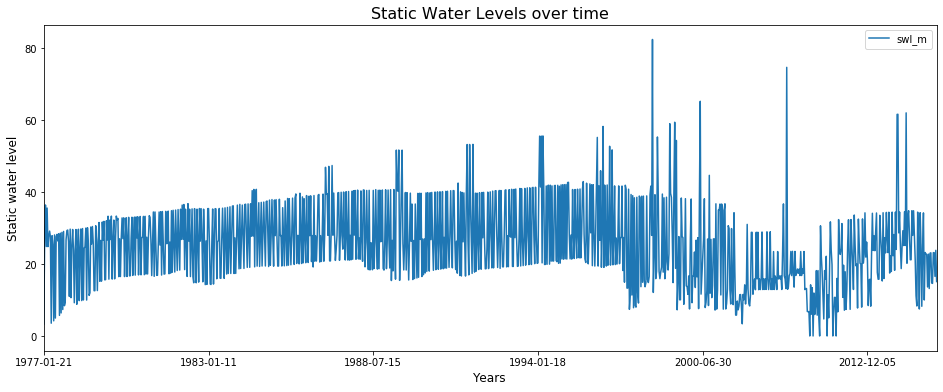

In [190]:
# plot static water levels over time 
# sort_dates = merged_RIMS_water_levels.sort('swl_date')
merged_RIMS_water_levels = merged_RIMS_water_levels.sort_values(by='swl_date',ascending=True)

merged_RIMS_water_levels.plot.line(x='swl_date', y='swl_m', figsize=(16,6))
plt.title('Static Water Levels over time',fontsize=16)
plt.xlabel('Years', fontsize =12)
plt.ylabel('Static water level',fontsize=12)


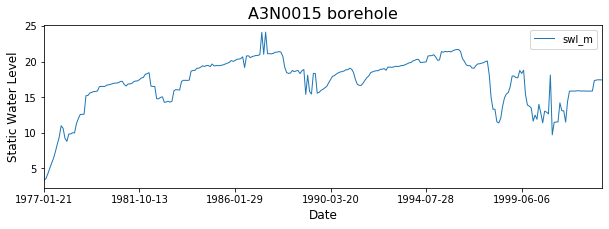

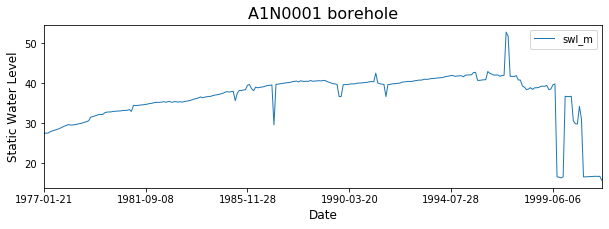

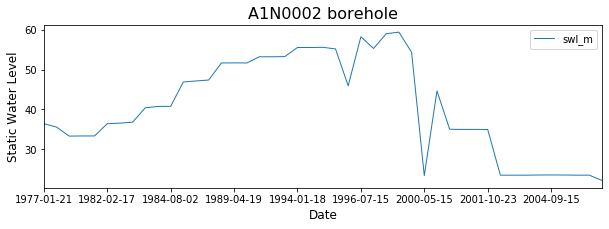

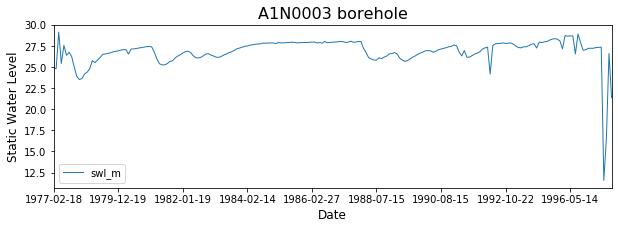

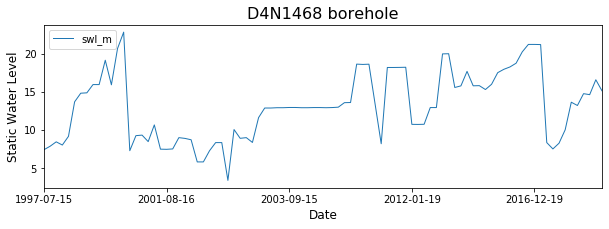

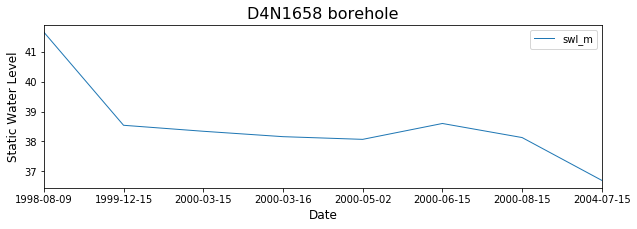

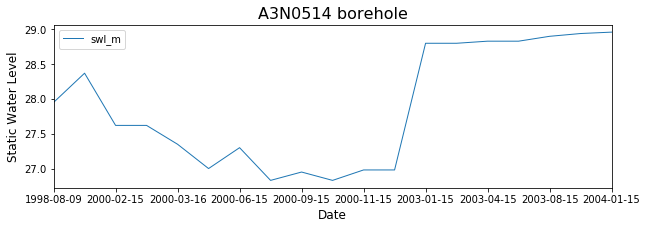

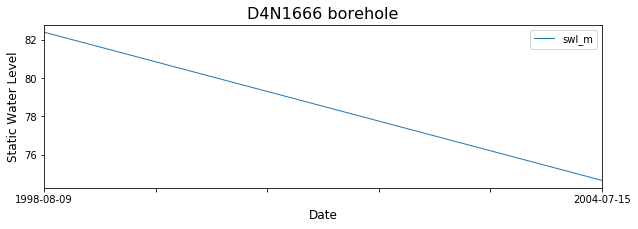

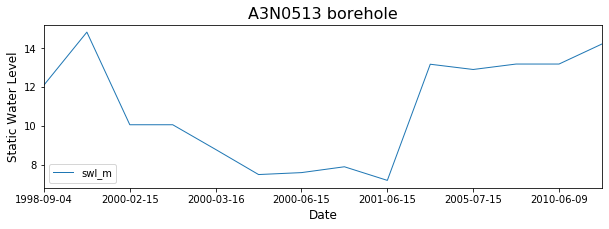

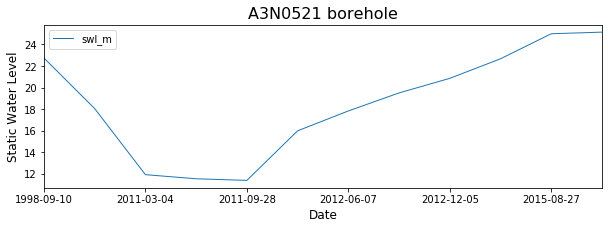

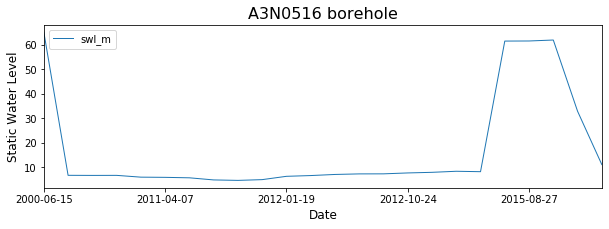

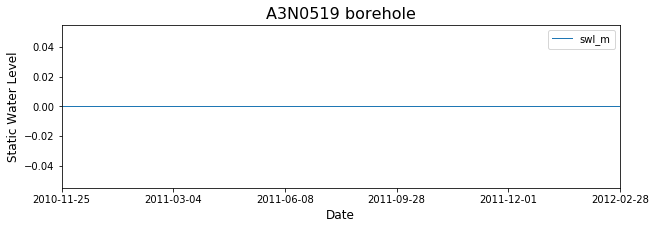

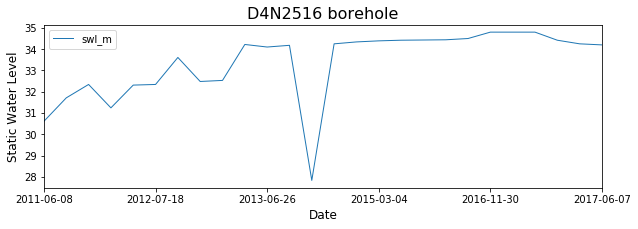

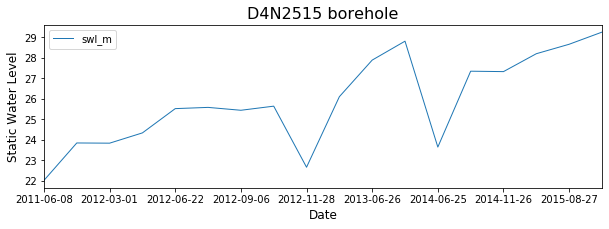

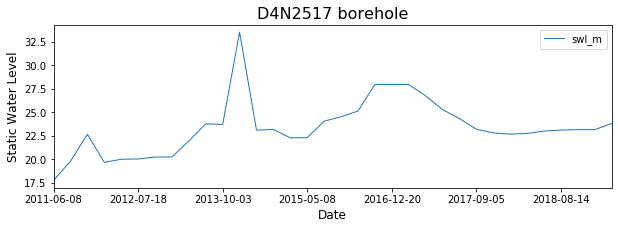

In [191]:
# plot swl graph for each borehole
# stack the plots vertically

for bhid in merged_RIMS_water_levels['bh_id'].unique():
    ID = bhid
    bhid = merged_RIMS_water_levels[merged_RIMS_water_levels['bh_id'] == bhid]
    bhid.plot.line(x='swl_date', y='swl_m', figsize=(10.0,3.0), lw = 1)
    #bhid_title = 'ID : {}'.format(bhid)
    plt.title(ID + " "+ 'borehole', fontsize=16)
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('Static Water Level', fontsize = 12)

# Check outliers in water levels and w_quality

* Noted: water quality and datatrans have been mapped to descriptive names and not INTs / FLOATS, making it difficult to plot

* Converted water quality, datatrans back to codes so we can plot outliers

In [192]:
# see how the dataframe head
merged_WLWQ_df.head(1)

bh_id    swl_date   time       country swl_m  \
0  A3N0513  1998-09-04  12:00  South Africa  12.1   

                                             quality  \
0  Audited Gauge Plate Readings / dip level readings   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality quality_desc  
0                  9999      9999         9999

# Map quality back to codes

In [193]:
merged_WLWQ_df['quality'] = merged_WLWQ_df['quality'].map({'Audited Gauge Plate Readings \
/ dip level readings':26, 'Dry borehole':93, 'Good continuous data':1})



In [194]:
merged_WLWQ_df.head(2)

bh_id    swl_date   time       country  swl_m  quality  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1     26.0   
1  A3N0513  1999-12-15  12:00  South Africa  14.82     26.0   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality quality_desc  
0                  9999      9999         9999  
1                  9999      9999         9999

In [195]:
# insert new col for descriptive water quality
merged_WLWQ_df['quality_desc'] = merged_WLWQ_df['quality']
merged_WLWQ_df.head()

bh_id    swl_date   time       country  swl_m  quality  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1     26.0   
1  A3N0513  1999-12-15  12:00  South Africa  14.82     26.0   
2  A3N0513  2000-02-15  12:00  South Africa  10.06     26.0   
3  A3N0513  2000-03-15  12:00  South Africa  10.06     26.0   
4  A3N0513  2000-03-16  12:00  South Africa   8.79     26.0   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   
2  Point data, no interpolaton - Monthly readings...   
3  Point data, no interpolaton - Monthly readings...   
4  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
2  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
3  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
4  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality  quality_desc  
0                  9999      9999          26.0  
1                  9999      9999          26.0  
2                  9999      9999          26.0  
3                  9999      9999          26.0  
4                  9999      9999          26.0

In [196]:
# add descriptive water qualities in quality_desc
merged_WLWQ_df['quality_desc'] = merged_WLWQ_df['quality_desc'].map({26:'Audited Gauge Plate Readings \
/ dip level readings', 93:'Dry borehole', 1:'Good continuous data'})
merged_WLWQ_df.head(2)

bh_id    swl_date   time       country  swl_m  quality  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1     26.0   
1  A3N0513  1999-12-15  12:00  South Africa  14.82     26.0   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality  \
0                  9999      9999   
1                  9999      9999   

                                        quality_desc  
0  Audited Gauge Plate Readings / dip level readings  
1  Audited Gauge Plate Readings / dip level readings

In [197]:
merged_WLWQ_df.to_csv("merged_WLWQ_df.csv", index=False)

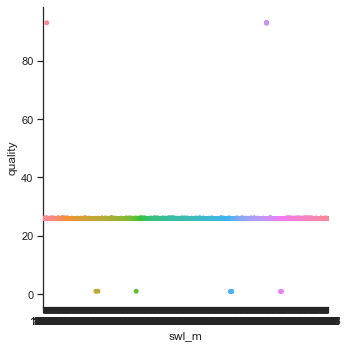

In [198]:
# categorical plots for static water levels against water quality
# %matplotlib inline

sns.set(style="ticks", color_codes=True)
sns.catplot(x='swl_m', y='quality', data=merged_WLWQ_df)

plt.show()

In [199]:
# Generate the mean, max and min for swl_m
# start with the first 3

filenames = sorted(glob.glob('/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/*_WaterLevels.csv'))
filenames = filenames[0:3]
for file in filenames:
    print(file)    

/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1N0001_WaterLevels.csv
/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1N0002_WaterLevels.csv
/Users/badisa/TWC_Datasets/NGA/NGA_and_WMS_databases/A1N0003_WaterLevels.csv


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  app.launch_new_instance()


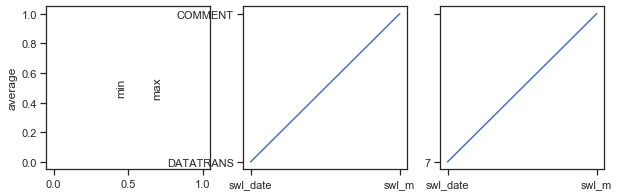

In [200]:
data = pd.read_csv(file, names = ['swl_date','swl_m'] )

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))
axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))
axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))

fig.tight_layout()
plt.show()



# TO_DO

overlaying 

plot borehole on map, 

heatmap over the area, plot each borehole with a diffrernt, 

animate each level

df = != Nan

concat join not merge join

# Map borehole locations

In [201]:
# see head of the dataframe
merged_WLWQ_df.head(2)

bh_id    swl_date   time       country  swl_m  quality  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1     26.0   
1  A3N0513  1999-12-15  12:00  South Africa  14.82     26.0   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name latitude longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.5645   25.8683  9999   

  mean_discharge_cumecs w_quality  \
0                  9999      9999   
1                  9999      9999   

                                        quality_desc  
0  Audited Gauge Plate Readings / dip level readings  
1  Audited Gauge Plate Readings / dip level readings

In [202]:
# check duplicate borehole locations

dups = [merged_WLWQ_df.duplicated(["bh_id", "longitude", "latitude"])]
dups

[0        False
 1         True
 2         True
 3         True
 4         True
          ...  
 68376     True
 68377     True
 68378     True
 68379     True
 68380     True
 Length: 69466, dtype: bool]

# Turning regular Pandas DataFrame into a geo-DataFrame

* this require us to specify as parameters the original DataFrame, 
* our coordinate reference system (CRS)
* and the geometry of our new Dataframe

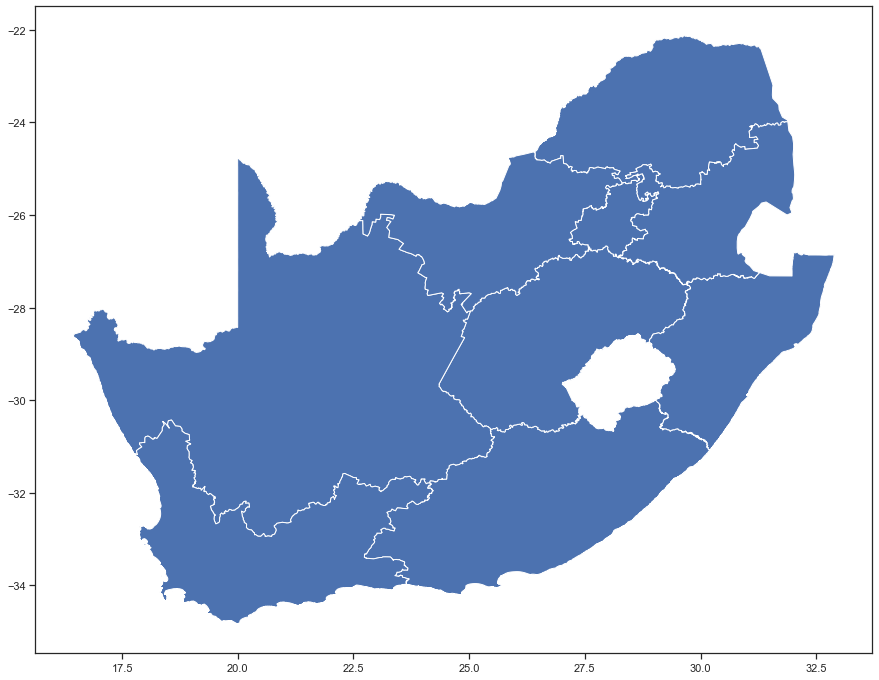

In [203]:
# load shape file
#country_map = gpd.read_file('/Users/badisa/TWC_Datasets/\
#Ramotswa_Shape_files/RAMOTSW_TBA_SOUTH_AFRICA_BOREHOLES.shp')
country_map = gpd.read_file('/Users/badisa/TWC_Datasets/\
Ramotswa_Shape_files/South_Africa_Polygon.shp')
fig, ax = plt.subplots(figsize = (15,15))
country_map.plot(ax = ax)

In [204]:
# Visualize borehole locations on map

bh_locations = pd.read_csv('merged_WLWQ_df.csv')
crs = {'init': 'epsg:4326'}
bh_locations.head(1)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,6,7,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


bh_id    swl_date   time       country  swl_m  quality  \
0  A3N0513  1998-09-04  12:00  South Africa   12.1     26.0   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name  latitude  longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  9999   

   mean_discharge_cumecs  w_quality  \
0                 9999.0       9999   

                                        quality_desc  
0  Audited Gauge Plate Readings / dip level readings

In [205]:
# create points, A Point is essentially a single object that describes 
# the longitude and latitude of a data-point

geometry = [Point(xy) for xy in zip(bh_locations["longitude"], bh_locations["latitude"])]
geometry[:3]

In [206]:
geo_df = gpd.GeoDataFrame(bh_locations,
                         crs = crs,
                         geometry = geometry)

geo_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


bh_id    swl_date   time       country  swl_m  quality  \
0  A3N0513  1998-09-04  12:00  South Africa  12.10     26.0   
1  A3N0513  1999-12-15  12:00  South Africa  14.82     26.0   
2  A3N0513  2000-02-15  12:00  South Africa  10.06     26.0   
3  A3N0513  2000-03-15  12:00  South Africa  10.06     26.0   
4  A3N0513  2000-03-16  12:00  South Africa   8.79     26.0   

                                           datatrans  \
0  Point data, no interpolaton - Monthly readings...   
1  Point data, no interpolaton - Monthly readings...   
2  Point data, no interpolaton - Monthly readings...   
3  Point data, no interpolaton - Monthly readings...   
4  Point data, no interpolaton - Monthly readings...   

                                 comment_water_level  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                        data_owner        contact_person  \
0  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
1  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
2  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
3  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   
4  Department of Water and Sanitation South Africa  Ramusiya, Fhedzisani   

                  email                file_name  latitude  longitude  date  \
0  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  9999   
1  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  9999   
2  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  9999   
3  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  9999   
4  RamusiyaF@dws.gov.za  A3N0513_WaterLevels.csv -25.56447   25.86831  9999   

   mean_discharge_cumecs  w_quality  \
0                 9999.0       9999   
1                 9999.0       9999   
2                 9999.0       9999   
3                 9999.0       9999   
4                 9999.0       9999   

                                        quality_desc  \
0  Audited Gauge Plate Readings / dip level readings   
1  Audited Gauge Plate Readings / dip level readings   
2  Audited Gauge Plate Readings / dip level readings   
3  Audited Gauge Plate Readings / dip level readings   
4  Audited Gauge Plate Readings / dip level readings   

                     geometry  
0  POINT (25.86831 -25.56447)  
1  POINT (25.86831 -25.56447)  
2  POINT (25.86831 -25.56447)  
3  POINT (25.86831 -25.56447)  
4  POINT (25.86831 -25.56447)

In [207]:
# ensure you have the actual geometry objects in the dataframe
# and not only string representation
# convert the column with strings (Well Known text) to actual geometries

from shapely import wkt
#df['geometry'] = df['geometry'].apply(wkt.loads)

geo_df['geometry'] = geo_df['geometry'].apply(wkt.loads)

TypeError: Only str is accepted.

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.


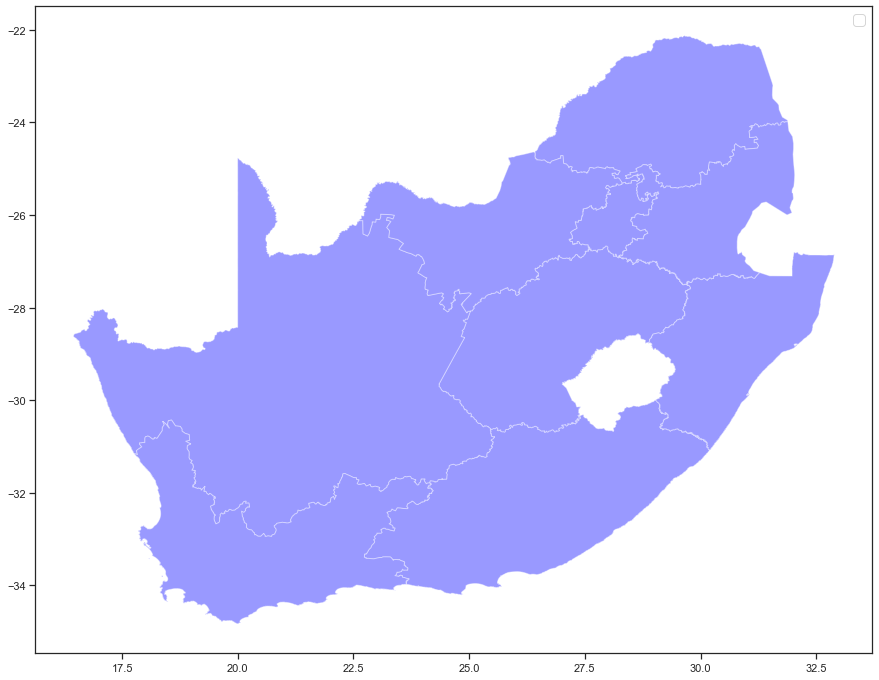

In [209]:
# lay the data on the map plotted above

fig, ax = plt.subplots(figsize = (15,15))
country_map.plot(ax = ax, alpha = 0.4, color="blue")
geo_df[geo_df['bh_id'] == 0].plot(ax = ax, markersize =20,\
                                  color = "blue", marker = "o", label = "Neg")
geo_df[geo_df['bh_id'] == 1].plot(ax = ax, markersize =20,\
                                  color = "red", marker = "b", label = "Pos")
plt.legend(prop={'size':15})


In [210]:
# cartopy and basemap tutorial
# plot the map with a single line
# geopandas library func that does that

